# Vertical Dependence from 100 pc to 5 kpc

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from astropy.visualization import astropy_mpl_style

plt.style.use(astropy_mpl_style)
#!pip install astroquery
from astroquery.gaia import Gaia

tables=Gaia.load_tables(only_names=True)
for table in tables:
  print(table.name)

from astroquery.gaia import Gaia



INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]
external.apassdr9
external.catwise2020
external.gaiadr2_astrophysical_parameters
external.gaiadr2_geometric_distance
external.gaiaedr3_distance
external.gaiaedr3_gcns_main_1
external.gaiaedr3_gcns_rejected_1
external.gaiaedr3_spurious
external.gaia_eso_survey
external.galex_ais
external.ravedr5_com
external.ravedr5_dr5
external.ravedr5_gra
external.ravedr5_on
external.ravedr6
external.sdssdr13_photoprimary
external.skymapperdr1_master
external.skymapperdr2_master
external.tmass_xsc
external.xgboost_table1
external.xgboost_table2
gaiadr1.aux_qso_icrf2_match
gaiadr1.ext_phot_zero_point
gaiadr1.allwise_best_neighbour
gaiadr1.allwise_neighbourhood
gaiadr1.gsc23_best_neighbour
gaiadr1.gsc23_neighbourhood
gaiadr1.ppmxl_best_neighbour
gaiadr1.ppmxl_neighbourhood
gaiadr1.sdss_dr9_best_neighbour
gaiadr1.sdss_dr9_neighbourhood
gaiadr1.tmass_best_neigh

# selective query for K giants 

In [1]:


import numpy as np 
from astroquery.gaia import Gaia

# Define the ADQL query
query = """
SELECT 
TOP 150000
    fgkm.*, 
    gaia.ra,gaia.ra_error,gaia.dec_error, 
    gaia.dec, 
    gaia.parallax, 
    gaia.pmra, 
    gaia.pmdec, 
    gaia.pmra_error, 
    gaia.pmdec_error, 
    gaia.parallax_error,
    gaia.b,
    gaia.l,
    gaia.pmra_pmdec_corr, 
    gaia.parallax_pmra_corr, 
    gaia.parallax_pmdec_corr,
    gaia.radial_velocity, 
    gaia.radial_velocity_error, 
    gaia.rv_template_teff, 
    gaia.grvs_mag,
    gaia.phot_g_mean_mag, 
    gaia.bp_rp, 
    gaia.bp_g, 
    gaia.g_rp, 
    ap.abp_gspphot,ap.spectraltype_esphs, 
    ap.arp_gspphot
FROM gaiadr3.gaia_source AS gaia
JOIN gaiadr3.gold_sample_fgkm_stars AS fgkm USING (source_id)
JOIN gaiadr3.astrophysical_parameters AS ap USING (source_id)
WHERE ap.spectraltype_esphs='K'
AND ABS(gaia.b)>50





"""


# Execute the query
job = Gaia.launch_job(query)
results1 = job.get_results()
a=np.sum(np.isnan(np.array(results1['radial_velocity'])))
b=len(results1['radial_velocity'])-a
results1

"Important:  Gaia archive will be intermittently unavailable due to scheduled maintenance on 10-12-2024 from 08:00 to 10:00 (CET)"


<Table length=32769>
     SOURCE_ID      teff_gspphot ... spectraltype_esphs_2 arp_gspphot
                         K       ...                          mag    
       int64          float32    ...        object          float32  
------------------- ------------ ... -------------------- -----------
4918027760566588160    5248.2046 ...                    K      0.0324
1536289808707026944     5195.926 ...                    K      0.0363
4735964371767419392     5187.672 ...                    K      0.0335
4851573174704587648    5227.3633 ...                    K      0.0036
3581990119136531840    5175.1704 ...                    K      0.0116
2413850067930225024     5044.561 ...                    K      0.0018
1320790374387697664    4582.6216 ...                    K      0.0393
1321615901460780416    4488.2124 ...                    K      0.1762
6587790580008750592     4449.702 ...                    K      0.0865
                ...          ... ...                  ...         ...
2529415337079523968      5170.13 ...                    K       0.091
2512774434751312512    5051.6475 ...                    K       0.059
2513053745064484480     4536.654 ...                    K      0.0275
2529978183954360064    4486.8423 ...                    K      0.0276
2518910014576654976    4391.0713 ...                    K      0.1523
2513325217062121984     5079.657 ...                    K      0.0364
2524691938206393856    4597.5615 ...                    K      0.2623
2530473342143608704    4498.6416 ...                    K      0.2738
2525313815110521088    4600.5713 ...                    K      0.0415

In [346]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, Galactocentric
ra_array = np.array(results1['ra']) * u.degree
dec_array = np.array(results1['dec']) * u.degree
distance_array = (np.array(results1['parallax']) * u.mas).to(u.kpc, u.parallax())
pm_ra_cosdec_array = np.array(results1['pmra']) * u.mas / u.yr
pm_dec_array = np.array(results1['pmdec']) * u.mas / u.yr
radial_velocity_array = np.array(results1['radial_velocity']) * u.km / u.s
radial_velocity_error = np.array(results1['radial_velocity_error']) * u.km / u.s
pm_ra_error = np.array(results1['pmra_error']) * u.mas / u.yr
pm_dec_error = np.array(results1['pmdec_error']) * u.mas / u.yr

# Function to transform coordinates
def transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity):
    c = SkyCoord(ra=ra, dec=dec, distance=distance, pm_ra_cosdec=pm_ra_cosdec,
                 pm_dec=pm_dec, radial_velocity=radial_velocity)
    g = c.transform_to(Galactocentric(galcen_distance=8.2 * u.kpc,  # Default distance to Galactic Center
                                      z_sun=0.020 * u.kpc,  # Default Sun's height above the Galactic plane
                                      galcen_v_sun=[10.1, 1, 7.25] * (u.km / u.s)))
    return np.array([g.v_x.value, g.v_y.value, g.v_z.value ,np.abs(g.z.value)])

max(transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[2])



161.58370145195278

In [624]:
a=[1.5
,1.6
,1.7
,1.8
,1.9
,2
,2.1
,2.2
,2.3
,2.4
,2.5
,2.6
,2.7
,2.8
,2.9
,3
,3.1
,3.2
,3.3
,3.4
,3.5
,3.6
,3.7
,3.8
,3.9
,4
,4.1
,4.2
,4.3
,4.4
,4.5]
b=[-31
,-20
,-28
,-24
,-16
,-10
,-22
,-16
,-1
,-12
,-18
,-25
,-23
,-29
,-17
,-7
,-6
,2
,8
,12
,18
,29
,7
,15
,5
,7
,17
,22
,12
,17
,19
]
c=[-46
,-55
,-61
,-69
,-77
,-85
,-78
,-76
,-81
,-85
,-85
,-90
,-98
,-95
,-115
,-126
,-129
,-131
,-140
,-140
,-135
,-137
,-132
,-134
,-139
,-143
,-145
,-142
,-148
,-152
,-158
]
d=[17
,5
,3
,8
,3
,4
,3
,-13
,-9
,-12
,-2
,1
,7
,-2
,5
,8
,1
,-1
,0
,1
,5
,9
,0
,1
,-6
,-1
,1
,2
,-2
,0
,-2
]
e=[81
,77
,79
,79
,78
,83
,80
,77
,81
,80
,78
,71
,72
,76
,83
,90
,101
,99
,101
,98
,95
,101
,91
,92
,94
,93
,92
,95
,94
,96
,93
]

f=[57
,59
,64
,61
,60
,55
,58
,63
,58
,59
,63
,66
,62
,62
,68
,67
,67
,63
,66
,63
,63
,64
,61
,68
,66
,66
,68
,72
,69
,72
,76
]

g=[38
,37
,38
,40
,40
,39
,38
,42
,40
,40
,42
,42
,39
,41
,40
,42
,43
,42
,44
,43
,44
,44
,44
,43
,43
,41
,44
,45
,48
,46
,46
]
b1=[4
,4
,4
,4
,4
,5
,5
,5
,6
,5
,6
,6
,6
,6
,6
,6
,7
,6
,7
,7
,7
,7
,7
,7
,8
,8
,8
,8
,9
,9
,10
]

[57,
 59,
 64,
 61,
 60,
 55,
 58,
 63,
 58,
 59,
 63,
 66,
 62,
 62,
 68,
 67,
 67,
 63,
 66,
 63,
 63,
 64,
 61,
 68,
 66,
 66,
 68,
 72,
 69,
 72,
 76]

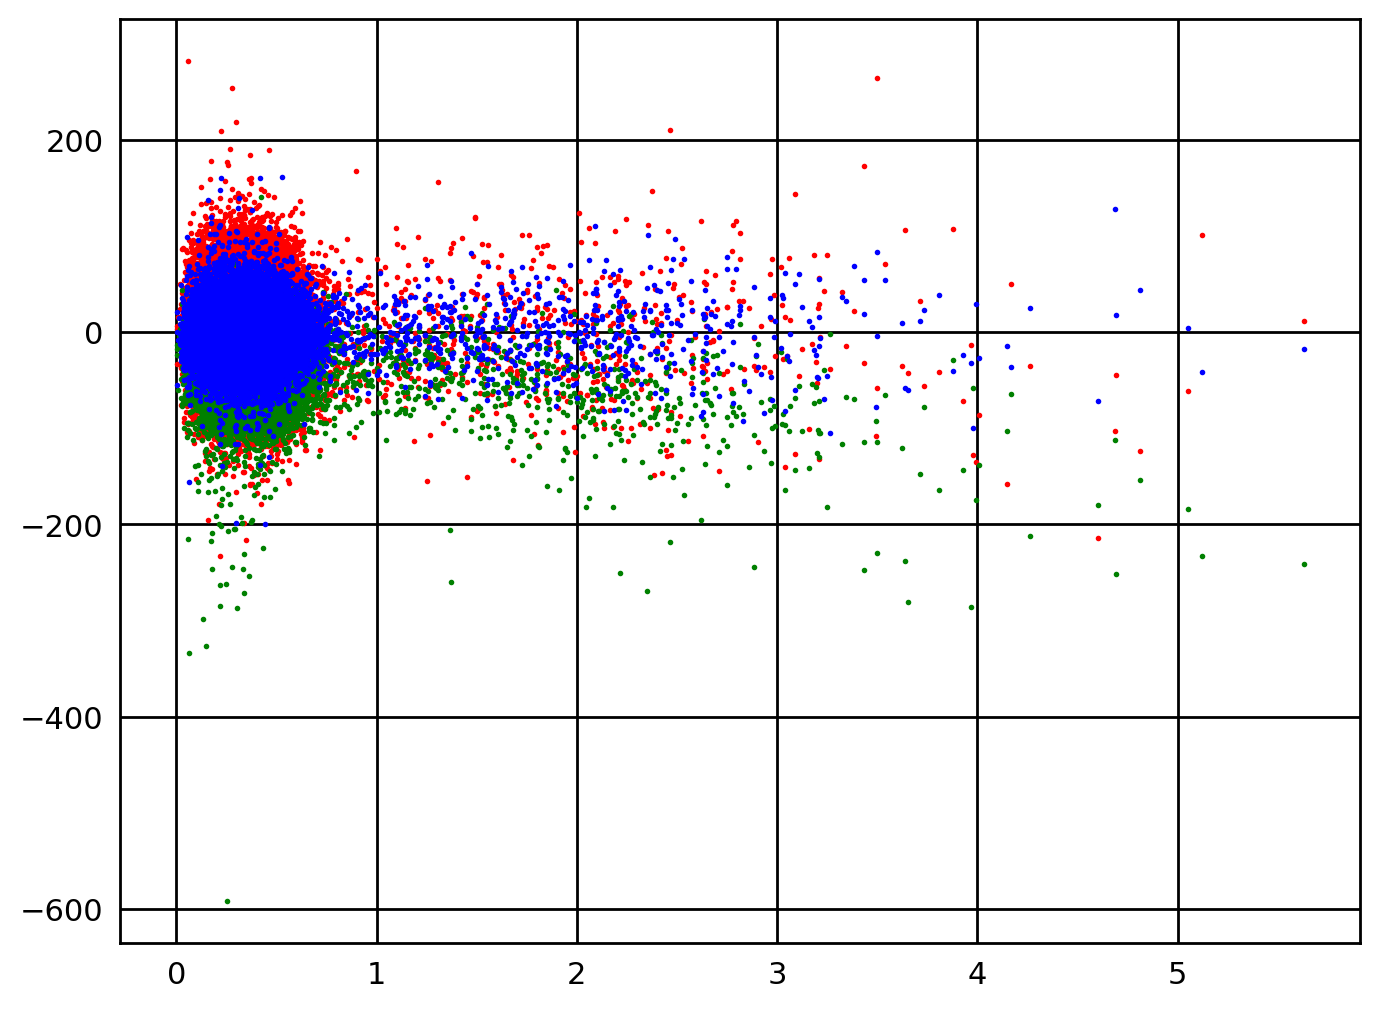

<Figure size 2000x1200 with 0 Axes>

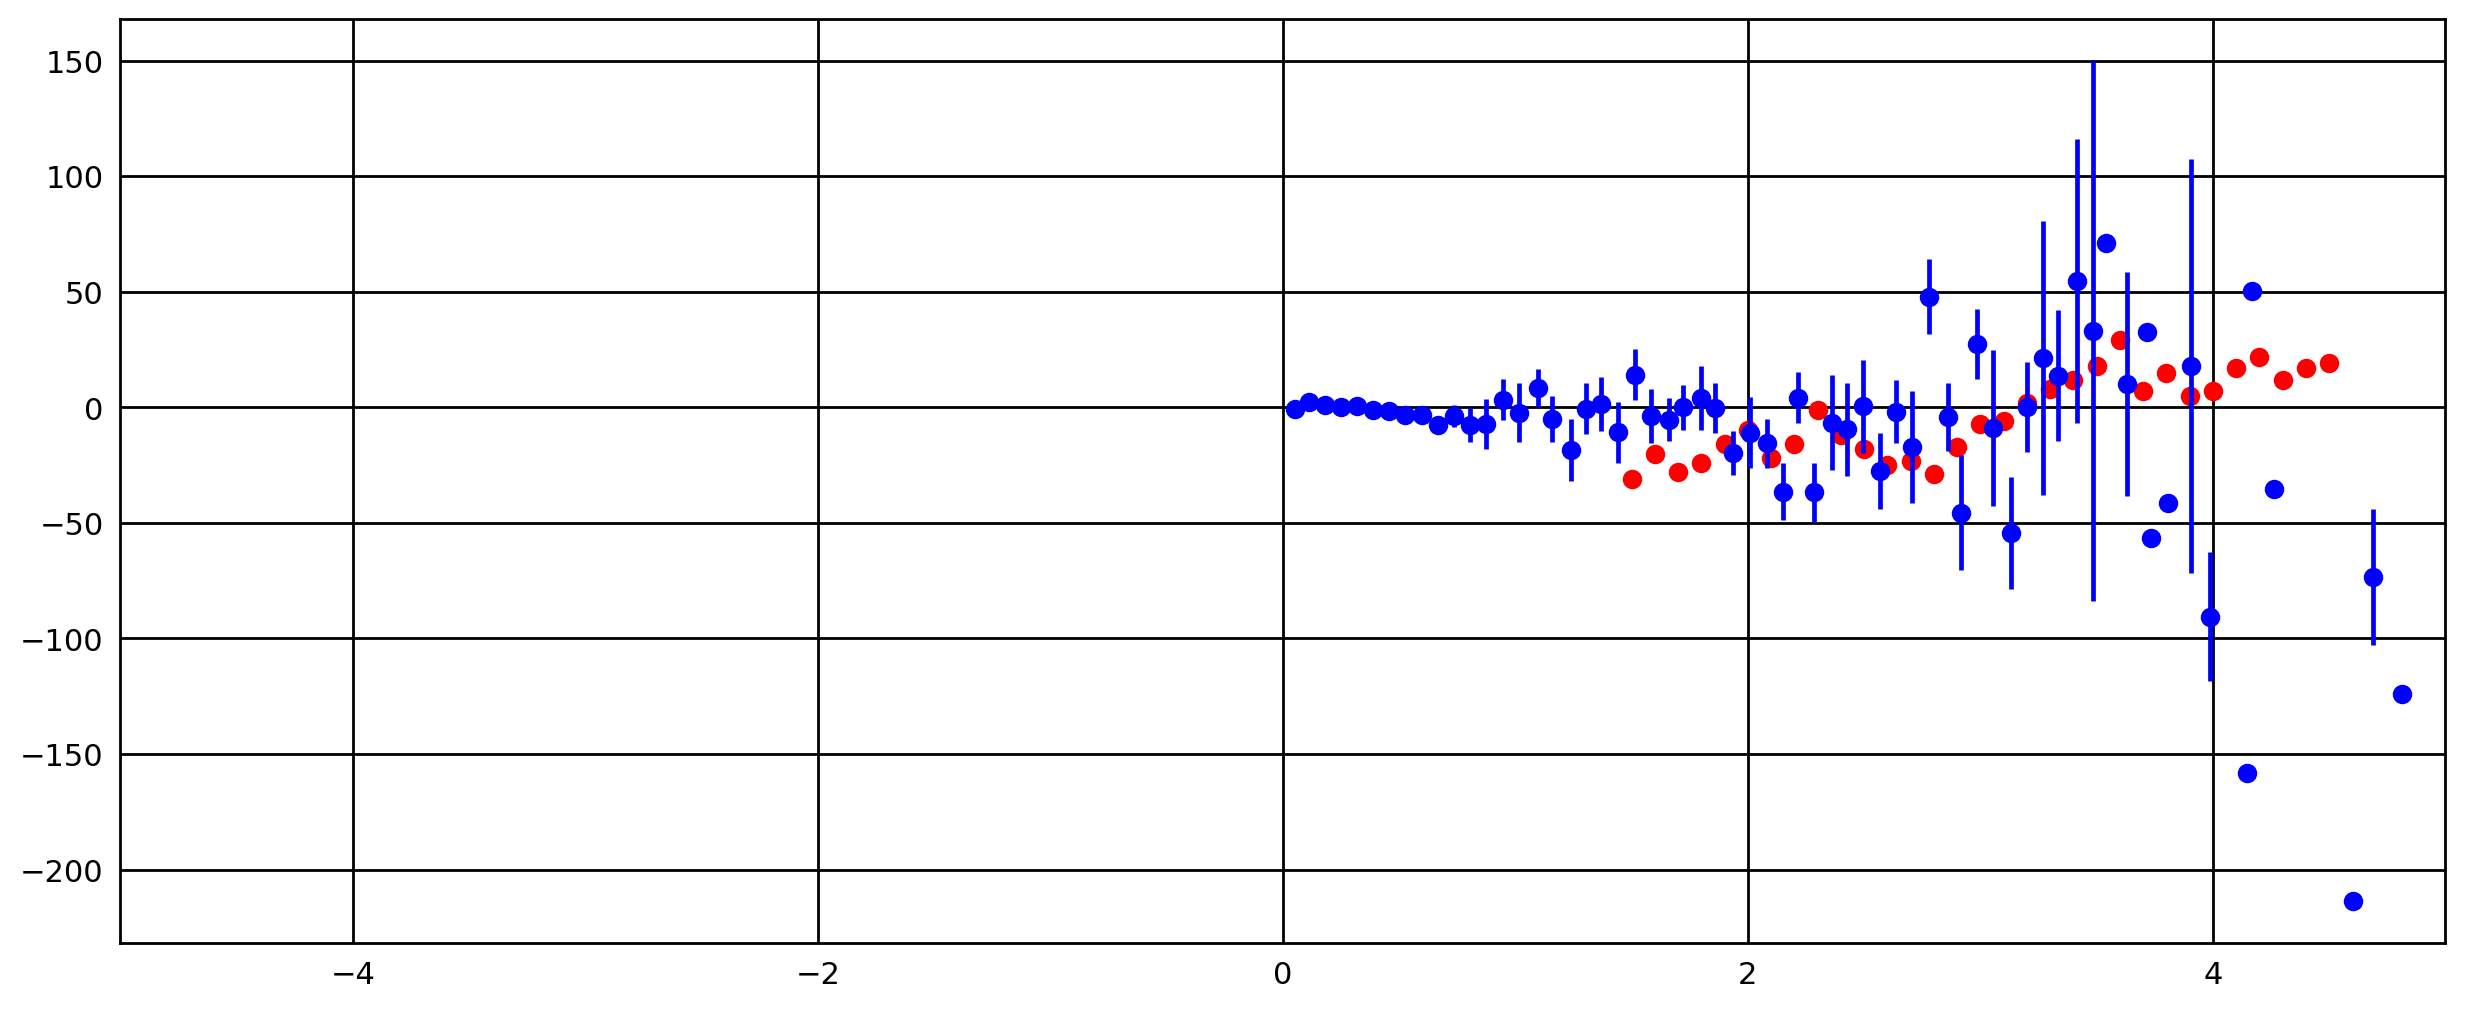

<Figure size 2000x1200 with 0 Axes>

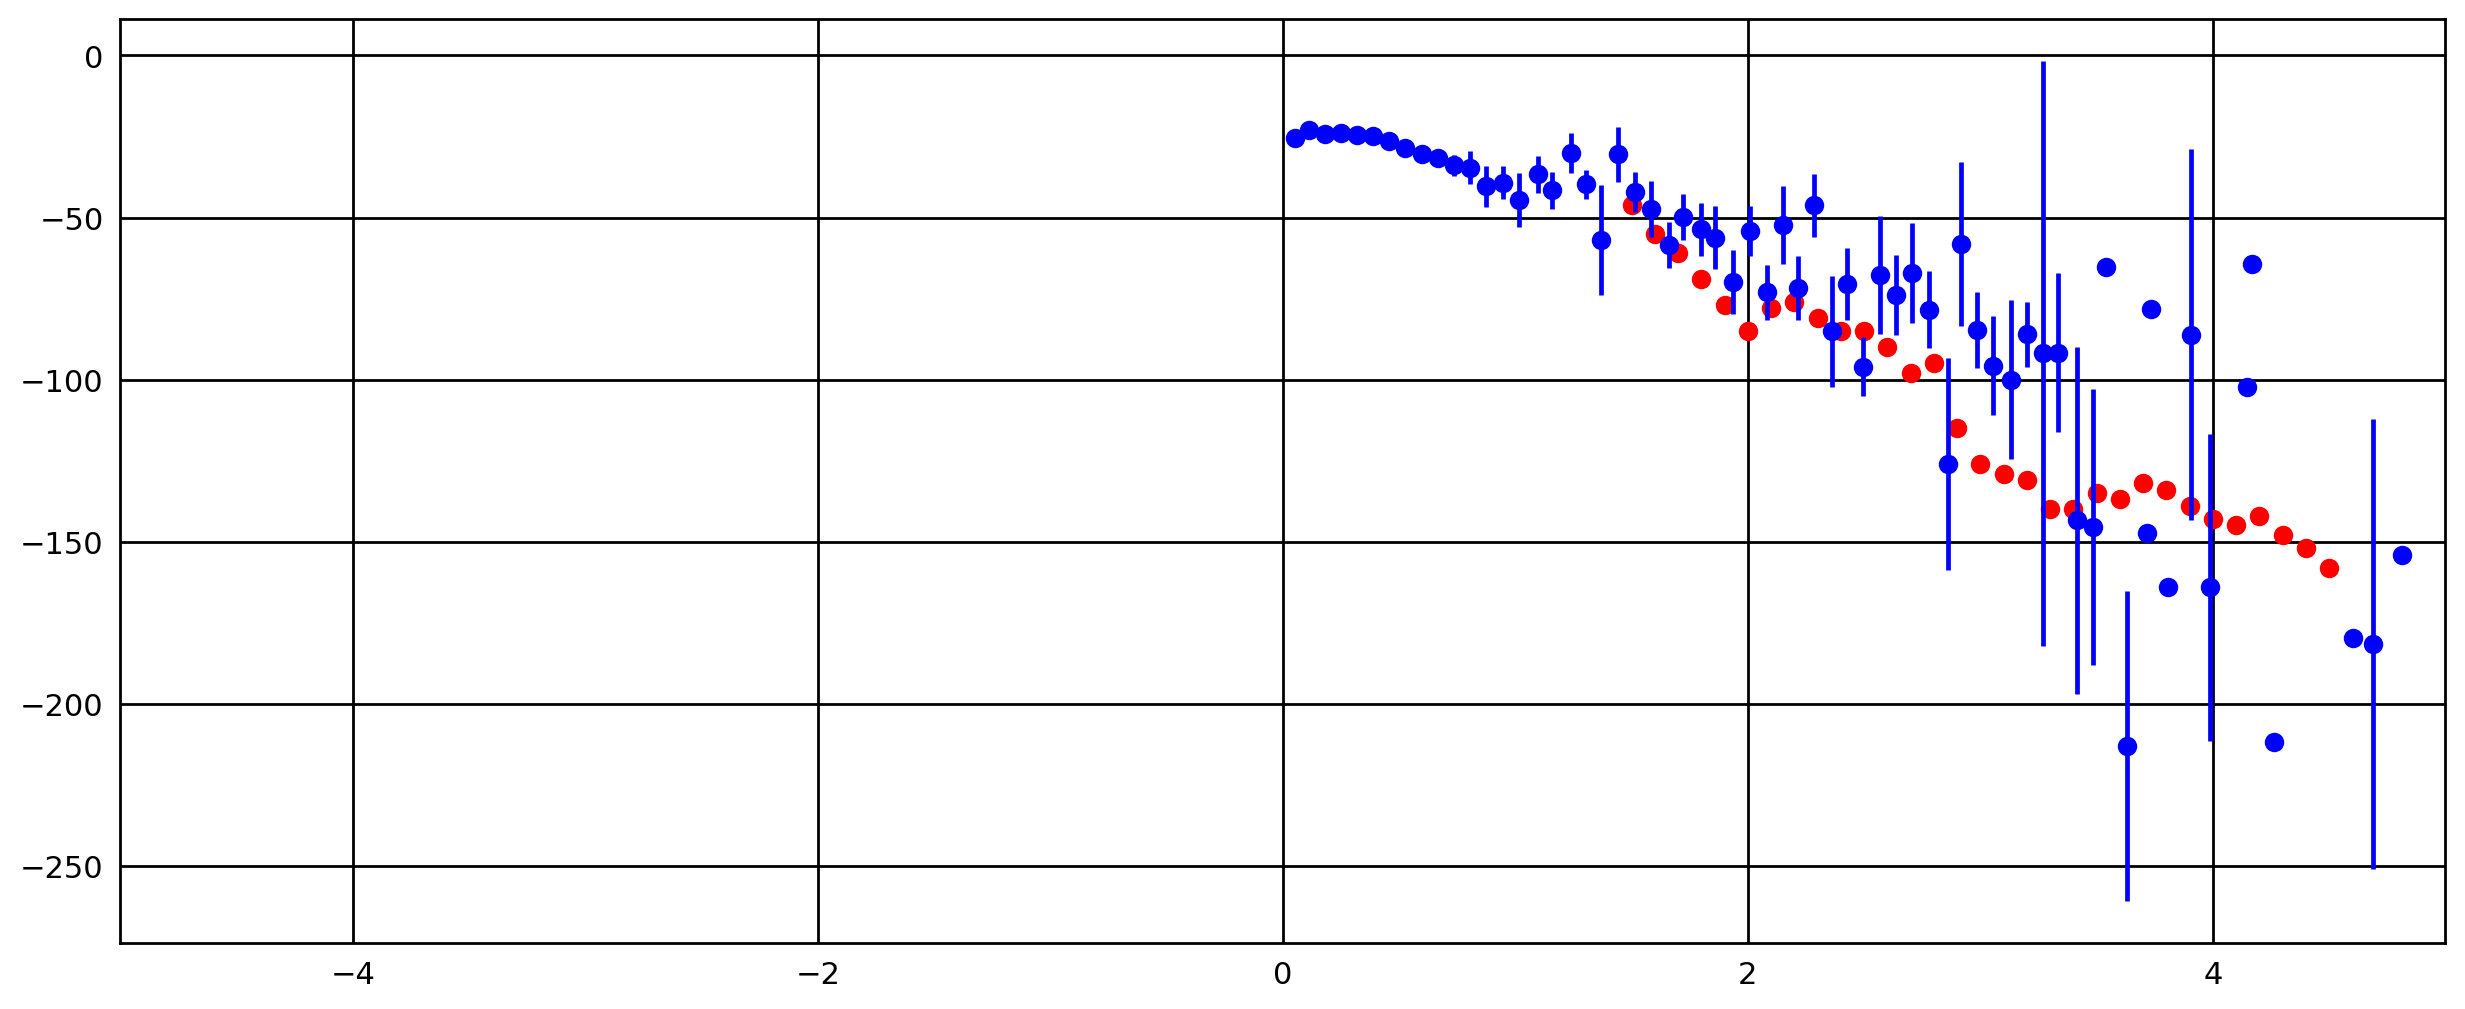

<Figure size 2000x1200 with 0 Axes>

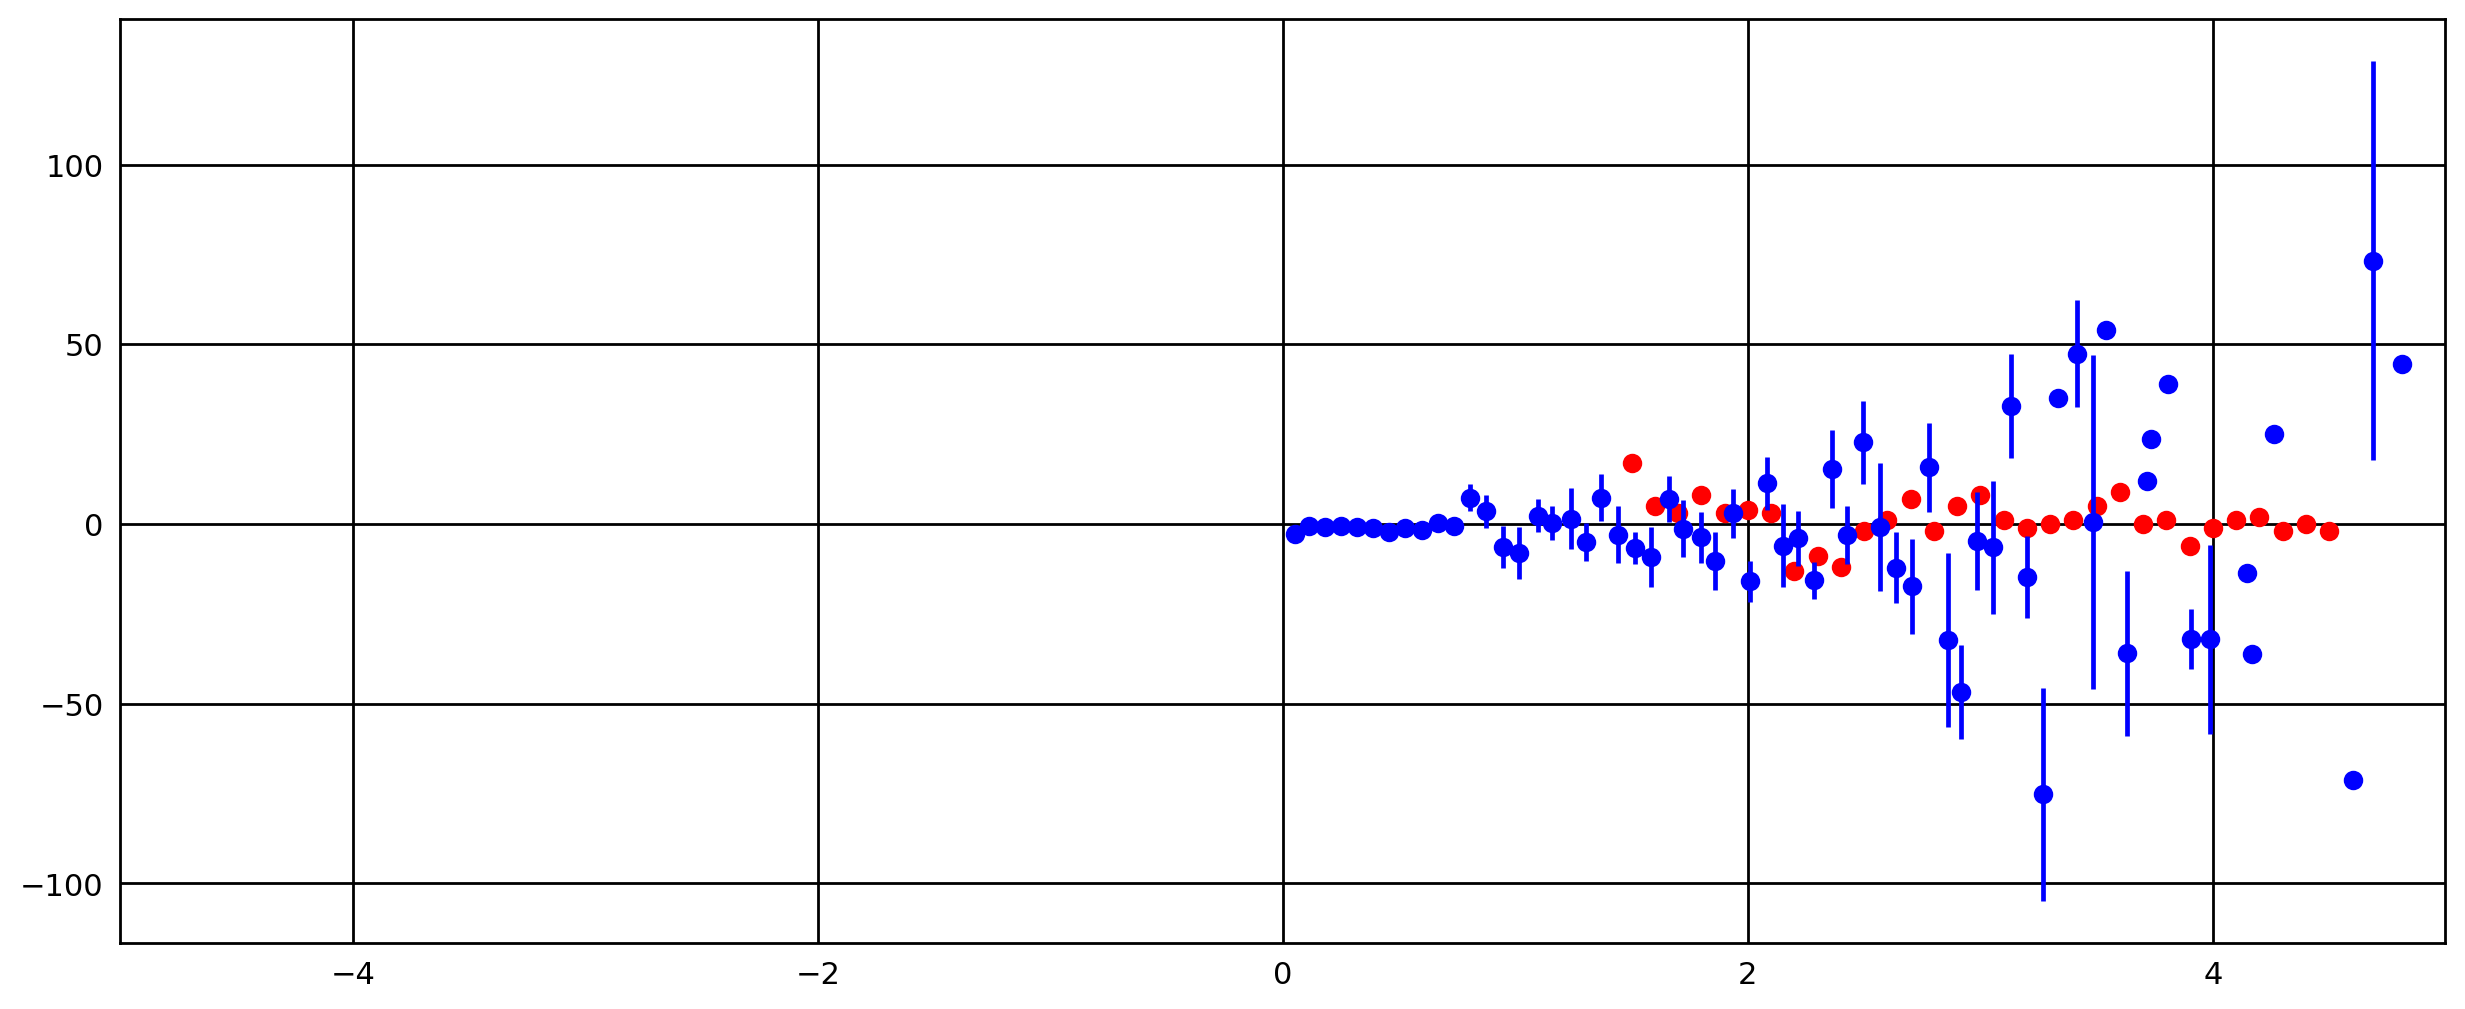

In [347]:
import matplotlib.pyplot as plt
import pandas as pd
plt.grid(True)
plt.scatter(transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3],transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[0],s=1,color='r')
plt.scatter(transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3],transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[1],s=1,color='g')
plt.scatter(transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3],transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[2],s=1,color='b')

def binned_scatter_plot(x_list, y_list, n_bins, smooth=True, colors=None, labels=None):
    """
    Create binned scatter plots from multiple unbinned x and y data sets.
    
    Parameters:
    x_list (list of array-like): List of arrays of x data points.
    y_list (list of array-like): List of arrays of y data points.
    n_bins (int): Number of bins to use for binning the data.
    smooth (bool): Whether to plot a smooth line through the binned data points.
    colors (list of str): List of colors for the points and lines in the plot.
    labels (list of str): List of labels for each dataset in the plot legend.
    """
    if colors is None:
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    
    if labels is None:
        labels = [f'Dataset {i+1}' for i in range(len(x_list))]
    
    plt.figure(figsize=(10, 6))
    
    for i, (x, y) in enumerate(zip(x_list, y_list)):
        color = colors[i % len(colors)]
        label = labels[i]
        
        # Create a DataFrame from the x and y data
        data = pd.DataFrame({'x': x, 'y': y})
        
        # Bin the data
        data['bin'] = pd.cut(data['x'], bins=n_bins, labels=False)
        
        # Calculate mean and standard error for each bin
        binned_data = data.groupby('bin').agg({
            'x': 'mean',
            'y': ['mean', 'sem']
        }).reset_index()
        
        # Flatten the MultiIndex columns
        binned_data.columns = ['bin', 'x_mean', 'y_mean', 'y_sem']
        
        # Plot the binned scatter plot with error bars
        
        plt.figure(figsize=(15, 6))
        #plt.scatter(x_list,y_list, color='blue', alpha=0.7,s=1, label='Data Points')
        plt.xlim(-5,5)
        #plt.ylim(-0.55,1)
        
        plt.errorbar(binned_data['x_mean'], binned_data['y_mean'], yerr=binned_data['y_sem'], fmt='o', color=color, label=f'{label} - Binned Data with Error Bars')

        plt.grid(True)
        if smooth:
            # Sort the binned data to ensure the smooth line is plotted correctly
            binned_data = binned_data.sort_values(by='x_mean')
            
            
            
            # Plot smooth regression line
           # plt.plot(x_smooth, y_smooth, color=color, linestyle='-', linewidth=2, alpha=0.8, label=f'{label} - Smooth Regression Line')

n_bins=80
binned_scatter_plot([transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3]],[transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[0]],n_bins)


plt.scatter(a,b,color='r')
binned_scatter_plot([transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3]],[transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[1]],n_bins)

plt.scatter(a,c,color='r')
binned_scatter_plot([transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3]],[transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[2]],n_bins)

plt.scatter(a,d,color='r')

(0.0, 5.0)

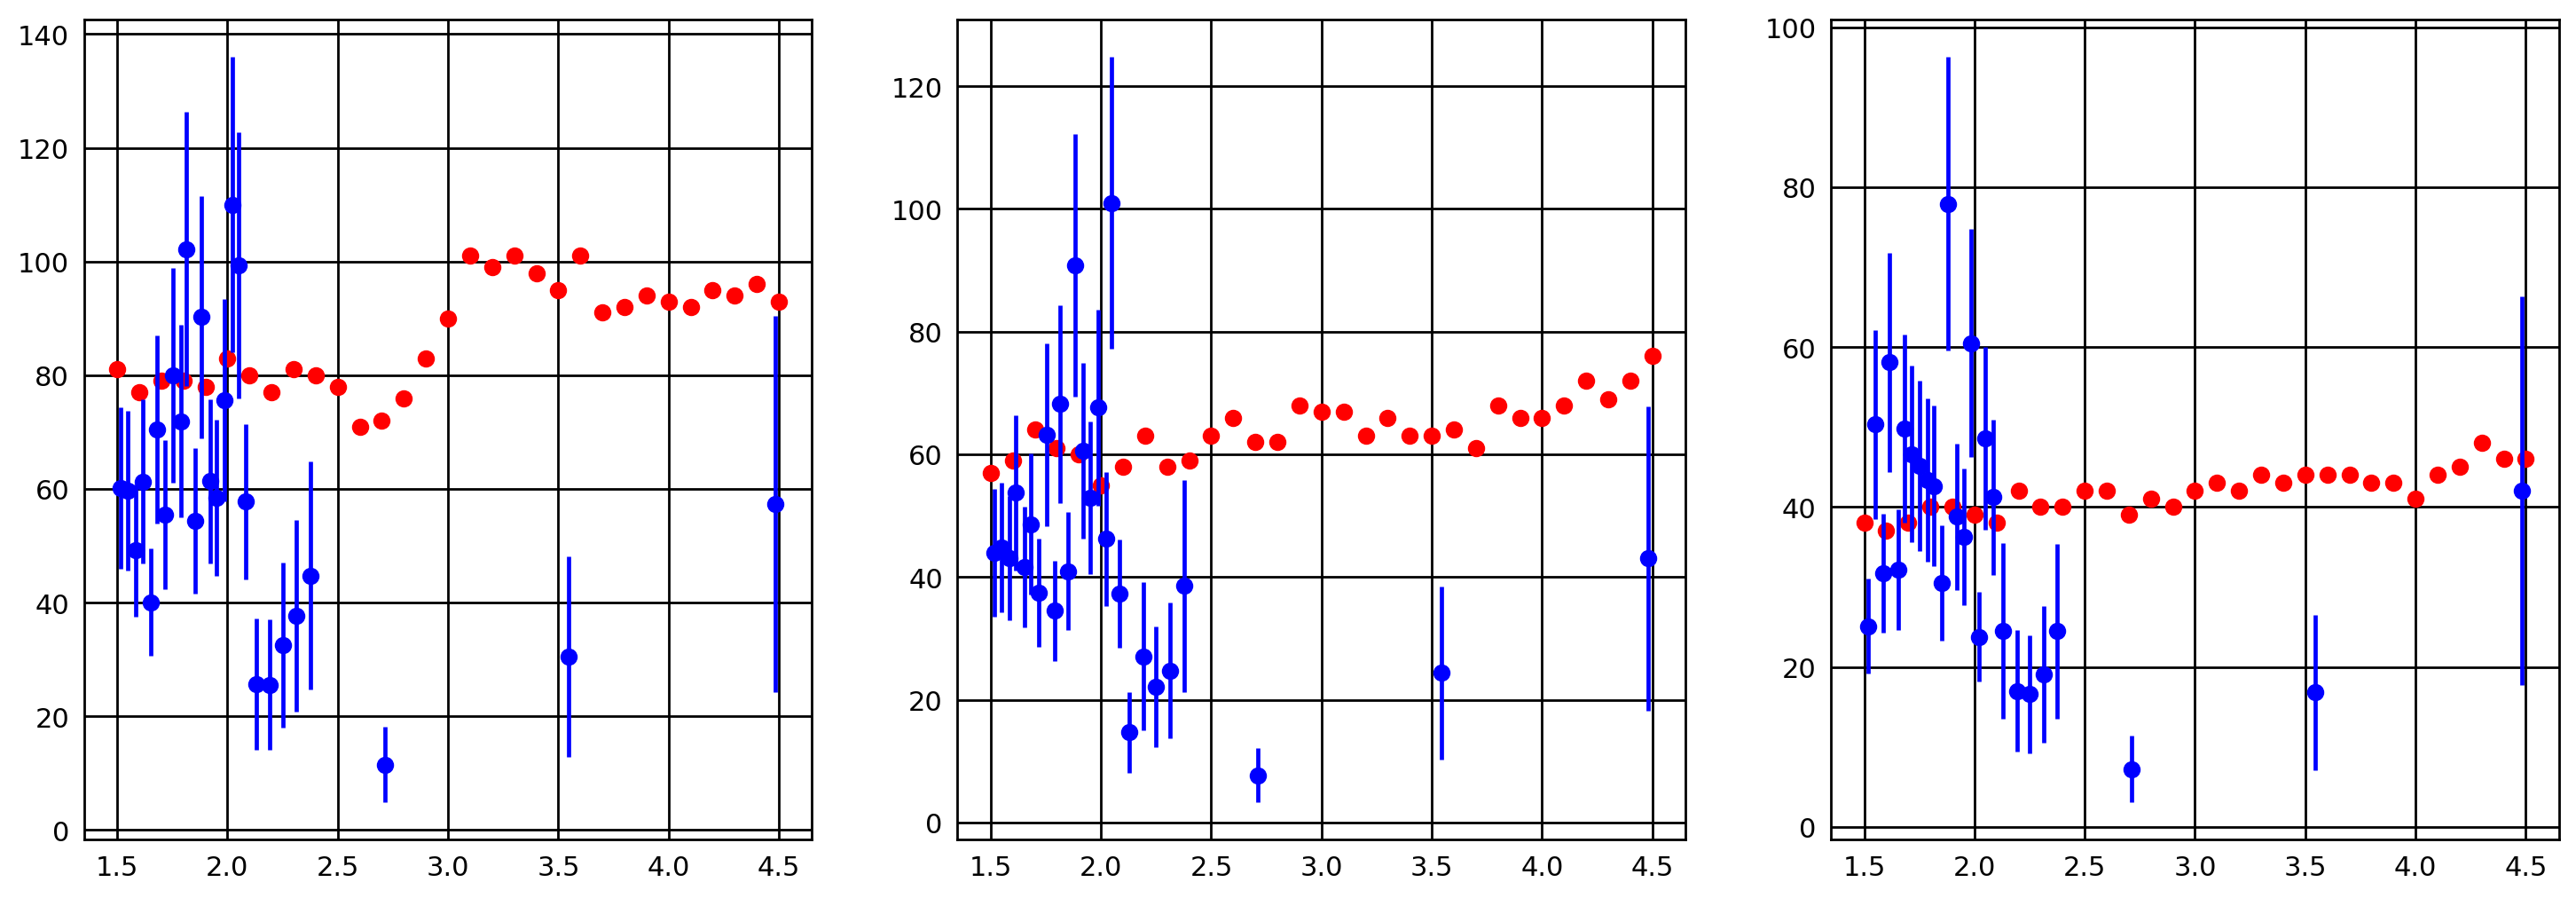

<Figure size 2000x1200 with 0 Axes>

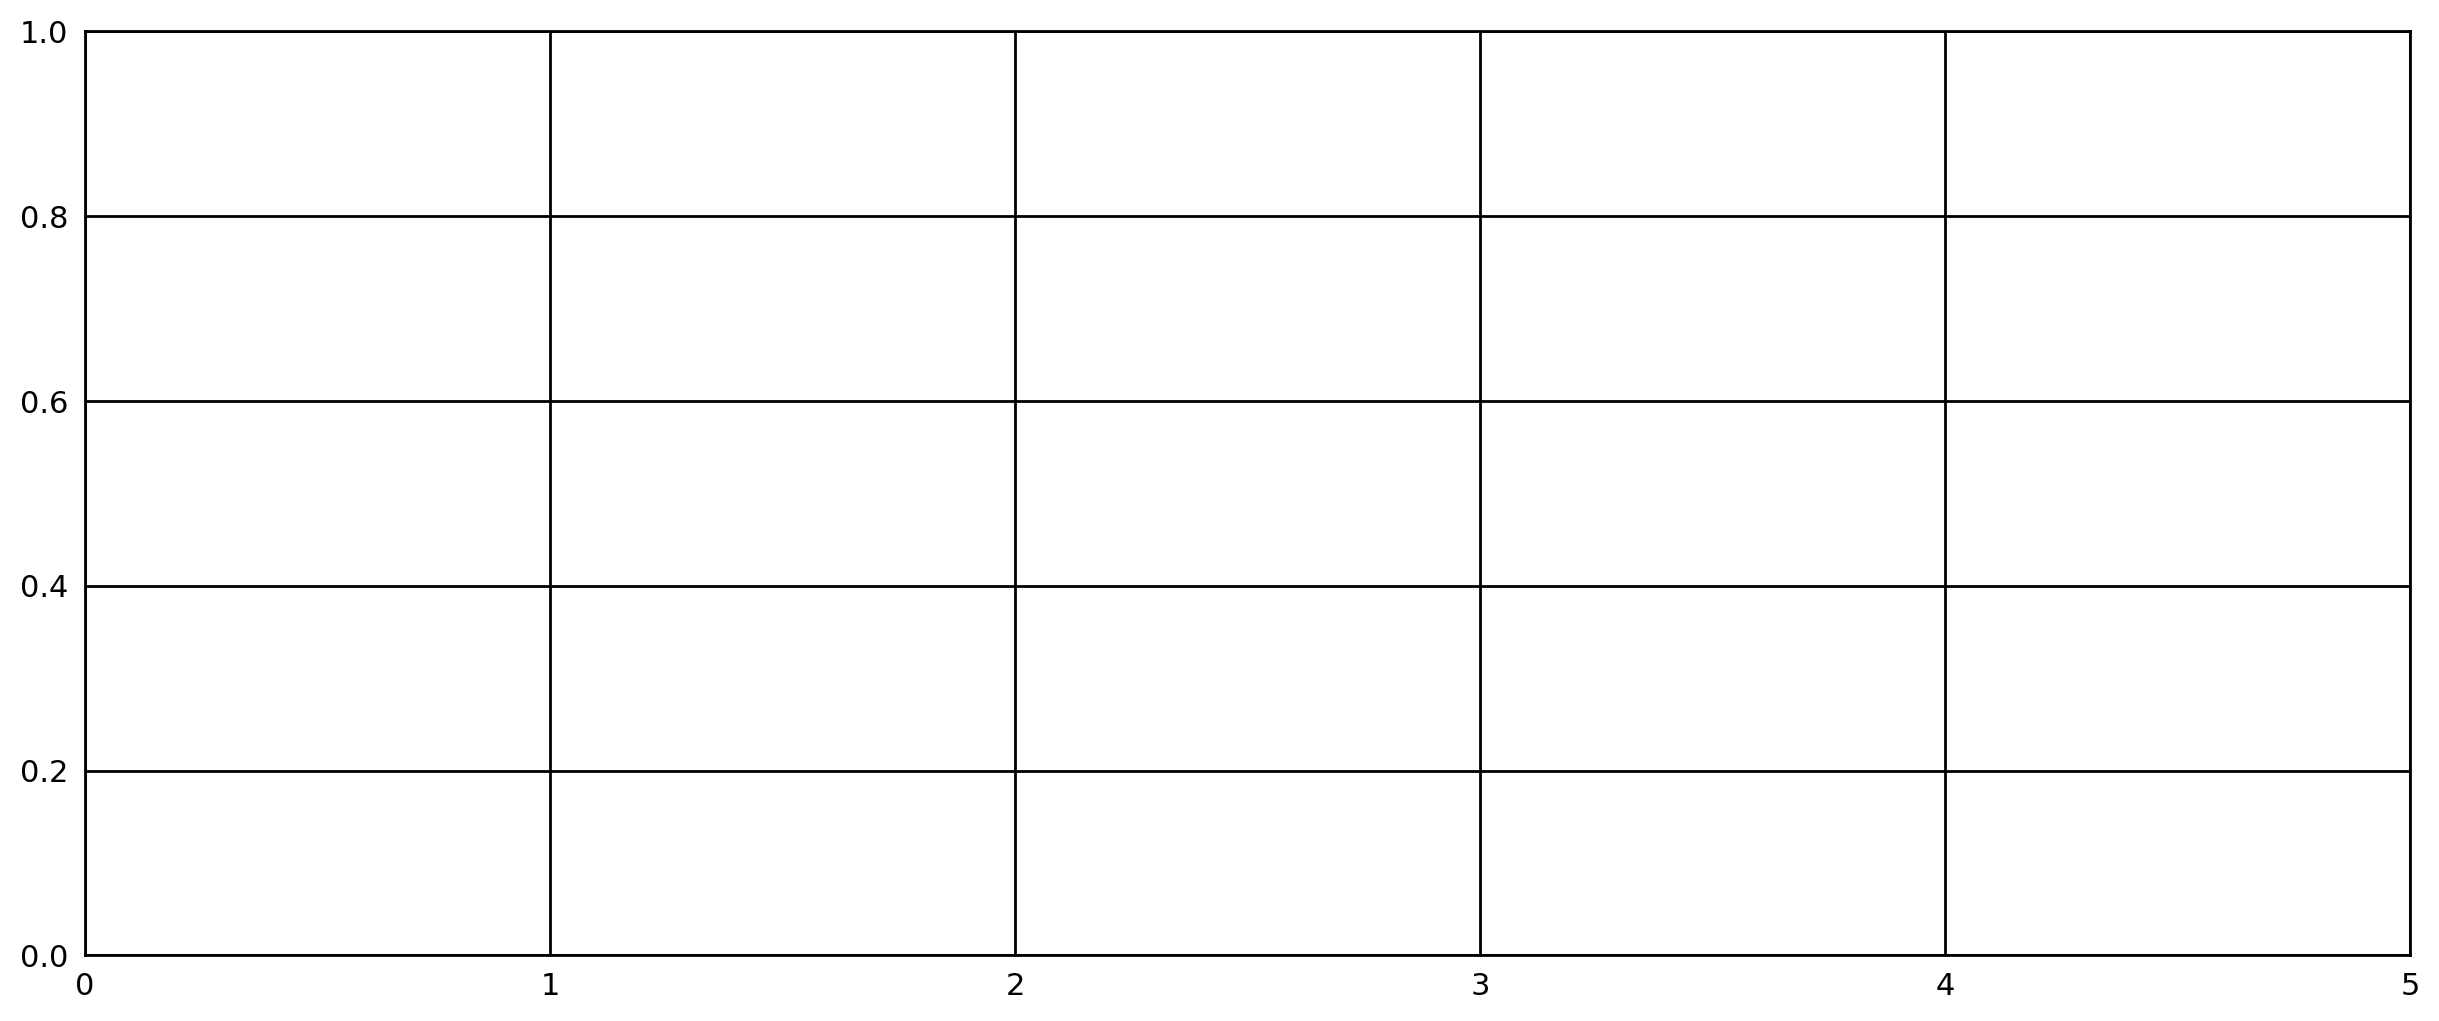

<Figure size 2000x1200 with 0 Axes>

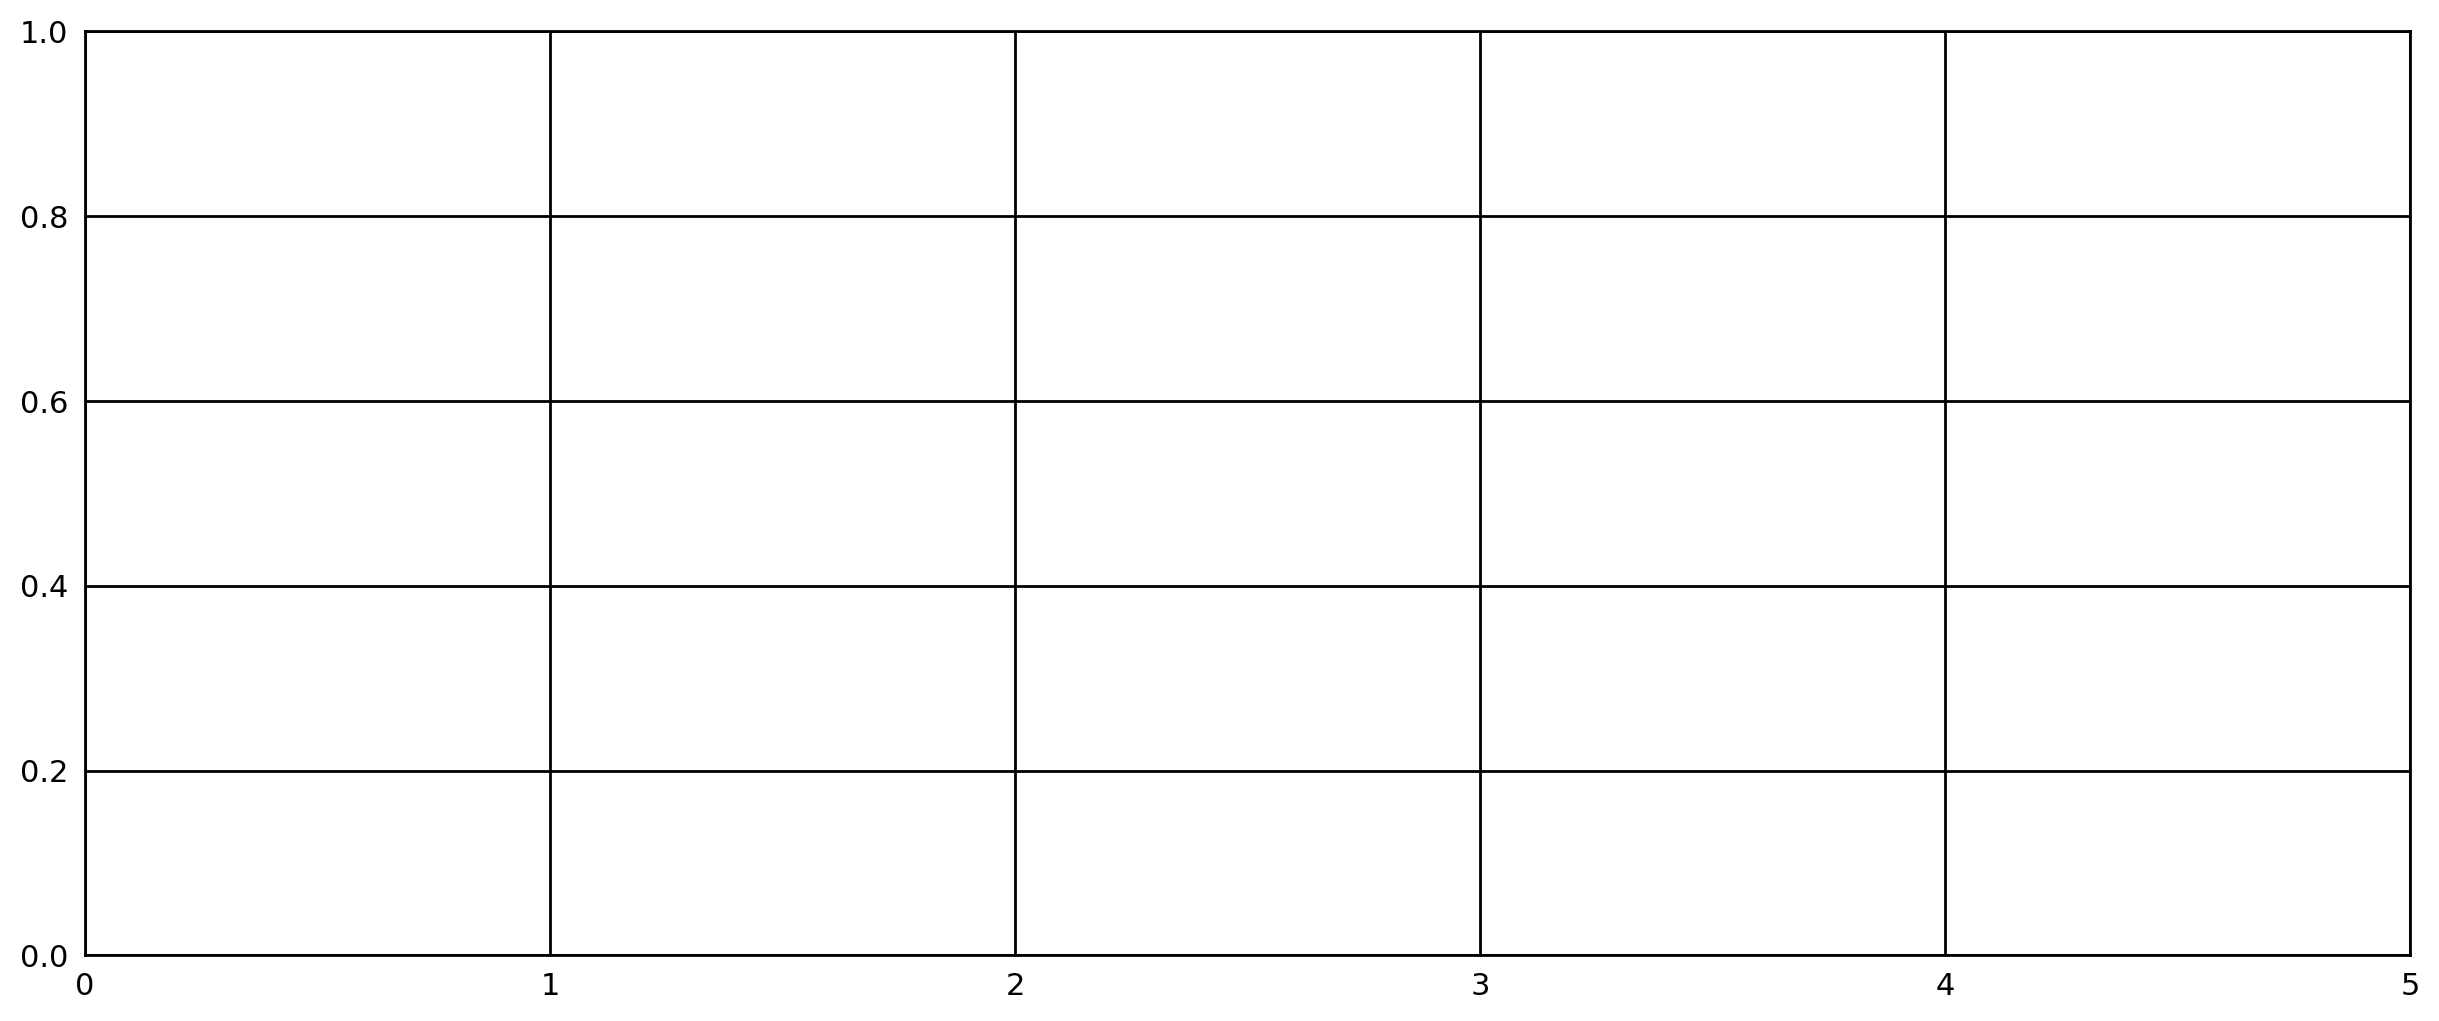

<Figure size 2000x1200 with 0 Axes>

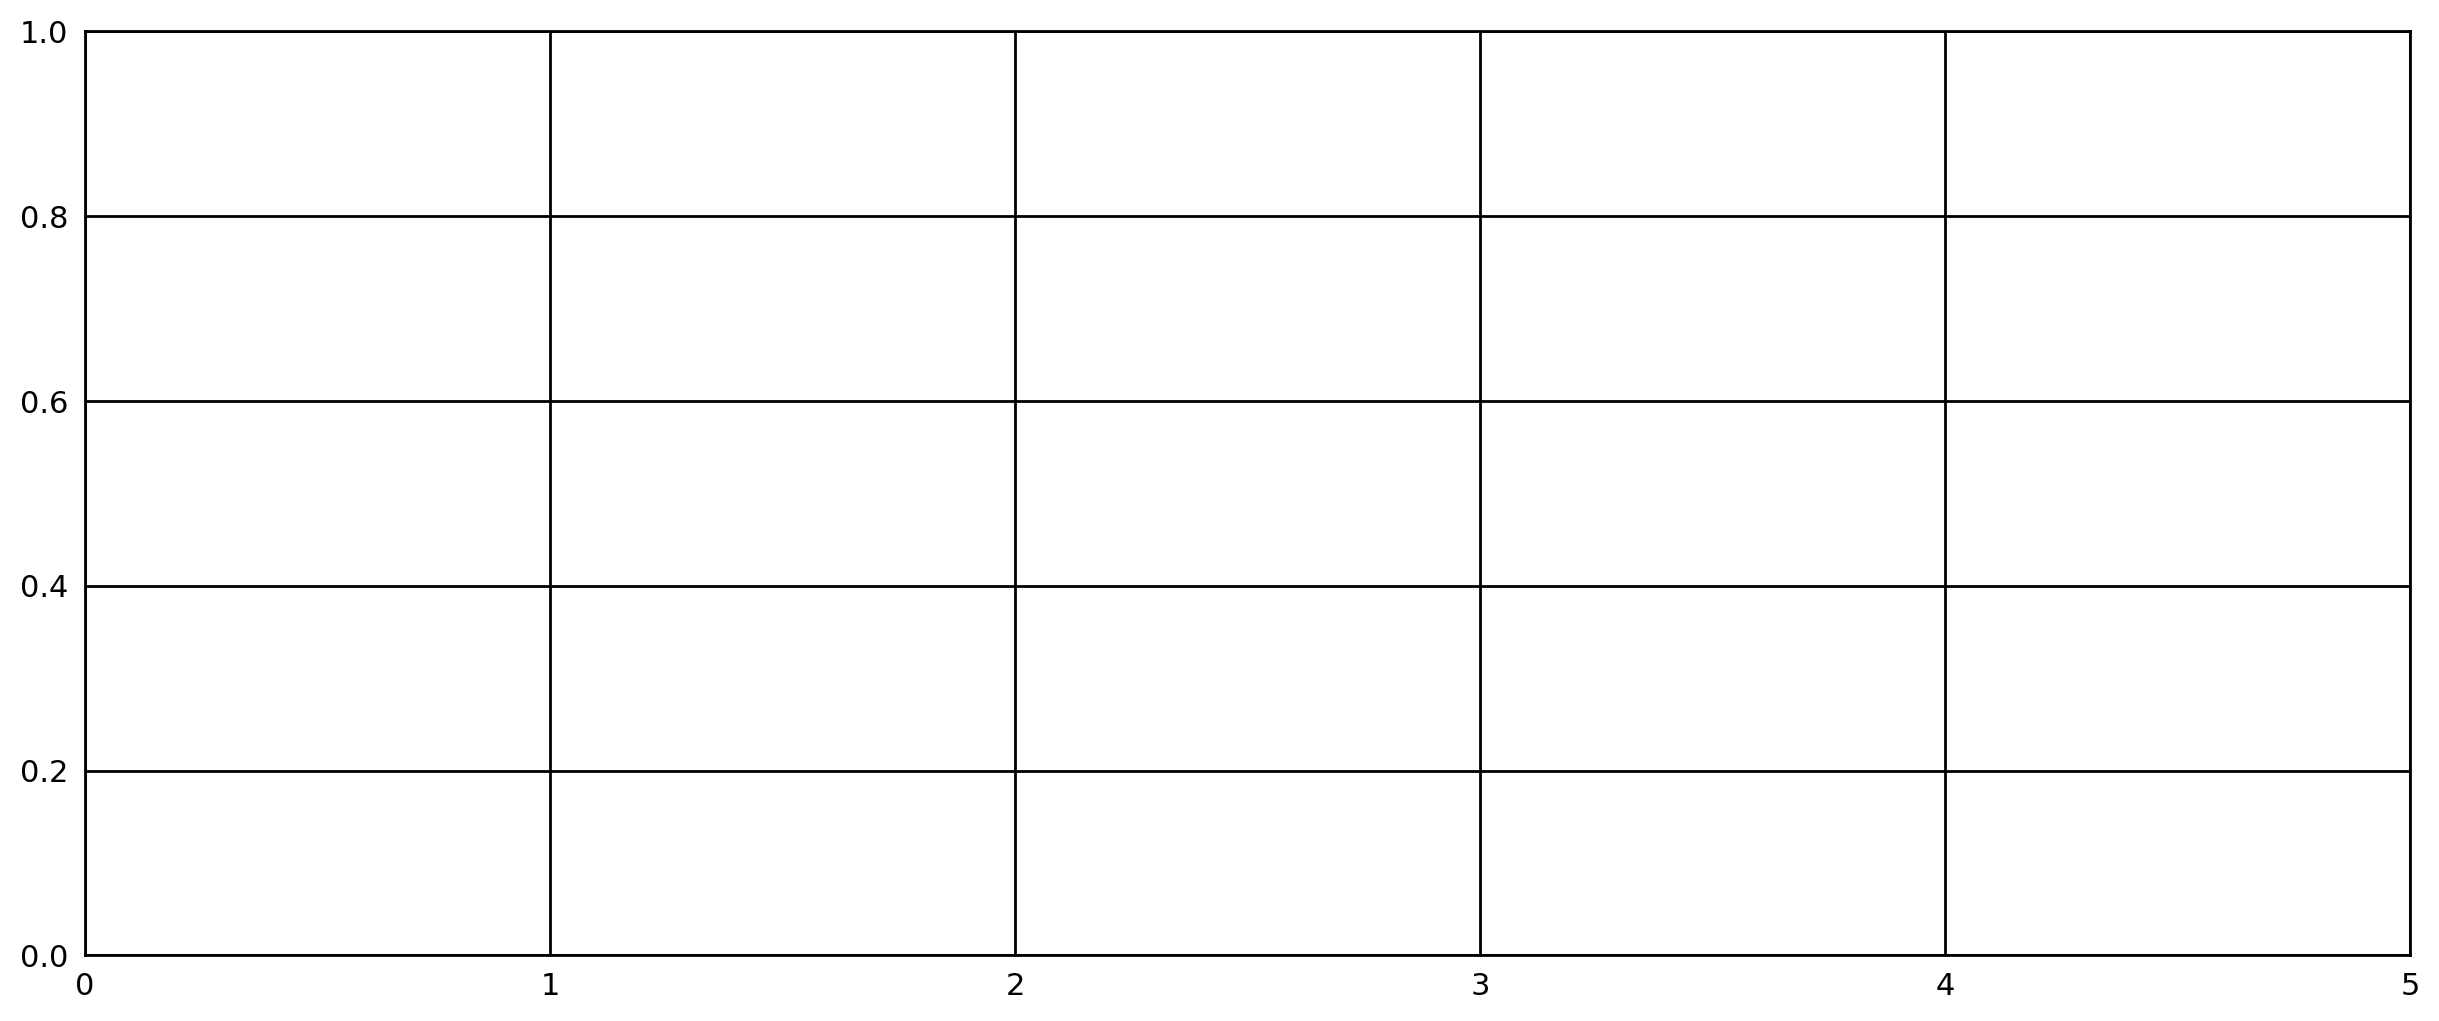

In [350]:
import matplotlib.pyplot as plt
import pandas as pd
#plt.grid(True)
#plt.scatter(transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3],transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[0],s=1,color='r')
#plt.scatter(transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3],transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[1],s=1,color='g')
#plt.scatter(transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3],transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[2],s=1,color='b')

def binned_scatter_plot(ax,x_list, y_list, x_range1=None,x_range2=None,x_range3=None, smooth=True, colors=None, labels=None):
    """
    Create binned scatter plots from multiple unbinned x and y data sets.
    
    Parameters:
    x_list (list of array-like): List of arrays of x data points.
    y_list (list of array-like): List of arrays of y data points.
    n_bins (int): Number of bins to use for binning the data.
    smooth (bool): Whether to plot a smooth line through the binned data points.
    colors (list of str): List of colors for the points and lines in the plot.
    labels (list of str): List of labels for each dataset in the plot legend.
    """
    if colors is None:
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    
    if labels is None:
        labels = [f'Dataset {i+1}' for i in range(len(x_list))]
    
    plt.figure(figsize=(10, 6))
    
    for i, (x, y) in enumerate(zip(x_list, y_list)):
        color = colors[i % len(colors)]
        label = labels[i]





        # Filter data within x_range
        if x_range1:
            mask1 = (x >= x_range1[0]) & (x <= x_range1[1])
            x_filtered1 = x[mask1]
            y_filtered1 = y[mask1]
        else:
            x_filtered1 = x
            y_filtered1 = y
              
        
        # Create a DataFrame from the filtered x and y data
        data1 = pd.DataFrame({'x1': x_filtered1, 'y1': y_filtered1})
        
        
        
        # Bin the data
        data1['bin'] = pd.cut(data1['x1'], bins=nbins1, labels=False)
        
        # Calculate mean and standard error for each bin
        binned_data1 = data1.groupby('bin').agg({
            'x1': 'mean',
            'y1': ['mean', 'sem']
        }).reset_index()
        
        # Flatten the MultiIndex columns
        binned_data1.columns = ['bin', 'x_mean', 'y_mean', 'y_sem']
        
        # Plot the binned scatter plot with error bars
        







        # Filter data within x_range
        if x_range2:
            mask2 = (x >= x_range2[0]) & (x <= x_range2[1])
            x_filtered2 = x[mask2]
            y_filtered2 = y[mask2]
        else:
            x_filtered2 = x
            y_filtered2 = y  
        # Create a DataFrame from the filtered x and y data
        data2 = pd.DataFrame({'x2': x_filtered2, 'y2': y_filtered2})
              
        # Bin the data
        data2['bin'] = pd.cut(data2['x2'], bins=nbins2, labels=False)
        
        # Calculate mean and standard error for each bin
        binned_data2 = data2.groupby('bin').agg({
            'x2': 'mean',
            'y2': ['mean', 'sem']
        }).reset_index()
        
        # Flatten the MultiIndex columns
        binned_data2.columns = ['bin', 'x_mean', 'y_mean', 'y_sem']
        
        # Plot the binned scatter plot with error bars







         # Filter data within x_range
        if x_range3:
            mask3 = (x >= x_range3[0]) & (x <= x_range3[1])
            x_filtered3 = x[mask3]
            y_filtered3 = y[mask3]
        else:
            x_filtered3 = x
            y_filtered3 = y  
        # Create a DataFrame from the filtered x and y data
        data3 = pd.DataFrame({'x3': x_filtered3, 'y3': y_filtered3})
        
        # Bin the data
        data3['bin'] = pd.cut(data3['x3'], bins=nbins3, labels=False)
        
        # Calculate mean and standard error for each bin
        binned_data3 = data3.groupby('bin').agg({
            'x3': 'mean',
            'y3': ['mean', 'sem']
        }).reset_index()
        
        # Flatten the MultiIndex columns
        binned_data3.columns = ['bin', 'x_mean', 'y_mean', 'y_sem']
        
        # Plot the binned scatter plot with error bars









        plt.figure(figsize=(15, 6))
        #plt.scatter(x_list,y_list, color='blue', alpha=0.7,s=1, label='Data Points')
        plt.xlim(-5,5)
        #plt.ylim(-0.55,1)
        
        ax.errorbar(binned_data1['x_mean'], binned_data1['y_sem']*np.sqrt(nbins1), yerr=binned_data1['y_sem'], fmt='o', color=color, label=f'{label} - Binned Data with Error Bars')
        ax.errorbar(binned_data2['x_mean'], binned_data2['y_sem']*np.sqrt(nbins2), yerr=binned_data2['y_sem'], fmt='o', color=color, label=f'{label} - Binned Data with Error Bars')
        ax.errorbar(binned_data3['x_mean'], binned_data3['y_sem']*np.sqrt(nbins3), yerr=binned_data3['y_sem'], fmt='o', color=color, label=f'{label} - Binned Data with Error Bars')

        plt.grid(True)



fig, axs = plt.subplots(1, 3, figsize=(18, 6))
x_range_1 = (1.5, 2.1)
x_range_2 = (2.1, 2.4)
x_range_3 = (2.4, 5)
nbins1=18
nbins2=5
nbins3=3

binned_scatter_plot(axs[0],[transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3]],[transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[0]],x_range_1,x_range_2,x_range_3)
axs[0].scatter(a,e,color='r')
plt.xlim(0,5)
binned_scatter_plot(axs[1],[transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3]],[transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[1]],x_range_1,x_range_2,x_range_3)
axs[1].scatter(a,f,color='r')
plt.xlim(0,5)
#plt.ylim(70,180)
binned_scatter_plot(axs[2],[transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3]],[transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[2]],x_range_1,x_range_2,x_range_3)
axs[2].scatter(a,g,color='r')
plt.xlim(0,5)


In [196]:
!pip install binsreg


[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [373]:
!pip install rpy2

                                              0.0/220.0 kB ? eta -:--:--
     ---------------------                  122.9/220.0 kB 3.5 MB/s eta 0:00:01
     -------------------------------------- 220.0/220.0 kB 4.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
                                              0.0/133.3 kB ? eta -:--:--
     --------------------------------       112.6/133.3 kB 6.8 MB/s eta 0:00:01
     -------------------------------------- 133.3/133.3 kB 2.6 MB/s eta 0:00:00
  Created wheel for rpy2: filename=rpy2-3.5.16-py3-none-any.whl size=220719 sha256=610d82f9bd128b8acad91267e4c5ccc6d7721f71d4398dc99579d021ea81ba1f
  Stored in directory: c:\users\sutir\appdata\local\pip\


[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Python311\Lib\site-packages\binsreg\binsreg.py:659: UserWarning: Confidence intervals/bands are valid when nbins is much larger than the IMSE-optimal choice. Compare your choice with the IMSE-optimal one obtained by binsregselect().
c:\Python311\Lib\site-packages\binsreg\binsreg.py:1520: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


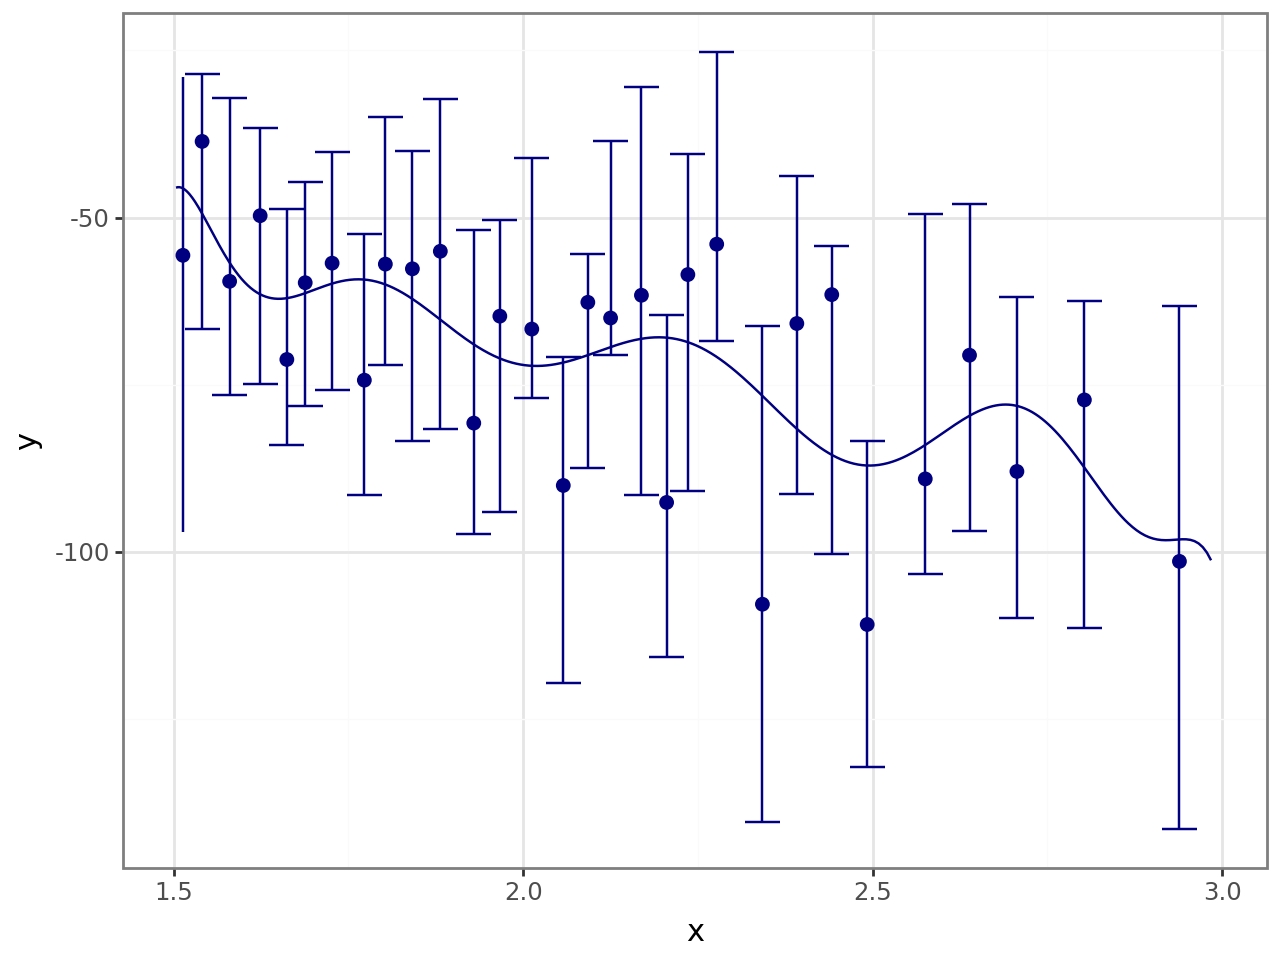

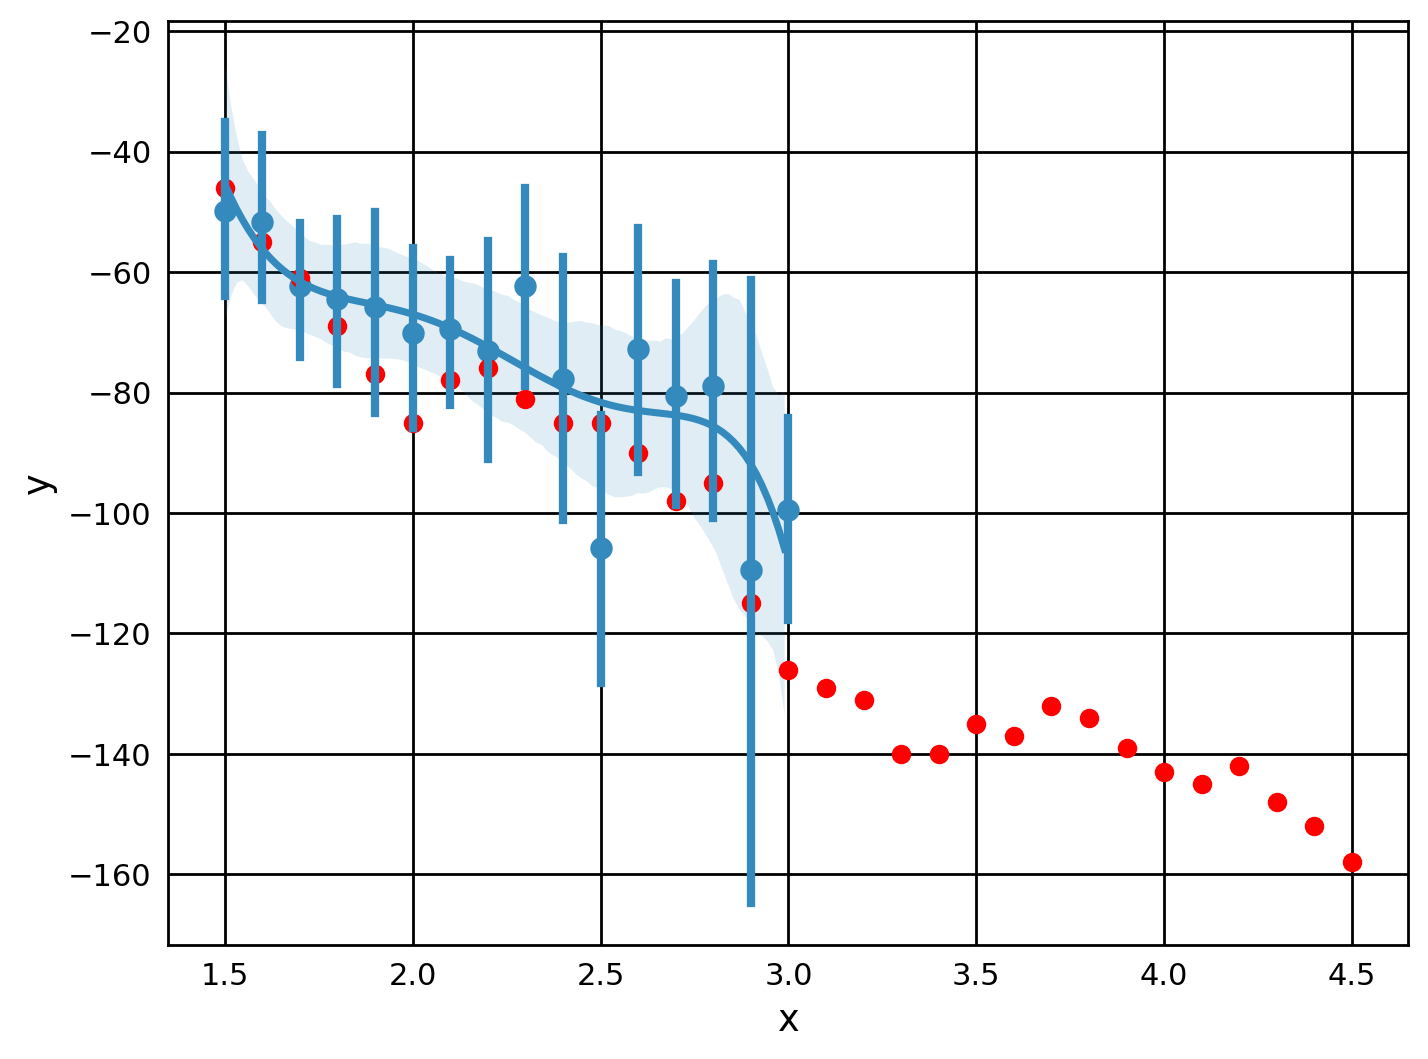

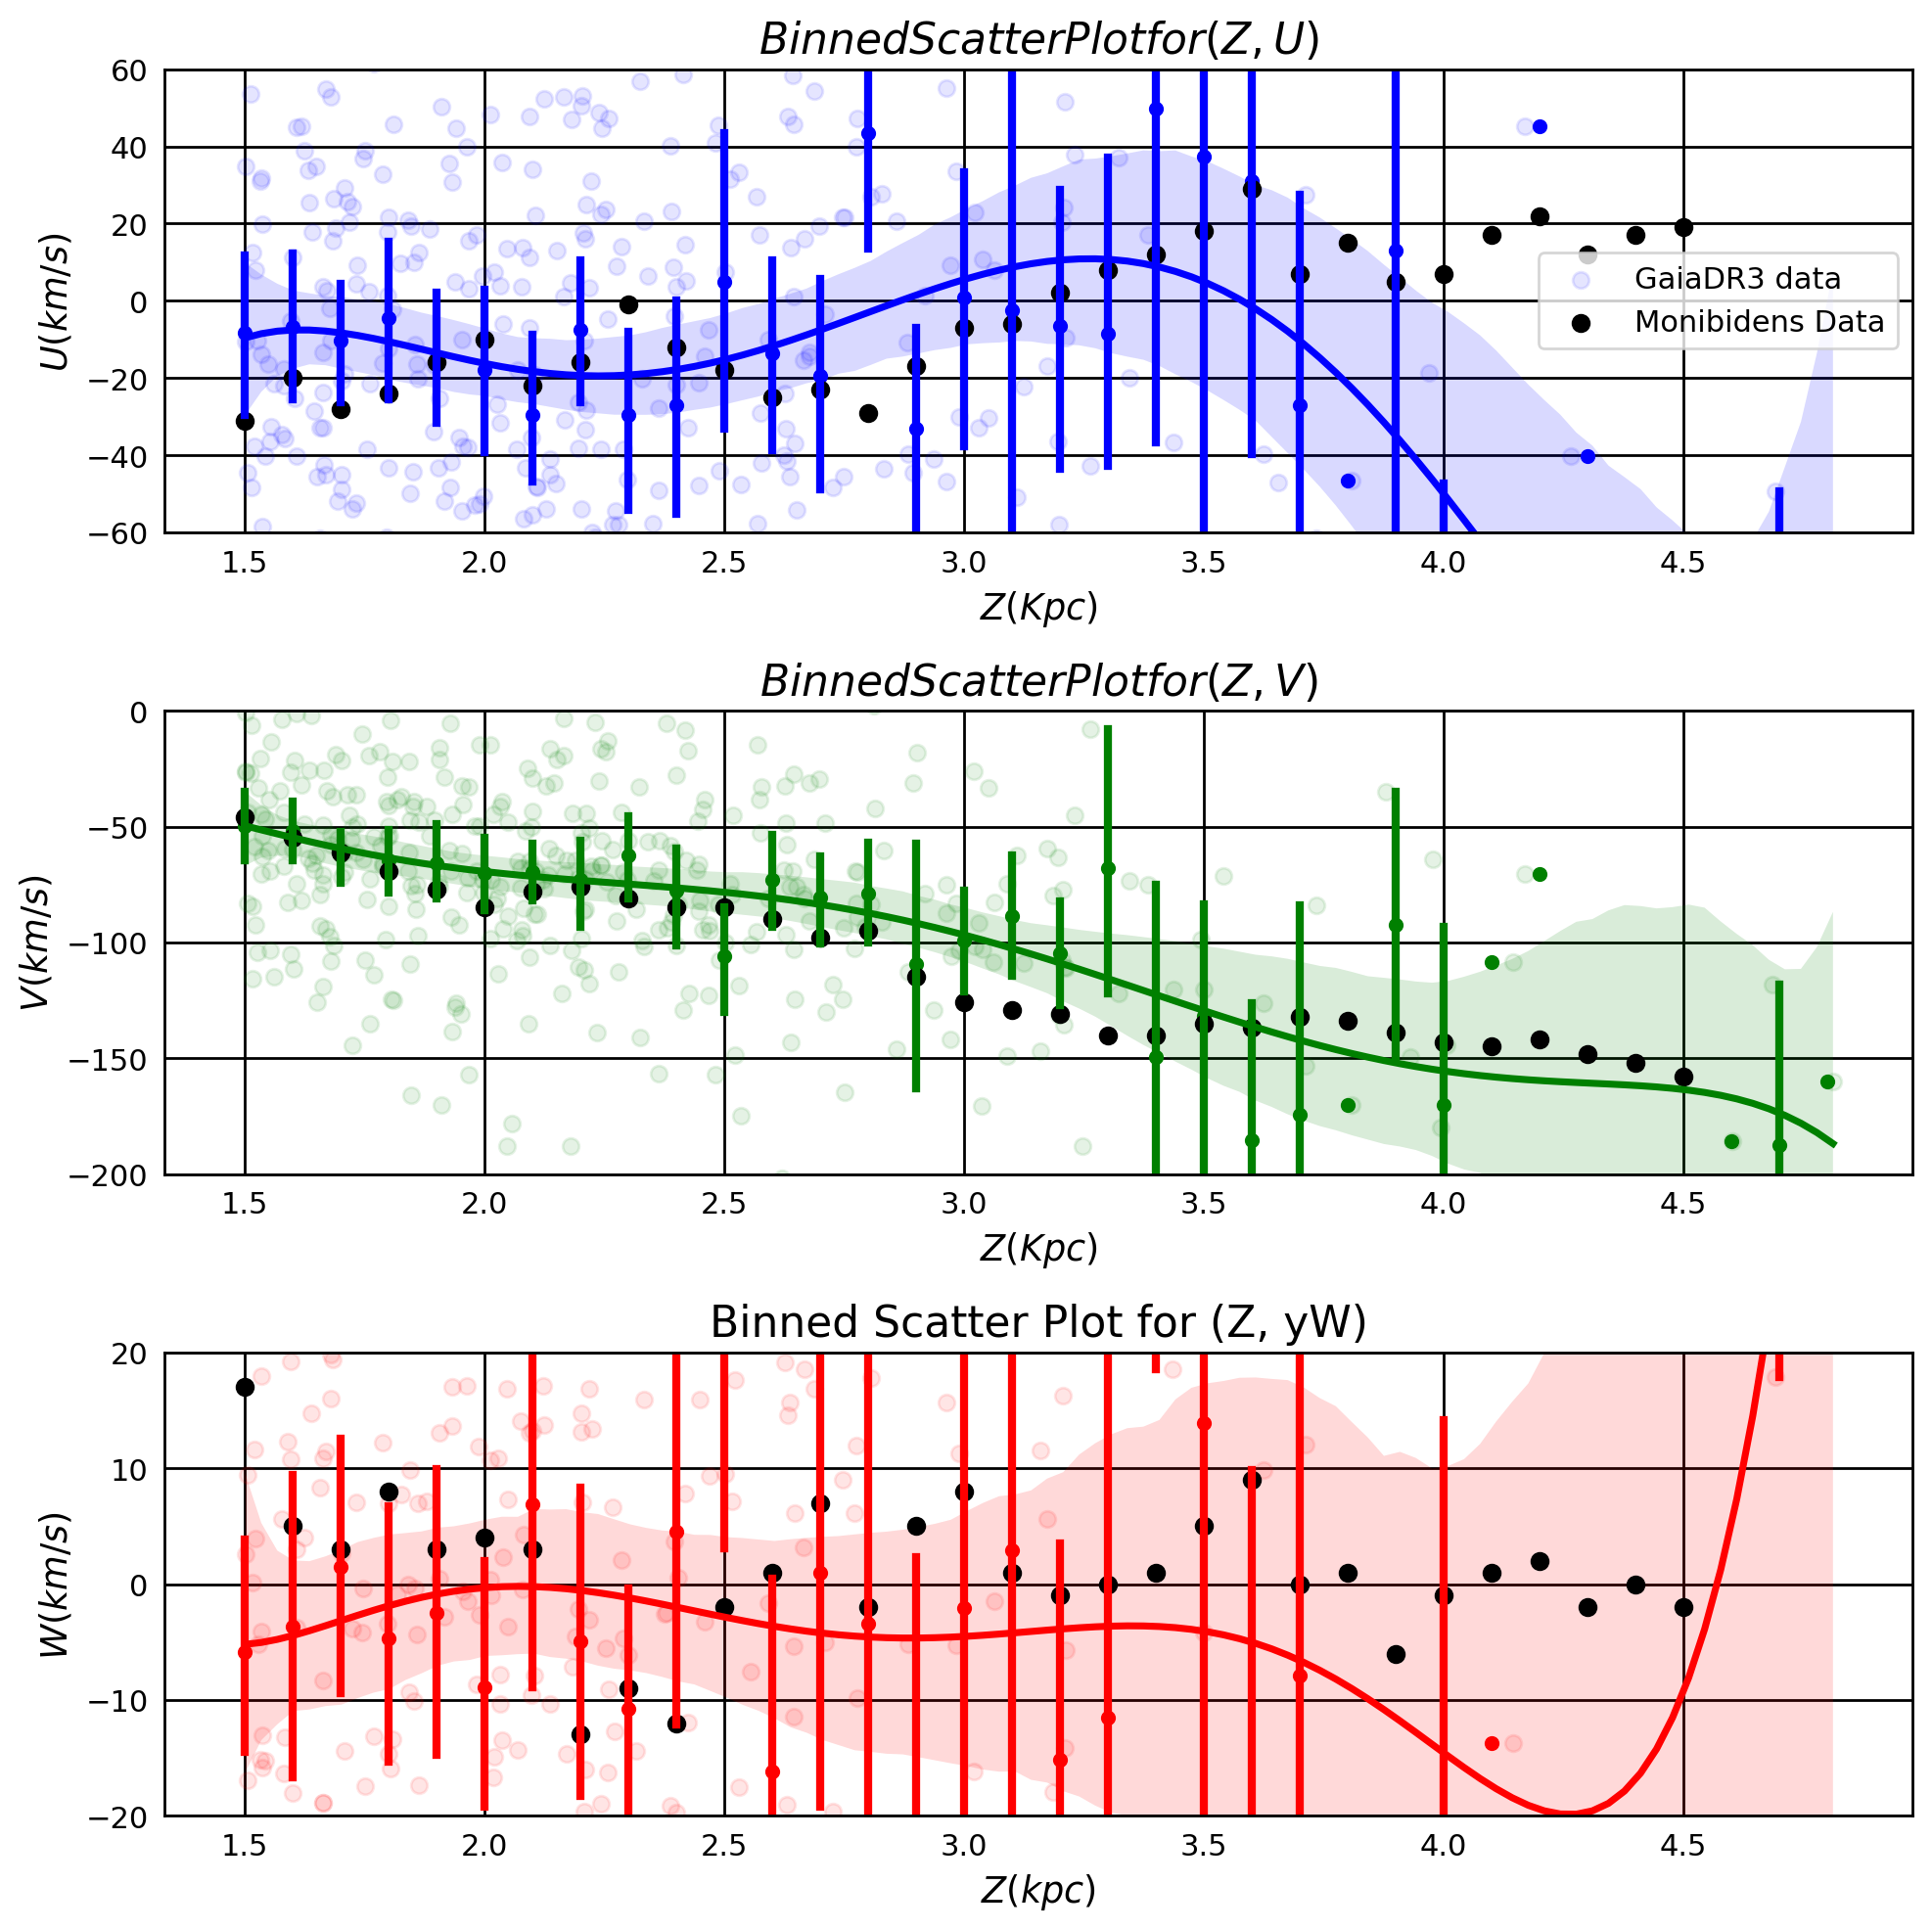

In [620]:
import binsreg
import seaborn as sns

import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, Galactocentric
ra_array = np.array(results1['ra']) * u.degree
dec_array = np.array(results1['dec']) * u.degree
distance_array = (np.array(results1['parallax']) * u.mas).to(u.kpc, u.parallax())
pm_ra_cosdec_array = np.array(results1['pmra']) * u.mas / u.yr
pm_dec_array = np.array(results1['pmdec']) * u.mas / u.yr
radial_velocity_array = np.array(results1['radial_velocity']) * u.km / u.s
radial_velocity_error = np.array(results1['radial_velocity_error']) * u.km / u.s
pm_ra_error = np.array(results1['pmra_error']) * u.mas / u.yr
pm_dec_error = np.array(results1['pmdec_error']) * u.mas / u.yr

# Function to transform coordinates
def transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity):
    c = SkyCoord(ra=ra, dec=dec, distance=distance, pm_ra_cosdec=pm_ra_cosdec,
                 pm_dec=pm_dec, radial_velocity=radial_velocity)
    g = c.transform_to(Galactocentric(galcen_distance=8.2 * u.kpc,  # Default distance to Galactic Center
                                      z_sun=0.020 * u.kpc,  # Default Sun's height above the Galactic plane
                                      galcen_v_sun=[5, -5, 7.25] * (u.km / u.s)))
    return np.array([g.v_x.value, g.v_y.value, g.v_z.value ,np.abs(g.z.value)])

max(transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[2])
def binscatter(**kwargs):
    # Estimate binsreg
    est = binsreg.binsreg(**kwargs)
    
    # Retrieve estimates
    df_est = pd.concat([d.dots for d in est.data_plot])
    df_est = df_est.rename(columns={'x': kwargs.get("x"), 'fit': kwargs.get("y")})
    
    # Add confidence intervals
    if "ci" in kwargs:
        df_est = pd.merge(df_est, pd.concat([d.ci for d in est.data_plot]))
        df_est = df_est.drop(columns=['x'])
        df_est['ci'] = df_est['ci_r'] - df_est['ci_l']
    
    # Rename groups
    if "by" in kwargs:
        df_est['group'] = df_est['group'].astype(data[kwargs.get("by")].dtype)
        df_est = df_est.rename(columns={'group': kwargs.get("by")})

    return df_est
x = transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3]
y=transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[1]
data = pd.DataFrame({'x': x, 'y': y})
# Estimate binsreg
filtered_data = data[(data['x'] >= 1.5) & (data['x'] <= 3)]

# Unbinned scatter plot using seaborn for filtered data
#plt.scatter(filtered_data['x'], filtered_data['y'], alpha=0.5, label='Unbinned')

# Binned scatter plot using binsreg for filtered data
df_est = binscatter(y='y',x='x', data=filtered_data, nbins=30,ci=(3,3),polyreg=10)
sns.regplot( data=filtered_data, x="x", y="y", x_bins=np.arange(1, 5, 0.1), order=6)
plt.scatter(a,c,color='r')
transformed_data = transform_to_galactocentric(ra_array, dec_array, distance_array, pm_ra_cosdec_array, pm_dec_array, radial_velocity_array)

x = transformed_data[3]
y1 = transformed_data[0]
y2 = transformed_data[1]
y3 = transformed_data[2]

# Create DataFrames
data1 = pd.DataFrame({'x': x, 'y': y1})
data2 = pd.DataFrame({'x': x, 'y': y2})
data3 = pd.DataFrame({'x': x, 'y': y3})

# Filter data
filtered_data1 = data1[(data1['x'] >= 1.5) & (data1['x'] <= 5)]
filtered_data2 = data2[(data2['x'] >= 1.5) & (data2['x'] <= 5)]
filtered_data3 = data3[(data3['x'] >= 1.5) & (data3['x'] <= 5)]

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# Plot (x, y1)
sns.regplot(ax=axes[0], x='x', y='y', data=filtered_data1, x_bins=np.arange(1, 5, 0.1), order=5, scatter_kws={'s':20,'color':'blue'}, line_kws={'color':'blue'})
axes[0].scatter(filtered_data1['x'], filtered_data1['y'], alpha=0.1, color='blue',label='GaiaDR3 data ')
axes[0].scatter(a,b,color='black',label='Monibidens Data')
axes[0].set_xlabel(r'$Z(Kpc)$')
axes[0].set_ylabel(r'$U(km/s)$')
axes[0].set_ylim(-60,60)
axes[0].set_title(r'$Binned Scatter Plot for (Z, U)$')
axes[0].legend()
# Plot (x, y2)
sns.regplot(ax=axes[1], x='x', y='y', data=filtered_data2, x_bins=np.arange(1, 5, 0.1), order=6, scatter_kws={'s':20,'color':'green'}, line_kws={'color':'green'})
axes[1].scatter(filtered_data2['x'], filtered_data2['y'], alpha=0.1, color='green',label='GaiaDR3 data ')
axes[1].scatter(a,c,color='black',label='Monibidens Data')
axes[1].set_xlabel(r'$Z(Kpc)$')
axes[1].set_ylabel(r'$V(km/s)$')
axes[1].set_ylim(-200,0)
axes[1].set_title(r'$Binned Scatter Plot for (Z, V)$')
axes[1].legend()

# Plot (x, y3)
sns.regplot(ax=axes[2], x='x', y='y', data=filtered_data3, x_bins=np.arange(1, 5, 0.1), order=6, scatter_kws={'s':20,'color':'red'}, line_kws={'color':'red'})
axes[2].scatter(filtered_data3['x'], filtered_data3['y'], alpha=0.1, color='red',label='GaiaDR3 data ')
axes[2].scatter(a,d,color='black',label='Monibidens Data')
axes[2].set_xlabel(r'$Z(kpc)$')
axes[2].set_ylabel(r'$W(km/s)$')
axes[2].set_ylim(-20,20)
axes[2].set_title('Binned Scatter Plot for (Z, yW)')
axes[2].legend()

plt.tight_layout()
plt.show()


c:\Python311\Lib\site-packages\binsreg\binsreg.py:659: UserWarning: Confidence intervals/bands are valid when nbins is much larger than the IMSE-optimal choice. Compare your choice with the IMSE-optimal one obtained by binsregselect().
c:\Python311\Lib\site-packages\binsreg\binsreg.py:1520: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


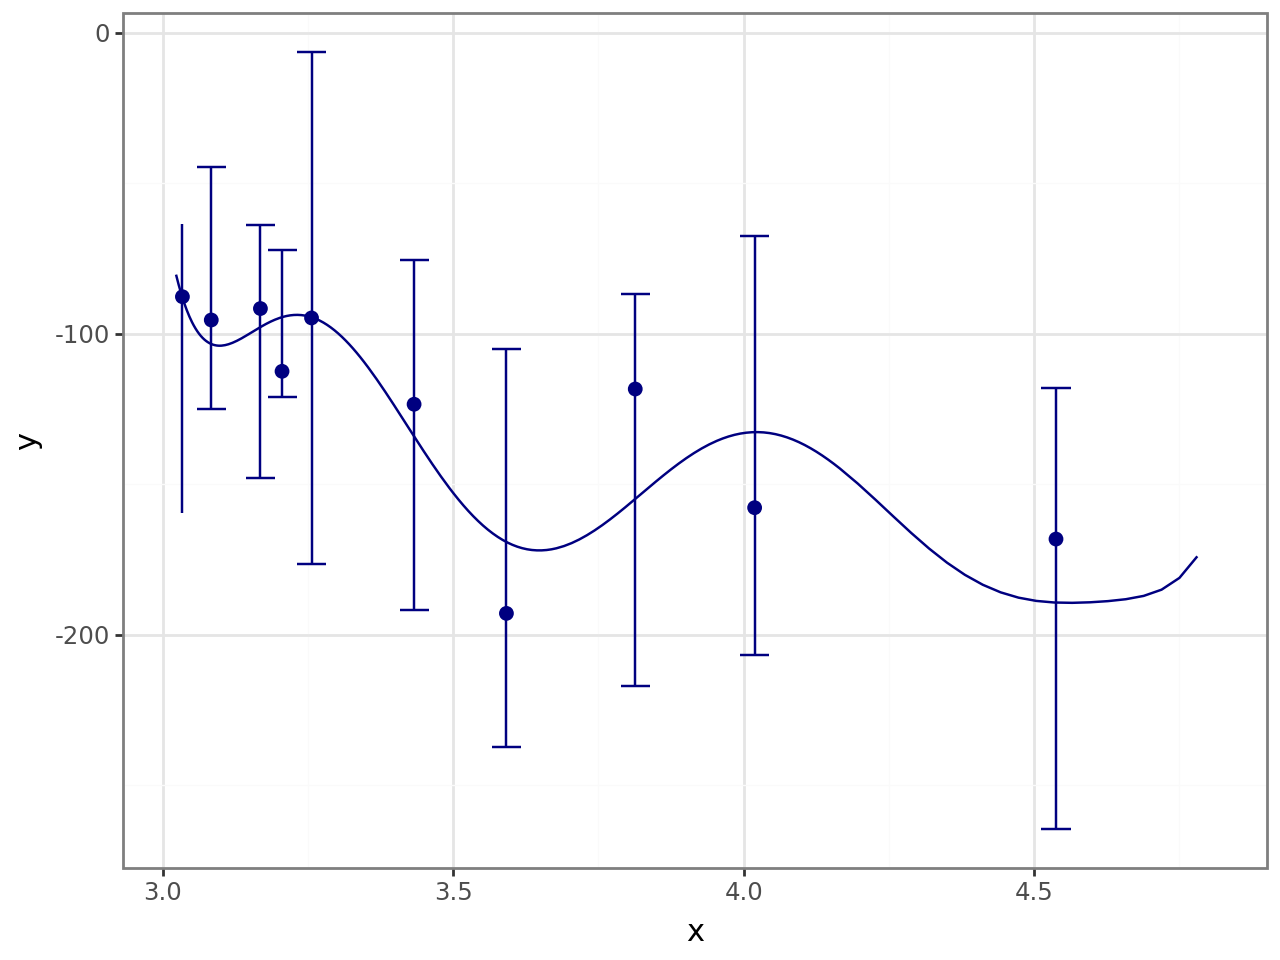

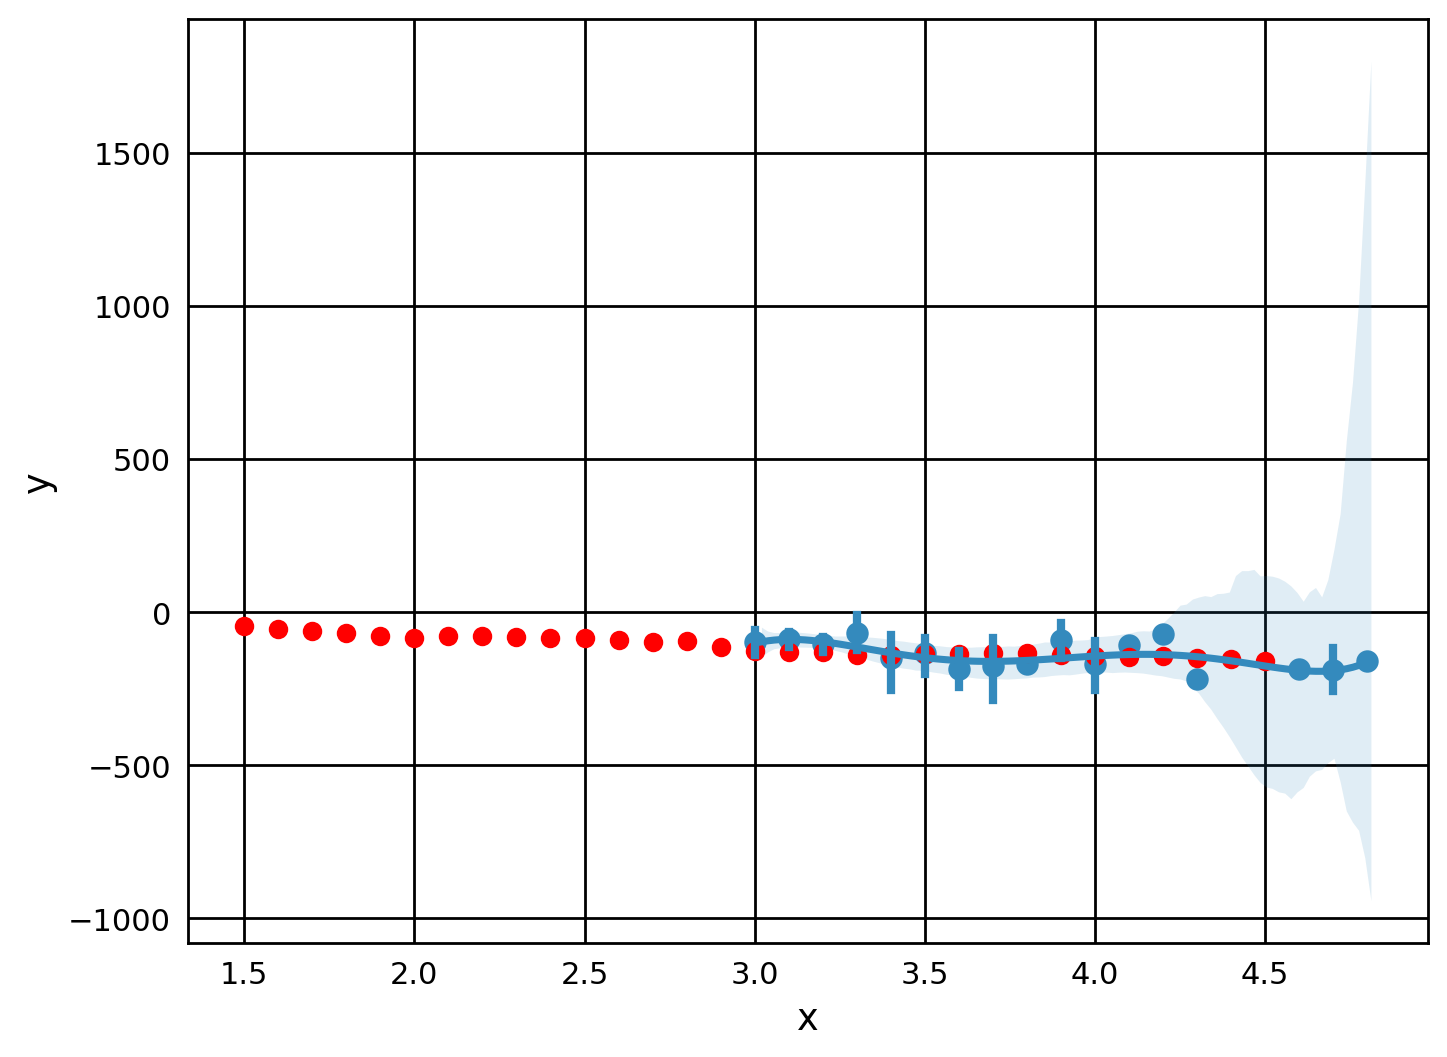

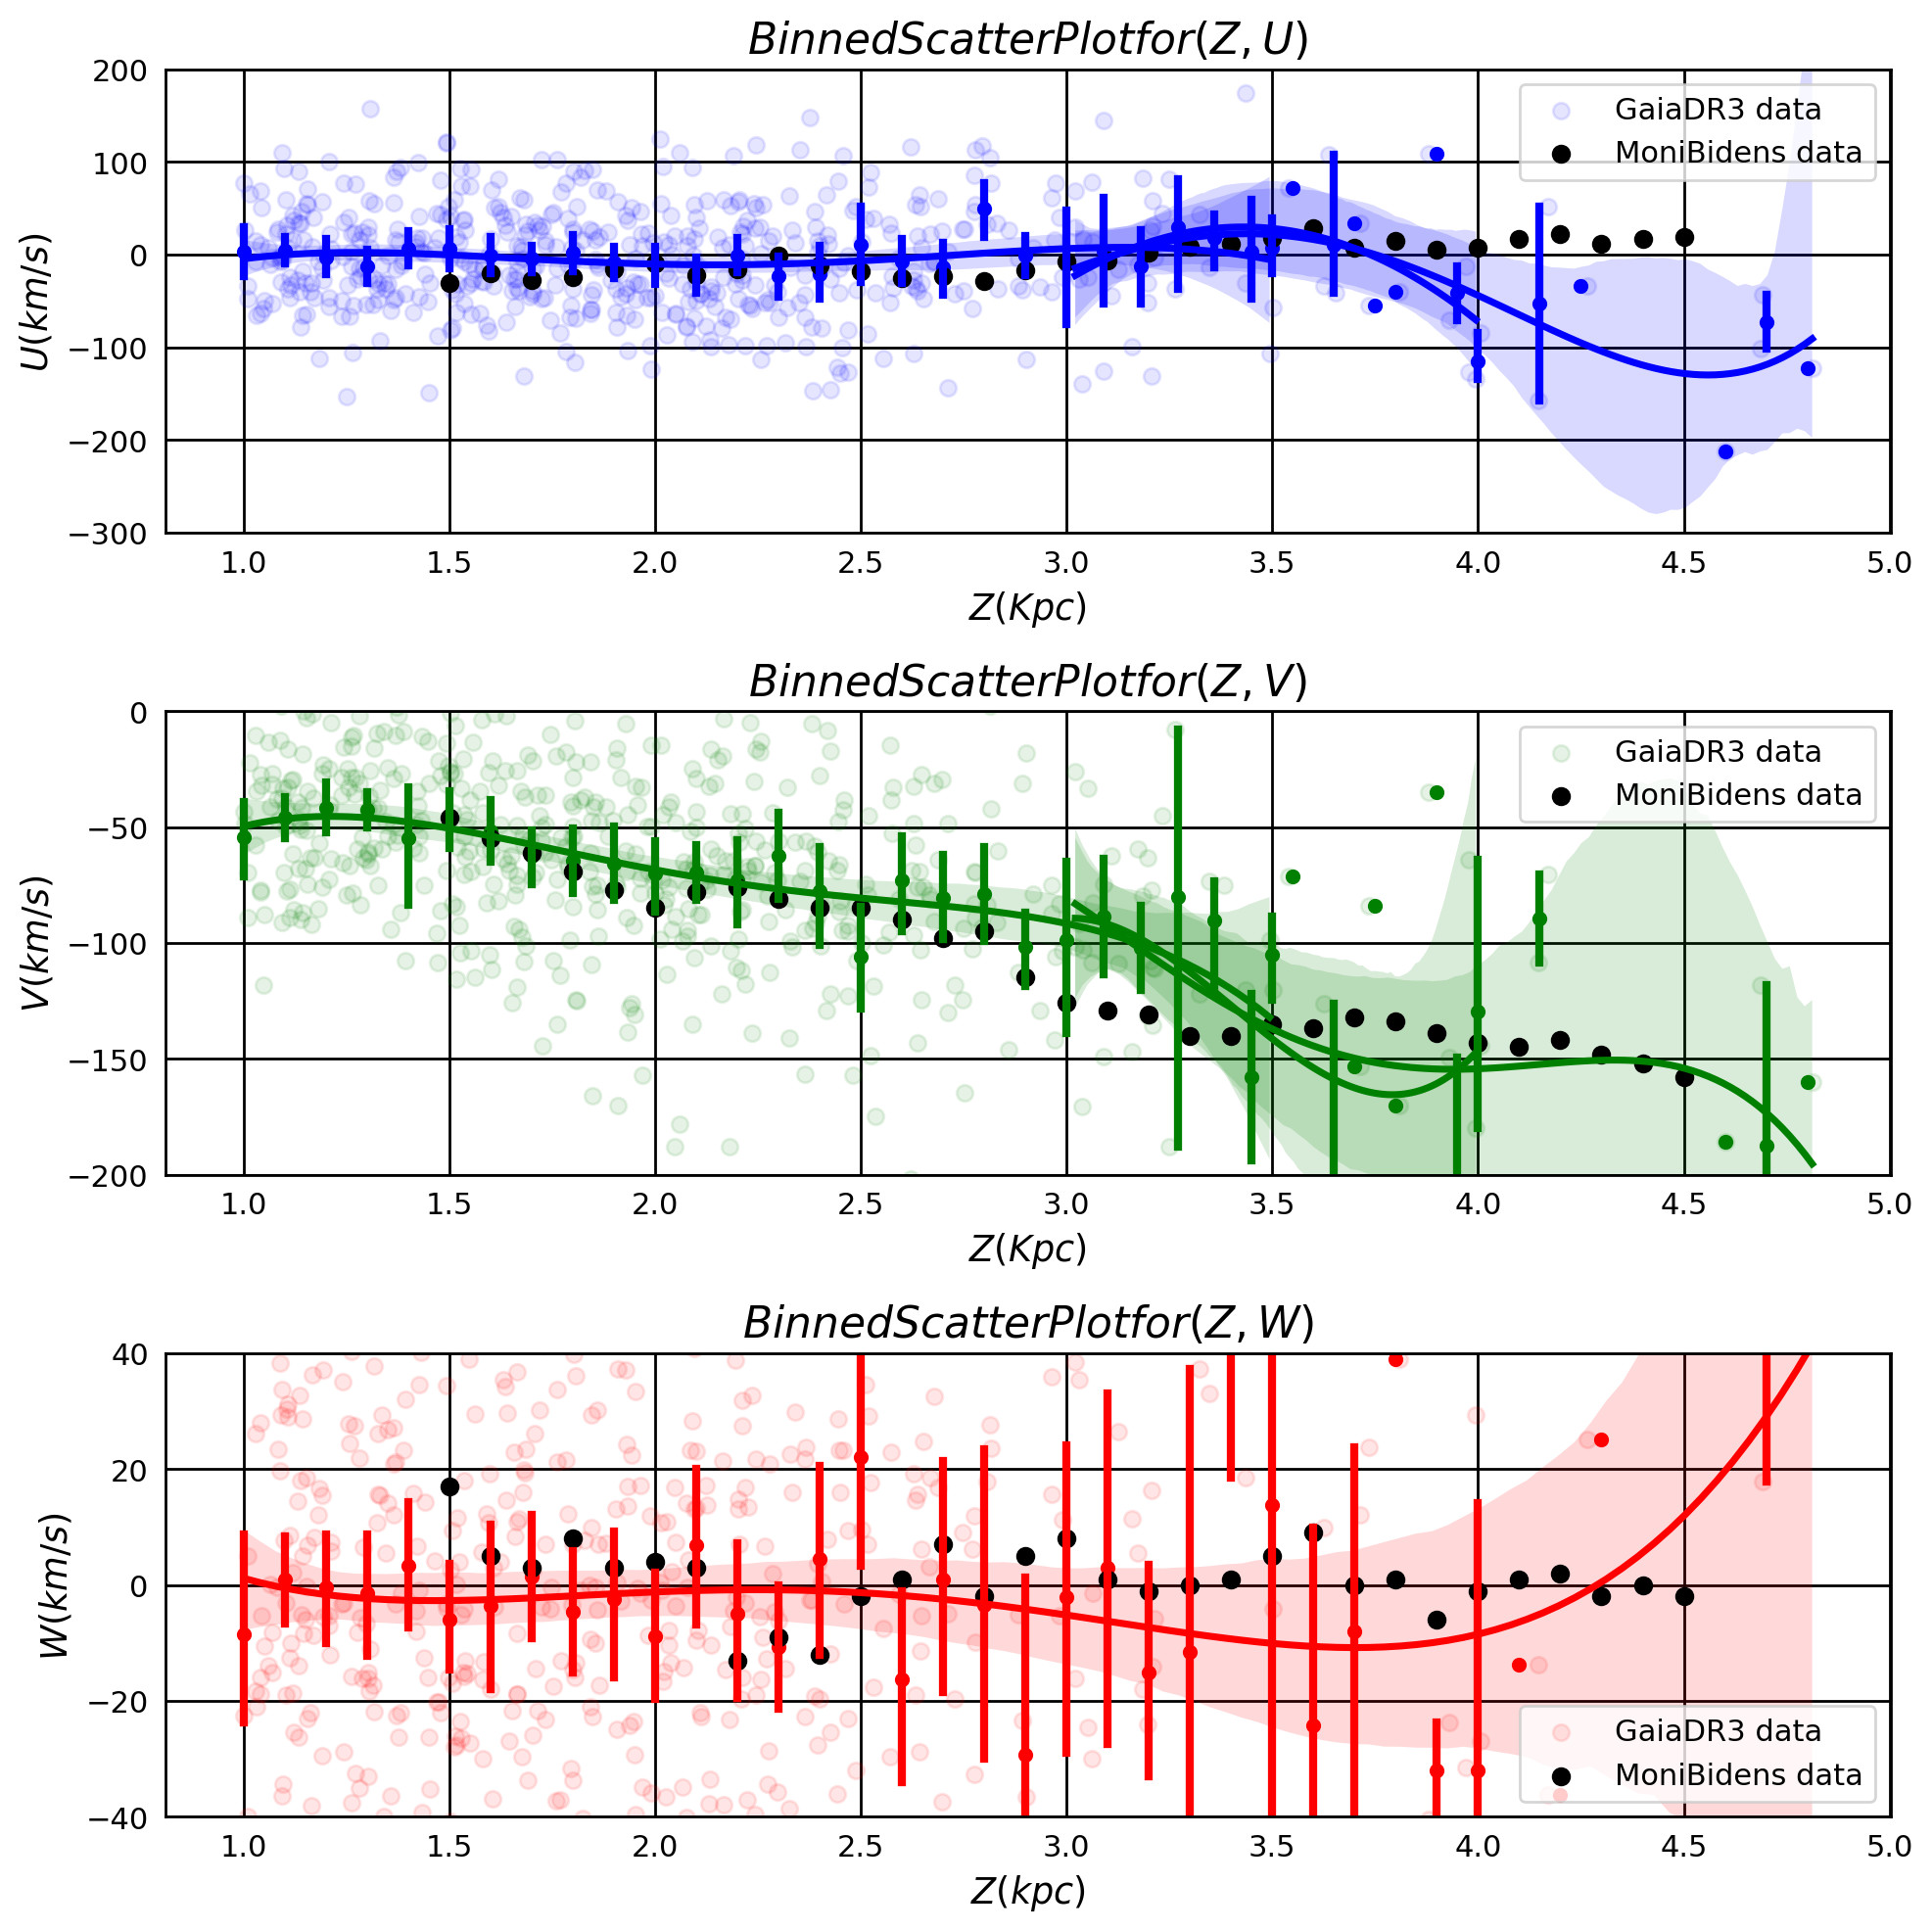

In [622]:
import binsreg
import seaborn as sns

import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, Galactocentric
ra_array = np.array(results1['ra']) * u.degree
dec_array = np.array(results1['dec']) * u.degree
distance_array = (np.array(results1['parallax']) * u.mas).to(u.kpc, u.parallax())
pm_ra_cosdec_array = np.array(results1['pmra']) * u.mas / u.yr
pm_dec_array = np.array(results1['pmdec']) * u.mas / u.yr
radial_velocity_array = np.array(results1['radial_velocity']) * u.km / u.s
radial_velocity_error = np.array(results1['radial_velocity_error']) * u.km / u.s
pm_ra_error = np.array(results1['pmra_error']) * u.mas / u.yr
pm_dec_error = np.array(results1['pmdec_error']) * u.mas / u.yr

# Function to transform coordinates
def transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity):
    c = SkyCoord(ra=ra, dec=dec, distance=distance, pm_ra_cosdec=pm_ra_cosdec,
                 pm_dec=pm_dec, radial_velocity=radial_velocity)
    g = c.transform_to(Galactocentric(galcen_distance=8.2 * u.kpc,  # Default distance to Galactic Center
                                      z_sun=0.020 * u.kpc,  # Default Sun's height above the Galactic plane
                                      galcen_v_sun=[11.1, -5, 7.25] * (u.km / u.s)))
    return np.array([g.v_x.value, g.v_y.value, g.v_z.value ,np.abs(g.z.value)])

max(transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[2])
def binscatter(**kwargs):
    # Estimate binsreg
    est = binsreg.binsreg(**kwargs)
    
    # Retrieve estimates
    df_est = pd.concat([d.dots for d in est.data_plot])
    df_est = df_est.rename(columns={'x': kwargs.get("x"), 'fit': kwargs.get("y")})
    
    # Add confidence intervals
    if "ci" in kwargs:
        df_est = pd.merge(df_est, pd.concat([d.ci for d in est.data_plot]))
        df_est = df_est.drop(columns=['x'])
        df_est['ci'] = df_est['ci_r'] - df_est['ci_l']
    
    # Rename groups
    if "by" in kwargs:
        df_est['group'] = df_est['group'].astype(data[kwargs.get("by")].dtype)
        df_est = df_est.rename(columns={'group': kwargs.get("by")})

    return df_est
x = transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3]
y=transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[1]
data = pd.DataFrame({'x': x, 'y': y})
# Estimate binsreg
filtered_data = data[(data['x'] >= 3) & (data['x'] <= 5)]

# Unbinned scatter plot using seaborn for filtered data
#plt.scatter(filtered_data['x'], filtered_data['y'], alpha=0.5, label='Unbinned')

# Binned scatter plot using binsreg for filtered data
df_est = binscatter(y='y',x='x', data=filtered_data, nbins=10,ci=(3,3),polyreg=10)
sns.regplot( data=filtered_data, x="x", y="y", x_bins=np.arange(1, 5, 0.1), order=6)
plt.scatter(a,c,color='r')
transformed_data = transform_to_galactocentric(ra_array, dec_array, distance_array, pm_ra_cosdec_array, pm_dec_array, radial_velocity_array)

x = transformed_data[3]
y1 = transformed_data[0]
y2 = transformed_data[1]
y3 = transformed_data[2]

# Create DataFrames
data1 = pd.DataFrame({'x': x, 'y': y1})
data2 = pd.DataFrame({'x': x, 'y': y2})
data3 = pd.DataFrame({'x': x, 'y': y3})

# Filter data
filtered_data1 = data1[(data1['x'] >= 1) & (data1['x'] <= 5)]
filtered_data1_1 = data1[(data1['x'] >= 1) & (data1['x'] <= 3.5)]
filtered_data1_2=data1[(data1['x'] >= 3) & (data1['x'] <= 4)]
filtered_data1_3=data1[(data1['x'] >= 3) & (data1['x'] <= 5)]

filtered_data2 = data2[(data2['x'] >= 1) & (data2['x'] <= 5)]
filtered_data2_1 = data2[(data2['x'] >= 1) & (data2['x'] <= 3.5)]
filtered_data2_2 = data2[(data2['x'] >= 3) & (data2['x'] <= 4)]
filtered_data2_3 = data2[(data2['x'] >= 3) & (data2['x'] <= 5)]

filtered_data3= data3[(data3['x'] >= 1) & (data3['x'] <= 5)]


# Plotting
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# Plot (x, y1)
sns.regplot(ax=axes[0], x='x', y='y', data=filtered_data1_1, x_bins=np.arange(1, 3, 0.1), order=4, scatter_kws={'s':20,'color':'blue'}, line_kws={'color':'blue'})
sns.regplot(ax=axes[0], x='x', y='y', data=filtered_data1_2, x_bins=np.arange(3, 3.5, 0.09), order=2, scatter_kws={'s':20,'color':'blue'}, line_kws={'color':'blue'})
sns.regplot(ax=axes[0], x='x', y='y', data=filtered_data1_3, x_bins=np.arange(3.5, 5, 0.05), order=4, scatter_kws={'s':20,'color':'blue'}, line_kws={'color':'blue'})
axes[0].scatter(filtered_data1['x'], filtered_data1['y'], alpha=0.1, color='blue',label='GaiaDR3 data ')
axes[0].scatter(a,b,color='black',label='MoniBidens data')
axes[0].set_xlabel(r'$Z(Kpc)$')
axes[0].set_ylabel(r'$U(km/s)$')
axes[0].set_ylim(-300,200)
axes[0].legend()

axes[0].set_title(r'$Binned Scatter Plot for (Z, U)$')

# Plot (x, y2)
sns.regplot(ax=axes[1], x='x', y='y', data=filtered_data2_1, x_bins=np.arange(1, 3, 0.1), order=4, scatter_kws={'s':20,'color':'green'}, line_kws={'color':'green'})
sns.regplot(ax=axes[1], x='x', y='y', data=filtered_data2_2, x_bins=np.arange(3, 3.5, 0.09), order=3, scatter_kws={'s':20,'color':'green'}, line_kws={'color':'green'})
sns.regplot(ax=axes[1], x='x', y='y', data=filtered_data2_3, x_bins=np.arange(3.5, 5, 0.05), order=4, scatter_kws={'s':20,'color':'green'}, line_kws={'color':'green'})
axes[1].scatter(filtered_data2['x'], filtered_data2['y'], alpha=0.1, color='green',label='GaiaDR3 data ')
axes[1].scatter(a,c,color='black',label='MoniBidens data')
axes[1].set_xlabel(r'$Z(Kpc)$')
axes[1].set_ylabel(r'$V(km/s)$')
axes[1].set_ylim(-200,0)
axes[1].set_title(r'$Binned Scatter Plot for (Z, V)$')
axes[1].legend()
# Plot (x, y3)
sns.regplot(ax=axes[2], x='x', y='y', data=filtered_data3, x_bins=np.arange(1, 5, 0.1), order=4, scatter_kws={'s':20,'color':'red'}, line_kws={'color':'red'})
axes[2].scatter(filtered_data3['x'], filtered_data3['y'], alpha=0.1, color='red',label='GaiaDR3 data ')
axes[2].scatter(a,d,color='black',label='MoniBidens data')
axes[2].set_xlabel(r'$Z(kpc)$')
axes[2].set_ylabel(r'$W(km/s)$')
axes[2].set_ylim(-40,40)
axes[2].set_title(r'$Binned Scatter Plot for (Z, W)$')
axes[2].legend()
plt.tight_layout()
plt.show()


C:\Users\sutir\AppData\Local\Temp\ipykernel_37260\3866165746.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sutir\AppData\Local\Temp\ipykernel_37260\3866165746.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
C:\Users\sutir\AppData\Local\Temp\ipykernel_37260\3866165746.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

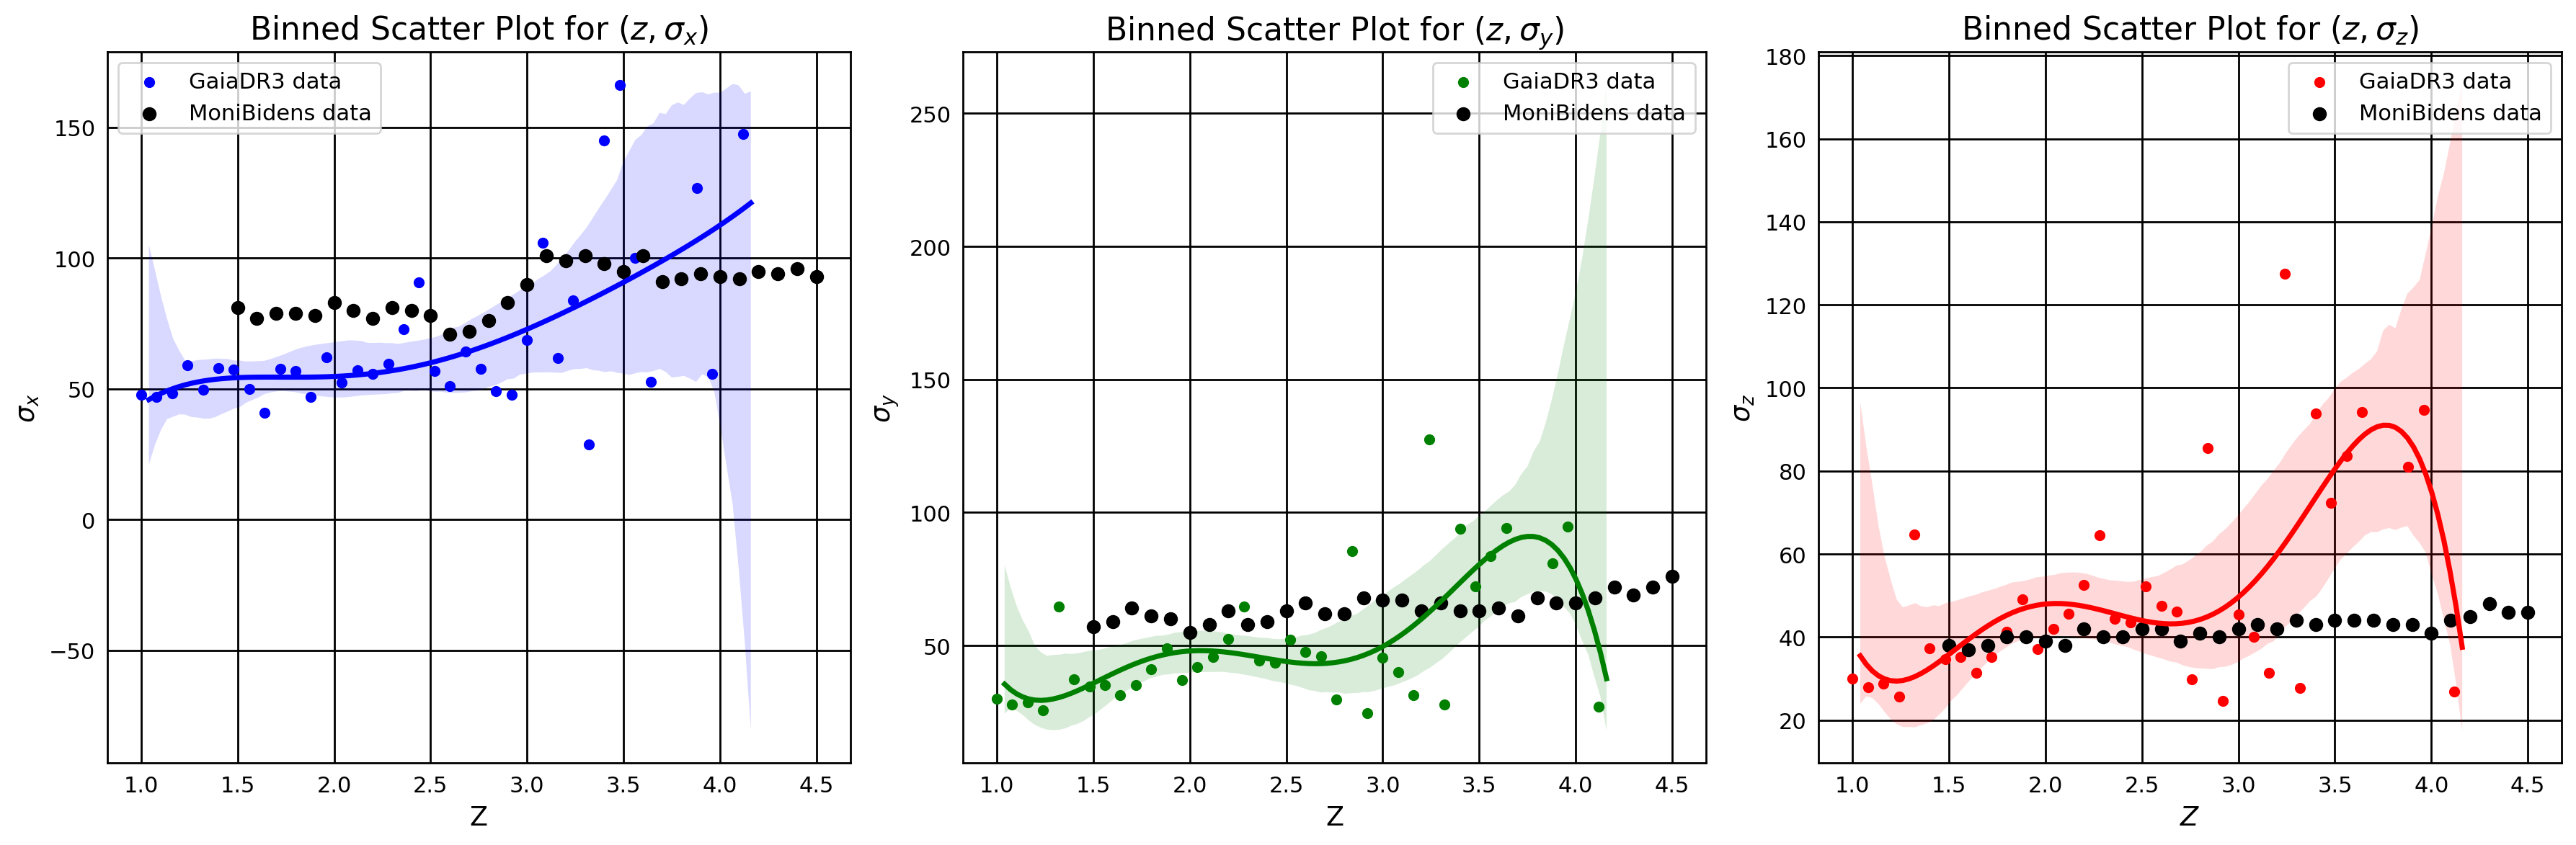

In [623]:
transformed_data = transform_to_galactocentric(ra_array, dec_array, distance_array, pm_ra_cosdec_array, pm_dec_array, radial_velocity_array)

x = transformed_data[3]
y1 = transformed_data[0]
y2 = transformed_data[1]
y3 = transformed_data[2]

# Create DataFrames
data1 = pd.DataFrame({'x': x, 'y': y1})
data2 = pd.DataFrame({'x': x, 'y': y2})
data3 = pd.DataFrame({'x': x, 'y': y3})

# Filter data
filtered_data1 = data1[(data1['x'] >= 1) & (data1['x'] <= 4.5)]
filtered_data2 = data2[(data2['x'] >= 1) & (data2['x'] <= 4.5)]
filtered_data3 = data3[(data3['x'] >= 1) & (data3['x'] <= 4.5)]

# Function to calculate bin dispersion
def calculate_dispersion(data, x_col, y_col, bins):
    data['bin'] = pd.cut(data[x_col], bins=bins)
    dispersion = data.groupby('bin')[y_col].std().reset_index()
    dispersion['bin_center'] = dispersion['bin'].apply(lambda x: x.mid)
    return dispersion

# Calculate dispersion
bins = np.arange(1, 5, 0.08)  # Adjust bin size as needed
dispersion1 = calculate_dispersion(filtered_data1, 'x', 'y', bins)
dispersion2 = calculate_dispersion(filtered_data2, 'x', 'y', bins)
dispersion3 = calculate_dispersion(filtered_data3, 'x', 'y', bins)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot (x, y1) with dispersion
sns.regplot(ax=axes[0], x='bin_center', y='y', data=dispersion1, x_bins=np.arange(1, 5, 0.08), order=5, scatter_kws={'s':20,'color':'blue'}, line_kws={'color':'blue'},label='GaiaDR3 data ')
axes[0].scatter(a,e,color='black',label='MoniBidens data')
#axes[0].errorbar(dispersion1['bin_center'], dispersion1['y'], yerr=dispersion1['y'], fmt='o', color='blue', label='Dispersion')
axes[0].set_xlabel('Z')
axes[0].set_ylabel(r'$\sigma_{x}$')
axes[0].set_title(r'Binned Scatter Plot for $(z, \sigma_{x})$')
axes[0].legend()

# Plot (x, y2) with dispersion
sns.regplot(ax=axes[1], x='bin_center', y='y', data=dispersion2, x_bins=np.arange(1, 5, 0.08), order=5, scatter_kws={'s':20,'color':'green'}, line_kws={'color':'green'},label='GaiaDR3 data ')
axes[1].scatter(a,f,color='black',label='MoniBidens data')
#axes[1].errorbar(dispersion2['bin_center'], dispersion2['y'], yerr=dispersion2['y'], fmt='o', color='green', label='Dispersion')
axes[1].set_xlabel('Z')
axes[1].set_ylabel(r'$\sigma_{y}$')
axes[1].set_title(r'Binned Scatter Plot for $(z, \sigma_{y})$')
axes[1].legend()
# Plot (x, y3) with dispersion
sns.regplot(ax=axes[2], x='bin_center', y='y', data=dispersion2, x_bins=np.arange(1, 5, 0.08), order=5, scatter_kws={'s':20,'color':'red'}, line_kws={'color':'red'},label='GaiaDR3 data ')
axes[2].scatter(a,g,color='black',label='MoniBidens data')
#axes[2].errorbar(dispersion3['bin_center'], dispersion3['y'], yerr=dispersion3['y'], fmt='o', color='red', label='Dispersion')
axes[2].set_xlabel(r'$Z$')
axes[2].set_ylabel(r'$\sigma_{z}$')
axes[2].set_title(r'Binned Scatter Plot for $(z, \sigma_{z})$')
axes[2].legend()
plt.tight_layout()
plt.show()

KeyError: 'bin'

(0.0, 5.0)

<Figure size 1000x600 with 0 Axes>

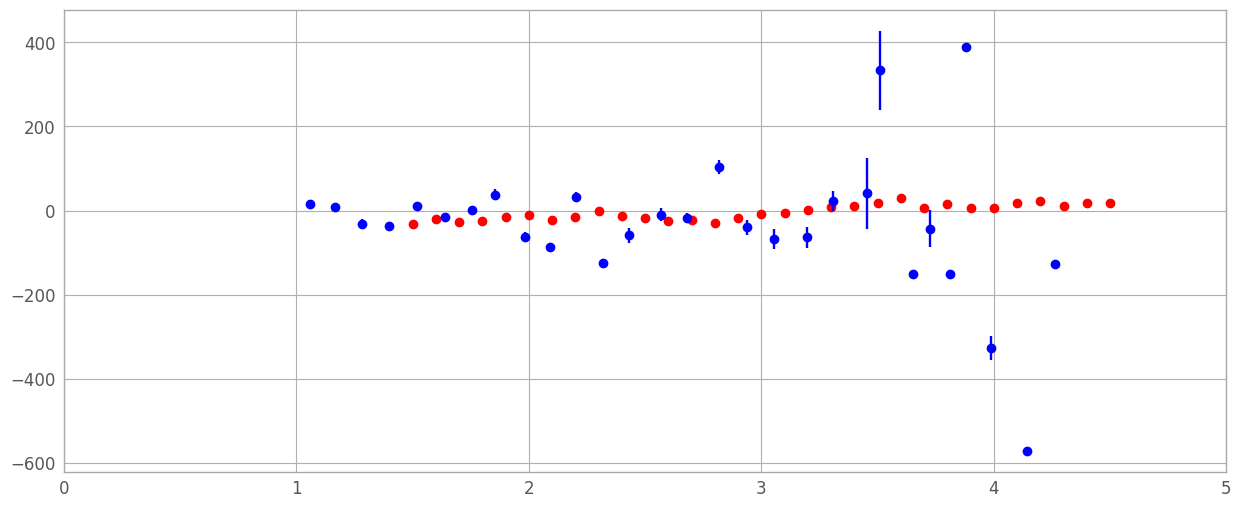

<Figure size 1000x600 with 0 Axes>

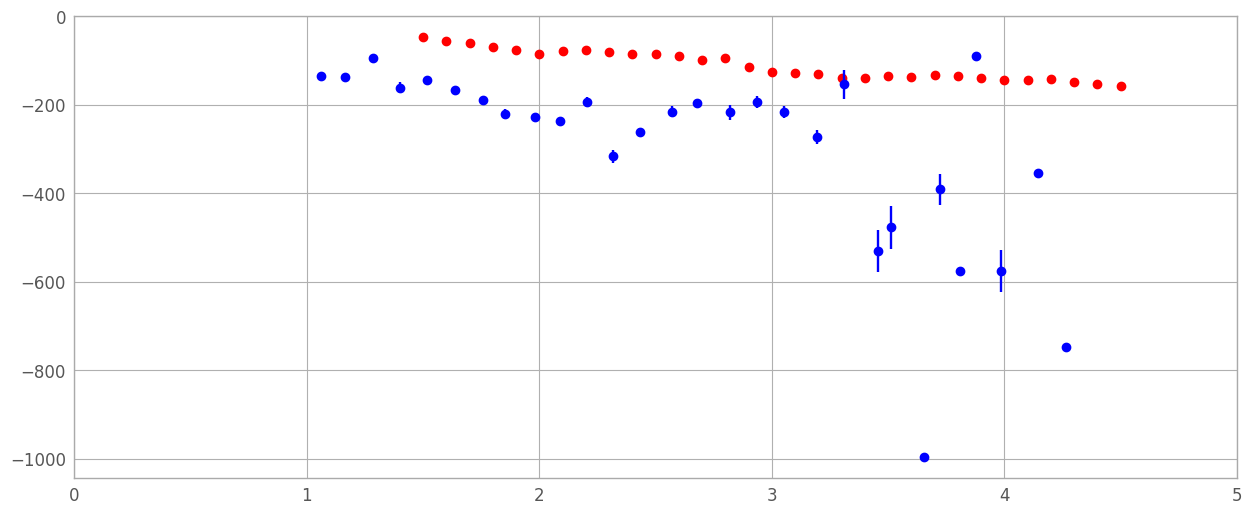

<Figure size 1000x600 with 0 Axes>

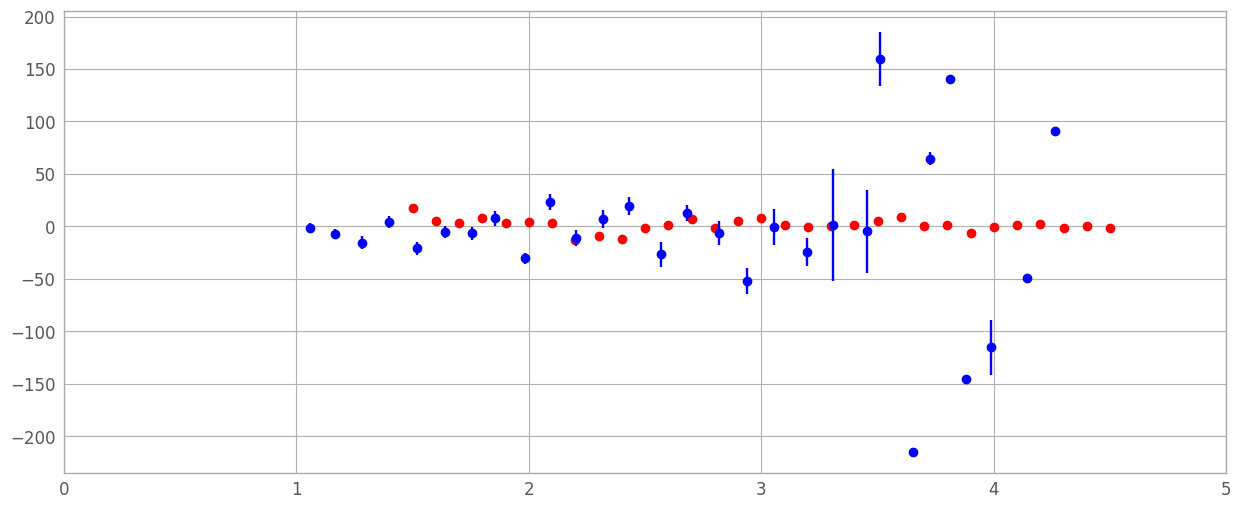

In [80]:
import matplotlib.pyplot as plt
import pandas as pd
#plt.grid(True)
#plt.scatter(transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3],transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[0],s=1,color='r')
#plt.scatter(transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3],transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[1],s=1,color='g')
#plt.scatter(transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3],transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[2],s=1,color='b')

def binned_scatter_plot(x_list, y_list, x_range1=None,x_range2=None,x_range3=None, smooth=True, colors=None, labels=None):
    """
    Create binned scatter plots from multiple unbinned x and y data sets.
    
    Parameters:
    x_list (list of array-like): List of arrays of x data points.
    y_list (list of array-like): List of arrays of y data points.
    n_bins (int): Number of bins to use for binning the data.
    smooth (bool): Whether to plot a smooth line through the binned data points.
    colors (list of str): List of colors for the points and lines in the plot.
    labels (list of str): List of labels for each dataset in the plot legend.
    """
    if colors is None:
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    
    if labels is None:
        labels = [f'Dataset {i+1}' for i in range(len(x_list))]
    
    plt.figure(figsize=(10, 6))
    
    for i, (x, y) in enumerate(zip(x_list, y_list)):
        color = colors[i % len(colors)]
        label = labels[i]





        # Filter data within x_range
        if x_range1:
            mask1 = (x >= x_range1[0]) & (x <= x_range1[1])
            x_filtered1 = x[mask1]
            y_filtered1 = y[mask1]
        else:
            x_filtered1 = x
            y_filtered1 = y
              
        
        # Create a DataFrame from the filtered x and y data
        data1 = pd.DataFrame({'x1': x_filtered1, 'y1': y_filtered1})
        
        
        
        # Bin the data
        data1['bin'] = pd.cut(data1['x1'], bins=nbins1, labels=False)
        
        # Calculate mean and standard error for each bin
        binned_data1 = data1.groupby('bin').agg({
            'x1': 'mean',
            'y1': ['mean', 'sem']
        }).reset_index()
        
        # Flatten the MultiIndex columns
        binned_data1.columns = ['bin', 'x_mean', 'y_mean', 'y_sem']
        
        # Plot the binned scatter plot with error bars
        







        # Filter data within x_range
        if x_range2:
            mask2 = (x >= x_range2[0]) & (x <= x_range2[1])
            x_filtered2 = x[mask2]
            y_filtered2 = y[mask2]
        else:
            x_filtered2 = x
            y_filtered2 = y  
        # Create a DataFrame from the filtered x and y data
        data2 = pd.DataFrame({'x2': x_filtered2, 'y2': y_filtered2})
              
        # Bin the data
        data2['bin'] = pd.cut(data2['x2'], bins=nbins2, labels=False)
        
        # Calculate mean and standard error for each bin
        binned_data2 = data2.groupby('bin').agg({
            'x2': 'mean',
            'y2': ['mean', 'sem']
        }).reset_index()
        
        # Flatten the MultiIndex columns
        binned_data2.columns = ['bin', 'x_mean', 'y_mean', 'y_sem']
        
        # Plot the binned scatter plot with error bars







         # Filter data within x_range
        if x_range3:
            mask3 = (x >= x_range3[0]) & (x <= x_range3[1])
            x_filtered3 = x[mask3]
            y_filtered3 = y[mask3]
        else:
            x_filtered3 = x
            y_filtered3 = y  
        # Create a DataFrame from the filtered x and y data
        data3 = pd.DataFrame({'x3': x_filtered3, 'y3': y_filtered3})
        
        # Bin the data
        data3['bin'] = pd.cut(data3['x3'], bins=nbins3, labels=False)
        
        # Calculate mean and standard error for each bin
        binned_data3 = data3.groupby('bin').agg({
            'x3': 'mean',
            'y3': ['mean', 'sem']
        }).reset_index()
        
        # Flatten the MultiIndex columns
        binned_data3.columns = ['bin', 'x_mean', 'y_mean', 'y_sem']
        
        # Plot the binned scatter plot with error bars









        plt.figure(figsize=(15, 6))
        #plt.scatter(x_list,y_list, color='blue', alpha=0.7,s=1, label='Data Points')
        plt.xlim(-5,5)
        #plt.ylim(-0.55,1)
        
        plt.errorbar(binned_data1['x_mean'], binned_data1['y_mean']*np.sqrt(nbins1), yerr=binned_data1['y_sem'], fmt='o', color=color, label=f'{label} - Binned Data with Error Bars')
        plt.errorbar(binned_data2['x_mean'], binned_data2['y_mean']*np.sqrt(nbins2), yerr=binned_data2['y_sem'], fmt='o', color=color, label=f'{label} - Binned Data with Error Bars')
        plt.errorbar(binned_data3['x_mean'], binned_data3['y_mean']*np.sqrt(nbins3), yerr=binned_data3['y_sem'], fmt='o', color=color, label=f'{label} - Binned Data with Error Bars')

        plt.grid(True)




x_range_1 = (1.0, 2.5)
x_range_2 = (2.5, 3.4)
x_range_3 = (3.4, 4.5)
nbins1=13
nbins2=7
nbins3=13
binned_scatter_plot([transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3]],[transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[0]],x_range_1,x_range_2,x_range_3)
plt.scatter(a,b,color='r')
plt.xlim(0,5)

binned_scatter_plot([transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3]],[transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[1]],x_range_1,x_range_2,x_range_3)
plt.scatter(a,c,color='r')
plt.xlim(0,5)
#plt.ylim(70,180)
binned_scatter_plot([transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3]],[transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[2]],x_range_1,x_range_2,x_range_3)
plt.scatter(a,d,color='r')
plt.xlim(0,5)


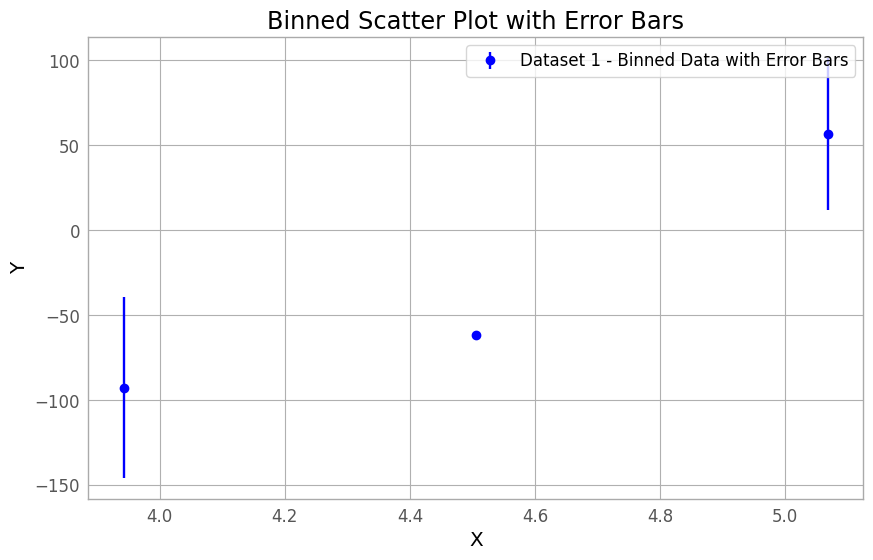

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic


def binned_scatter_plot(x_list, y_list, n_bins_list, smooth=True, colors=None, labels=None):
    """
    Create binned scatter plots from multiple unbinned x and y data sets with different number of bins for each range of x.
    
    Parameters:
    x_list (list of array-like): List of arrays of x data points.
    y_list (list of array-like): List of arrays of y data points.
    n_bins_list (list of int): List of number of bins to use for binning the data for each dataset.
    smooth (bool): Whether to plot a smooth line through the binned data points.
    colors (list of str): List of colors for the points and lines in the plot.
    labels (list of str): List of labels for each dataset in the plot legend.
    """
    if colors is None:
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    
    if labels is None:
        labels = [f'Dataset {i+1}' for i in range(len(x_list))]
    
    plt.figure(figsize=(10, 6))
    
    for i, (x, y, n_bins) in enumerate(zip(x_list, y_list, n_bins_list)):
        color = colors[i % len(colors)]
        label = labels[i]
        
        # Calculate binned statistics
        bin_means, bin_edges, binnumber = binned_statistic(x, y, statistic='mean', bins=n_bins)
        bin_std = binned_statistic(x, y, statistic='std', bins=n_bins)[0]
        
        # Plot binned scatter plot with error bars
        plt.errorbar(bin_edges[:-1], bin_means, yerr=bin_std, fmt='o', color=color, label=f'{label} - Binned Data with Error Bars')
        
        
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Binned Scatter Plot with Error Bars')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
n_bins_list = [10,200]  # Different number of bins for each dataset

binned_scatter_plot([transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3]],[transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[0]],n_bins_list)


# Plot binned scatter plot for each dataset with different number of bins



In [ ]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, Galactocentric
from joblib import Parallel, delayed

# Extract arrays from results
ra_array = np.array(results1['ra'])  # Degrees
dec_array = np.array(results1['dec'])  # Degrees
distance_array = (np.array(results1['parallax']) * u.mas).to(u.kpc, u.parallax()).value  # kpc
pm_ra_cosdec_array = np.array(results1['pmra'])  # mas/yr
pm_dec_array = np.array(results1['pmdec'])  # mas/yr
radial_velocity_array = np.array(results1['radial_velocity'])  # km/s
radial_velocity_error = np.array(results1['radial_velocity_error'])  # km/s
pm_ra_error = np.array(results1['pmra_error'])  # mas/yr
pm_dec_error = np.array(results1['pmdec_error'])  # mas/yr

# Function to transform coordinates
def transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity):
    c = SkyCoord(ra=ra * u.degree, dec=dec * u.degree, distance=distance * u.kpc, 
                 pm_ra_cosdec=pm_ra_cosdec * u.mas / u.yr,
                 pm_dec=pm_dec * u.mas / u.yr, radial_velocity=radial_velocity * u.km / u.s,
                 frame='icrs')
    g = c.transform_to(Galactocentric(galcen_distance=8.2 * u.kpc,  # Default distance to Galactic Center
                                      z_sun=0.020 * u.kpc,  # Default Sun's height above the Galactic plane
                                      galcen_v_sun=[10.1, 5.24, 7.25] * (u.km / u.s)))
    return np.array([g.v_x.value, g.v_y.value, g.v_z.value])

# Function to process each star and compute velocities and uncertainties
def process_star(i, ra_array, dec_array, distance_array, pm_ra_cosdec_array, pm_dec_array, radial_velocity_array, pm_ra_error, pm_dec_error, radial_velocity_error):
    ra = ra_array[i]
    dec = dec_array[i]
    distance = distance_array[i]
    pm_ra_cosdec = pm_ra_cosdec_array[i]
    pm_dec = pm_dec_array[i]
    radial_velocity = radial_velocity_array[i]

    sigma_pm_ra_cosdec = pm_ra_error[i]
    sigma_pm_dec = pm_dec_error[i]
    sigma_radial_velocity = radial_velocity_error[i]

    # Evaluate the function at the nominal values
    v_x_nom, v_y_nom, v_z_nom = transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity)

    # Numerically compute the Jacobian matrix
    epsilon = 1e-5
    jacobian = np.zeros((3, 3))

    # Partial derivatives with respect to radial velocity
    v_eps = transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity + epsilon)
    jacobian[:, 0] = (np.array(v_eps) - np.array([v_x_nom, v_y_nom, v_z_nom])) / epsilon

    # Partial derivatives with respect to proper motion in ra
    v_eps = transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec + epsilon, pm_dec, radial_velocity)
    jacobian[:, 1] = (np.array(v_eps) - np.array([v_x_nom, v_y_nom, v_z_nom])) / epsilon

    # Partial derivatives with respect to proper motion in dec
    v_eps = transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec + epsilon, radial_velocity)
    jacobian[:, 2] = (np.array(v_eps) - np.array([v_x_nom, v_y_nom, v_z_nom])) / epsilon

    # Construct the input covariance matrix
    cov_matrix_input = np.diag([sigma_radial_velocity**2, sigma_pm_ra_cosdec**2, sigma_pm_dec**2])

    # Transform the covariance matrix
    cov_matrix_output = jacobian @ cov_matrix_input @ jacobian.T

    # The propagated uncertainties are the square roots of the diagonal elements
    sigma_v_x, sigma_v_y, sigma_v_z = np.sqrt(np.diag(cov_matrix_output))

    return v_x_nom, v_y_nom, v_z_nom, sigma_v_x, sigma_v_y, sigma_v_z

# Use joblib to parallelize the process_star function
results = Parallel(n_jobs=-1)(delayed(process_star)(
    i, ra_array, dec_array, distance_array, pm_ra_cosdec_array, pm_dec_array, radial_velocity_array,
    pm_ra_error, pm_dec_error, radial_velocity_error) for i in range(len(ra_array)))

# Unpack the results
vx_nominal, vy_nominal, vz_nominal, sigma_vx, sigma_vy, sigma_vz = zip(*results)

# Convert results to arrays for easier handling
vx_nominal = np.array(vx_nominal)
vy_nominal = np.array(vy_nominal)
vz_nominal = np.array(vz_nominal)
sigma_vx = np.array(sigma_vx)
sigma_vy = np.array(sigma_vy)
sigma_vz = np.array(sigma_vz)

# Print the results
#for i in range(len(ra_array)):
#    print(f"Star {i+1}: Galactocentric velocities: v_x = {vx_nominal[i]:.2f} ± {sigma_vx[i]:.2f} km/s, v_y = {vy_nominal[i]:.2f} ± {sigma_vy[i]:.2f} km/s, v_z = {vz_nominal[i]:.2f} ± {sigma_vz[i]:.2f} km/s")


0.5988311518708507

In [ ]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, Galactocentric
from astropy.table import Table

# Example input arrays
ra_array = np.array(results1['ra']) * u.degree
dec_array = np.array(results1['dec']) * u.degree
distance_array = (np.array(results1['parallax']) * u.mas).to(u.kpc, u.parallax())
pm_ra_cosdec_array = np.array(results1['pmra']) * u.mas / u.yr
pm_dec_array = np.array(-results1['pmdec']) * u.mas / u.yr
radial_velocity_array = np.array(results1['radial_velocity']) * u.km / u.s

ra_error=np.array(results1['ra_error']) * u.degree
dec_error=np.array(results1['dec_error']) * u.degree
distance_error=(np.array((distance_array*results1['parallax_error']))/np.array(results1['parallax']) * u.kpc)
radial_velocity_error=np.array(results1['radial_velocity_error']) * u.km / u.s
pm_ra_error=np.array(results1['pmra_error']) * u.mas / u.yr
pm_dec_error=np.array(results1['pmdec_error']) * u.mas / u.yr

# Function to transform coordinates to galactocentric velocities
def transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity):
    c = SkyCoord(ra=ra, dec=dec, distance=distance, pm_ra_cosdec=pm_ra_cosdec,
                 pm_dec=pm_dec, radial_velocity=radial_velocity, frame='icrs')
    g = c.transform_to(Galactocentric(galcen_distance=8.2 * u.kpc,  # Default distance to Galactic Center
                                      z_sun=0.020 * u.kpc,  # Default Sun's height above the Galactic plane
                                      galcen_v_sun=[10.1, 5.24, 7.25] * (u.km / u.s)))
    return np.array([g.v_x.value, g.v_y.value, g.v_z.value]), g

# Function to transform galactocentric velocities to cylindrical velocities
def galactocentric_to_cylindrical(g, vx, vy, vz):
    X = g.x.value
    Y = g.y.value
    Z = g.z.value
    phi = np.arctan2(Y, X)
    theta = (np.pi/2) - np.arctan2(Z, np.sqrt(X**2 + Y**2))
    R = np.sqrt(X**2 + Y**2 + Z**2)

    V_phi = vx * np.sin(phi) - vy * np.cos(phi)
    V_r = ((vx * np.cos(phi) + vy * np.sin(phi)) * np.sin(theta)) + vz * np.cos(theta)
    V_theta = ((vx * np.cos(phi) + vy * np.sin(phi)) * np.cos(theta)) - vz * np.sin(theta)
    
    return np.array([V_phi, V_r, V_theta, Z])

# Arrays to store the results
V_phi_nominal = []
V_r_nominal = []
V_theta_nominal = []
Z_nominal = []
sigma_V_phi = []
sigma_V_r = []
sigma_V_theta = []

# Loop through each set of inputs
for i in range(len(ra_array)):
    ra = ra_array[i]
    dec = dec_array[i]
    distance = distance_array[i]
    pm_ra_cosdec = pm_ra_cosdec_array[i]
    pm_dec = pm_dec_array[i]
    radial_velocity = radial_velocity_array[i]

    sigma_pm_ra_cosdec =sigma_vx[i]
    sigma_pm_dec = sigma_vy[i]
    sigma_radial_velocity = sigma_vz[i]

    # Evaluate the function at the nominal values
    (v_x_nom, v_y_nom, v_z_nom), g = transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity)
    V_nom = galactocentric_to_cylindrical(g, v_x_nom, v_y_nom, v_z_nom)
    V_phi_nom, V_r_nom, V_theta_nom, R_nom = V_nom
    
    # Numerically compute the Jacobian matrix
    epsilon = 1e-5
    jacobian = np.zeros((4, 3))

    # Partial derivatives with respect to v_x
    V_eps = galactocentric_to_cylindrical(g, v_x_nom + epsilon, v_y_nom, v_z_nom)
    jacobian[:, 0] = (V_eps - V_nom) / epsilon

    # Partial derivatives with respect to v_y
    V_eps = galactocentric_to_cylindrical(g, v_x_nom, v_y_nom + epsilon, v_z_nom)
    jacobian[:, 1] = (V_eps - V_nom) / epsilon

    # Partial derivatives with respect to v_z
    V_eps = galactocentric_to_cylindrical(g, v_x_nom, v_y_nom, v_z_nom + epsilon)
    jacobian[:, 2] = (V_eps - V_nom) / epsilon

    # Construct the input covariance matrix
    cov_matrix_input = np.diag([sigma_radial_velocity**2, sigma_pm_ra_cosdec**2, sigma_pm_dec**2])

    # Transform the covariance matrix
    cov_matrix_output = jacobian @ cov_matrix_input @ jacobian.T

    # The propagated uncertainties are the square roots of the diagonal elements
    sigma_V_phi_i, sigma_V_r_i, sigma_V_theta_i, sigma_R_i = np.sqrt(np.diag(cov_matrix_output))

    # Store the results
    V_phi_nominal.append(V_phi_nom)
    V_r_nominal.append(V_r_nom)
    V_theta_nominal.append(V_theta_nom)
    Z_nominal.append(R_nom)
    sigma_V_phi.append(sigma_V_phi_i)
    sigma_V_r.append(sigma_V_r_i)
    sigma_V_theta.append(sigma_V_theta_i)

# Convert results to arrays for easier handling
V_phi_nominal = np.array(V_phi_nominal)
V_r_nominal = np.array(V_r_nominal)
V_theta_nominal = np.array(V_theta_nominal)
Z_nominal = np.array(Z_nominal)
sigma_V_phi = np.array(sigma_V_phi)
sigma_V_r = np.array(sigma_V_r)
sigma_V_theta = np.array(sigma_V_theta)

# Create a table to present the results
table = Table([ V_phi_nominal, sigma_V_phi, V_r_nominal, sigma_V_r, V_theta_nominal, sigma_V_theta, Z_nominal],
              names=( 'V_phi', 'sigma_V_phi', 'V_r', 'sigma_V_r', 'V_theta', 'sigma_V_theta', 'Z'),
              units=( u.km/u.s, u.km/u.s, u.km/u.s, u.km/u.s, u.km/u.s, u.km/u.s, u.kpc))

# Print the table
table
#filtered_table = table[table['Z'] > -100 * u.kpc]
#filtered_table


<Table length=49153>
       V_phi            sigma_V_phi     ...          Z          
       km / s              km / s       ...         kpc         
      float64             float64       ...       float64       
------------------- ------------------- ... --------------------
 -26.02107763568157  0.7652792389712844 ...  -0.3080450731976612
 -0.313793732678487  1.0611463696335128 ...   0.4846498281079229
-132.53273420604728 0.11709374650184201 ... -0.21646823483852448
-25.922490729078884  0.3195930422509463 ...   -0.346828654032617
 19.525638016124077  0.9280197954256196 ...    0.591559943079431
                nan                 nan ...  -1.7226812534184475
  -42.3305102661179  0.6467338703840384 ...  0.24379606842125498
-35.241706773436704 0.17225219341127657 ...  0.09406664348807615
                nan                 nan ...  -0.4317144269280141
                ...                 ... ...                  ...
  29.51231566419684 0.18832800415252557 ...  0.40601165442570797
  20.79270382391744 0.24658789991476204 ...  0.34174352665866914
                nan                 nan ...   0.5094409473729445
                nan                 nan ...   0.5631067468790114
 24.711498489373966  0.1103004354673916 ...   0.6353437842110027
                nan                 nan ...   0.6423856797026987
                nan                 nan ...   0.6982906579576587
                nan                 nan ...   0.4412784583676201
                nan                 nan ...   0.5988311518708507

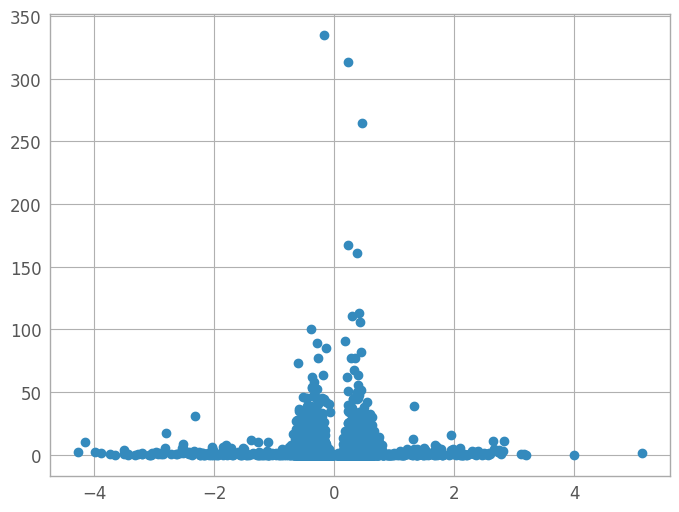

In [ ]:
plt.scatter((table['Z']),(sigma_vy**2))

Text(0.5, 1.0, 'Distribution of ${V_p}$ vs Z')

<Figure size 1000x600 with 0 Axes>

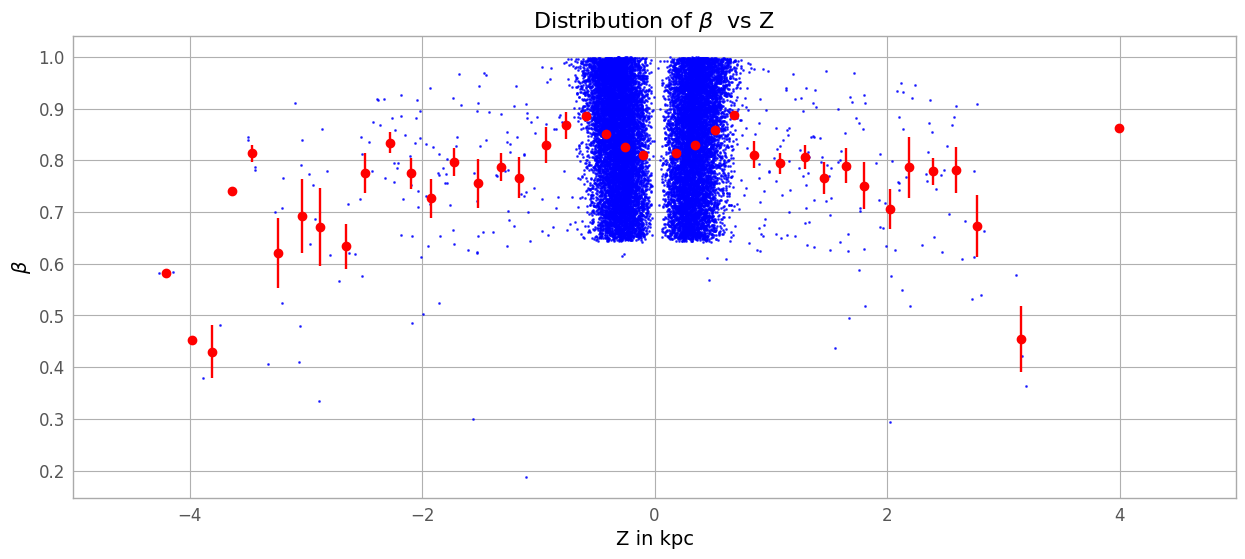

<Figure size 1000x600 with 0 Axes>

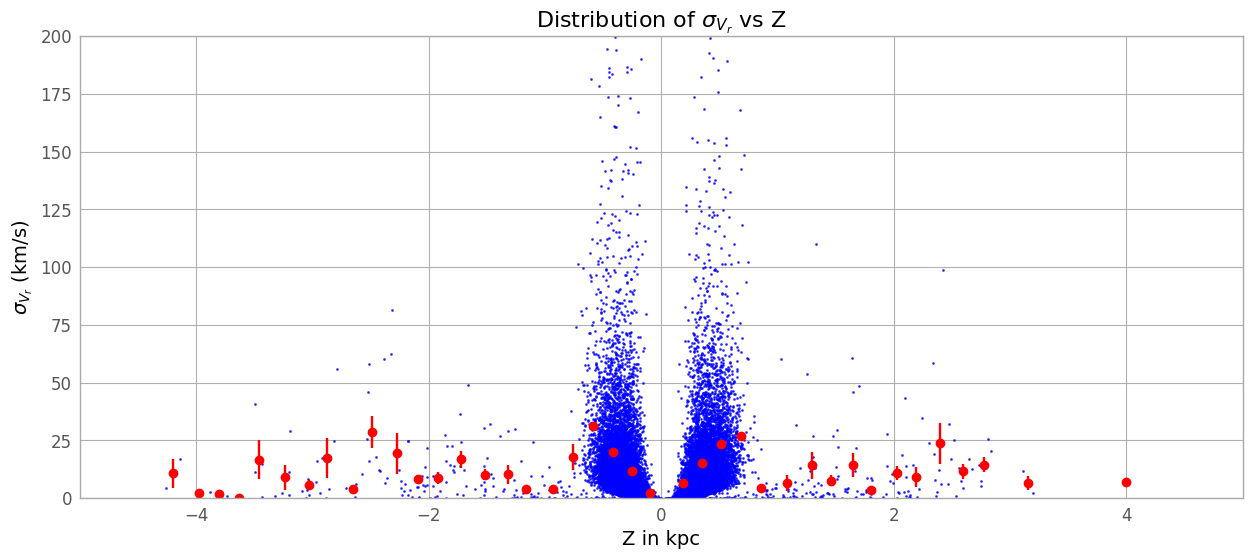

<Figure size 1000x600 with 0 Axes>

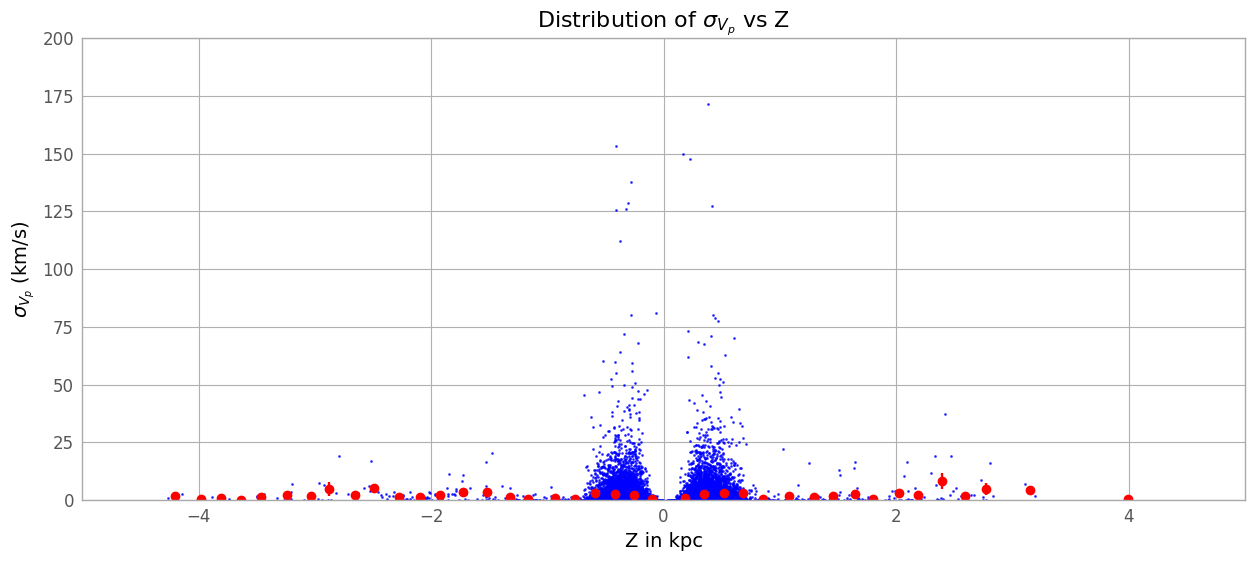

<Figure size 1000x600 with 0 Axes>

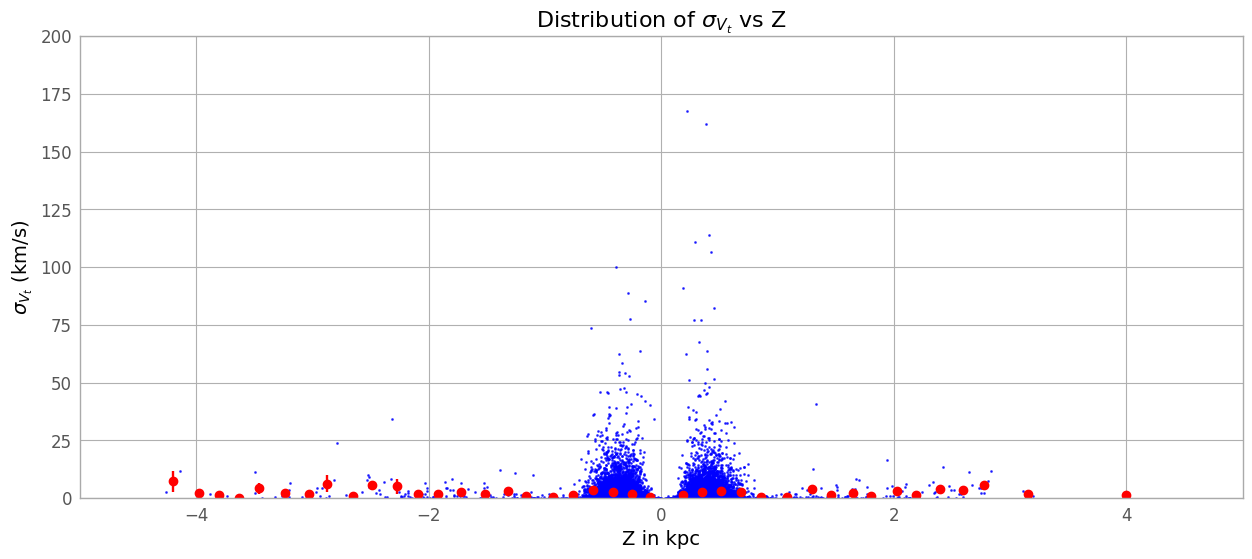

<Figure size 1000x600 with 0 Axes>

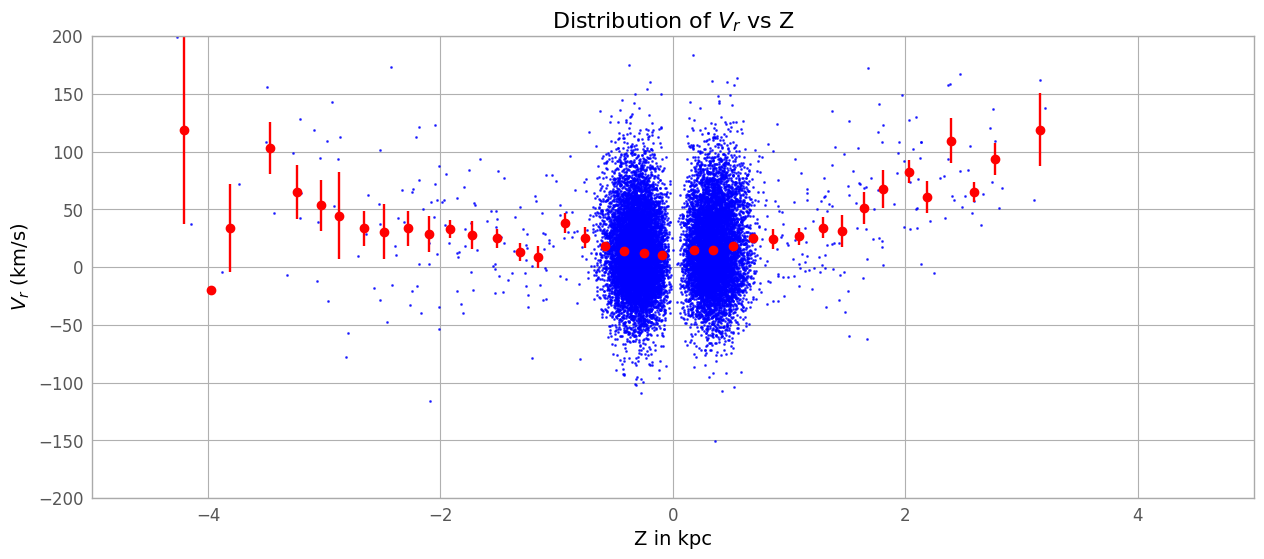

<Figure size 1000x600 with 0 Axes>

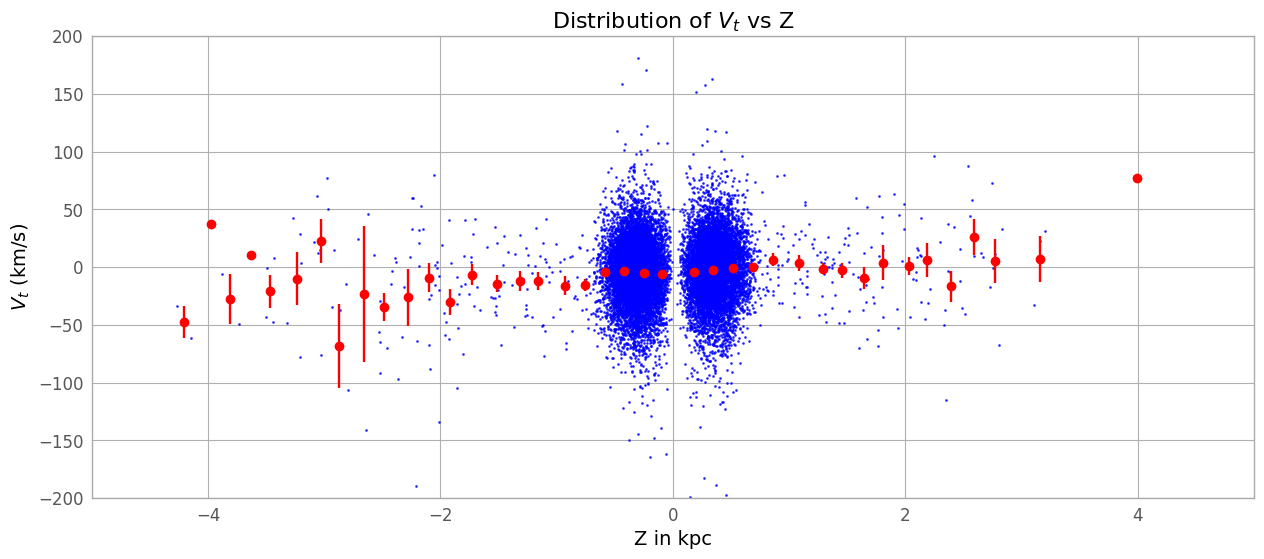

<Figure size 1000x600 with 0 Axes>

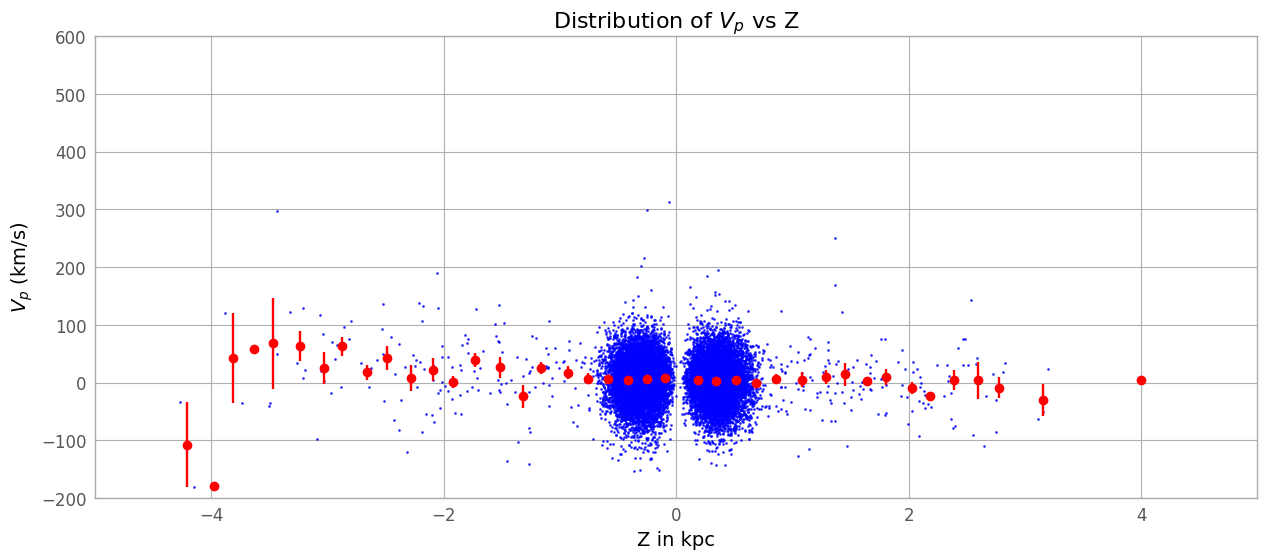

In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
beeta=1-(((sigma_V_phi**2+sigma_V_theta**2)/2)/(sigma_V_r**2))

def binned_scatter_plot(x_list, y_list, n_bins, smooth=True, colors=None, labels=None):
    """
    Create binned scatter plots from multiple unbinned x and y data sets.
    
    Parameters:
    x_list (list of array-like): List of arrays of x data points.
    y_list (list of array-like): List of arrays of y data points.
    n_bins (int): Number of bins to use for binning the data.
    smooth (bool): Whether to plot a smooth line through the binned data points.
    colors (list of str): List of colors for the points and lines in the plot.
    labels (list of str): List of labels for each dataset in the plot legend.
    """
    if colors is None:
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    
    if labels is None:
        labels = [f'Dataset {i+1}' for i in range(len(x_list))]
    
    plt.figure(figsize=(10, 6))
    
    for i, (x, y) in enumerate(zip(x_list, y_list)):
        color = colors[i % len(colors)]
        label = labels[i]
        
        # Create a DataFrame from the x and y data
        data = pd.DataFrame({'x': x, 'y': y})
        
        # Bin the data
        data['bin'] = pd.cut(data['x'], bins=n_bins, labels=False)
        
        # Calculate mean and standard error for each bin
        binned_data = data.groupby('bin').agg({
            'x': 'mean',
            'y': ['mean', 'sem']
        }).reset_index()
        
        # Flatten the MultiIndex columns
        binned_data.columns = ['bin', 'x_mean', 'y_mean', 'y_sem']
        
        # Plot the binned scatter plot with error bars
        
        plt.figure(figsize=(15, 6))
        plt.scatter(x_list,y_list, color='blue', alpha=0.7,s=1, label='Data Points')
        plt.xlim(-5,5)
        #plt.ylim(-0.55,1)
        
        plt.errorbar(binned_data['x_mean'], binned_data['y_mean'], yerr=binned_data['y_sem'], fmt='o', color=color, label=f'{label} - Binned Data with Error Bars')

        plt.grid(True)
        if smooth:
            # Sort the binned data to ensure the smooth line is plotted correctly
            binned_data = binned_data.sort_values(by='x_mean')
            
            
            
            # Plot smooth regression line
           # plt.plot(x_smooth, y_smooth, color=color, linestyle='-', linewidth=2, alpha=0.8, label=f'{label} - Smooth Regression Line')
     
binned_scatter_plot([Z_nominal], [beeta], n_bins=50, smooth=True, colors=['r'])    
plt.ylabel(r'$\beta$', fontsize=14)
plt.xlabel('Z in kpc', fontsize=14)
plt.title(r'Distribution of $\beta$  vs Z ', fontsize=16) 

binned_scatter_plot([Z_nominal],[sigma_V_r**2], n_bins=50, smooth=True, colors=['r'])   
plt.ylabel(r'$\sigma_{V_r}$ (km/s)', fontsize=14)
plt.xlabel('Z in kpc', fontsize=14)
plt.ylim(0,200)
plt.title('Distribution of $\sigma_{V_r}$ vs Z', fontsize=16)   

binned_scatter_plot([Z_nominal],[sigma_V_phi**2], n_bins=50, smooth=True, colors=['r'])   
plt.ylabel(r'$\sigma_{V_p}$ (km/s)', fontsize=14)
plt.xlabel('Z in kpc', fontsize=14)
plt.ylim(0,200)
plt.title('Distribution of $\sigma_{V_p}$ vs Z', fontsize=16)  

binned_scatter_plot([Z_nominal],[sigma_V_theta**2], n_bins=50, smooth=True, colors=['r'])   
plt.ylabel(r'$\sigma_{V_t}$ (km/s)', fontsize=14)
plt.xlabel('Z in kpc', fontsize=14)
plt.ylim(0,200)
plt.title('Distribution of $\sigma_{V_t}$ vs Z', fontsize=16)  


binned_scatter_plot([Z_nominal],[V_r_nominal], n_bins=50, smooth=True, colors=['r'])   
plt.ylabel(r'${V_r}$ (km/s)', fontsize=14)
plt.xlabel('Z in kpc', fontsize=14)
plt.ylim(-200,200)
plt.title('Distribution of ${V_r}$ vs Z', fontsize=16)  


binned_scatter_plot([Z_nominal],[V_theta_nominal], n_bins=50, smooth=True, colors=['r'])   
plt.ylabel(r'${V_t}$ (km/s)', fontsize=14)
plt.xlabel('Z in kpc', fontsize=14)
plt.ylim(-200,200)
plt.title('Distribution of ${V_t}$ vs Z', fontsize=16)  

binned_scatter_plot([Z_nominal],[V_phi_nominal], n_bins=50, smooth=True, colors=['r'])   
plt.ylabel(r'${V_p}$ (km/s)', fontsize=14)
plt.xlabel('Z in kpc', fontsize=14)
plt.ylim(-200,600)
plt.title('Distribution of ${V_p}$ vs Z', fontsize=16)  

# For selection via age >7GYr

In [ ]:
from astroquery.gaia import Gaia

# Define the ADQL query
query = """
SELECT
TOP 10000
    gs.source_id,
    gs.ra,gs.ra_error,gs.dec_error,
    gs.dec,
    gs.pmra,
    gs.pmdec,
    gs.radial_velocity,
    gs.parallax,gs.parallax_error,
    gs.phot_g_mean_mag,
    gs.bp_rp,
    gs.bp_g,
    gs.g_rp,
    ap.age_flame,
    ap.age_flame_lower,
    ap.age_flame_upper,radial_velocity_error,pmra_error,pmdec_error,l,b
FROM gaiadr3.gaia_source AS gs
JOIN gaiadr3.astrophysical_parameters AS ap
ON gs.source_id = ap.source_id
WHERE gs.parallax<1
  AND gs.radial_velocity IS NOT NULL
  AND gs.pmra IS NOT NULL
  AND gs.pmdec IS NOT NULL
  AND gs.bp_rp IS NOT NULL
  AND ap.age_flame IS NOT NULL
  AND ap.age_flame > 7
  AND ABS(gs.b) > 30


"""


# Execute the query
job = Gaia.launch_job(query)
results1 = job.get_results()
results1


<Table length=10000>
     SOURCE_ID              ra         ...          b         
                           deg         ...         deg        
       int64             float64       ...       float64      
------------------- ------------------ ... -------------------
6504533944646913920  338.8203972270539 ...  -51.56518539183001
1126918677381586816 158.58515742595773 ...   38.37187687166613
4636720768616825472 27.470392185059698 ...  -40.12158656677583
 904738095014124544 126.25268838960851 ...   33.68988208059076
6798889528278771712 311.57123720127726 ...  -36.23469001486079
3820734122621033856 144.79187291325013 ...   32.83169315337443
2773608245315951872  358.0595291517819 ...  -43.03266228559127
6834910800512902912 322.11096530959855 ... -42.251045448576946
1166049334141650304  234.5947106549037 ...  47.491826192124186
                ...                ... ...                 ...
3243442276966684544  56.84779797741288 ...  -44.03606262698889
1182175768106291072 225.22518407598477 ...   57.22368634260339
1372414094578523776  240.3079477217896 ...  49.027679979436364
 921698371110370048  123.0328377490028 ...   32.11855344242624
2439013456683775104  353.5529849302931 ... -63.914490650373445
6294025812078256128 208.45265999742952 ...   42.42562366466877
2360425382052526720  5.893415655577841 ...  -82.09317455389635
6292782470585521664 203.60521041815883 ...   41.90673378020899
4453227980343261184  242.7669967950352 ...   39.73289653268936

In [ ]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, Galactocentric
if any(-35 <= value <= 0 for value in np.array(results1['b'])):
    print("At least one value in the list is within the range.")
else:
    print("No value in the list is within the range.")

min(results1['parallax']),min(results1['age_flame']+results1['age_flame_lower']),max(results1['age_flame']+results1['age_flame_upper'])


At least one value in the list is within the range.


(-0.021261464073589614, 7.755798, 20.369816)

In [ ]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, Galactocentric
from joblib import Parallel, delayed

# Extract arrays from results
ra_array = np.array(results1['ra']) * u.degree
dec_array = np.array(results1['dec']) * u.degree
distance_array = (np.array(results1['parallax']) * u.mas).to(u.kpc, u.parallax())
pm_ra_cosdec_array = np.array(results1['pmra']) * u.mas / u.yr
pm_dec_array = np.array(results1['pmdec']) * u.mas / u.yr
radial_velocity_array = np.array(results1['radial_velocity']) * u.km / u.s
radial_velocity_error = np.array(results1['radial_velocity_error']) * u.km / u.s
pm_ra_error = np.array(results1['pmra_error']) * u.mas / u.yr
pm_dec_error = np.array(results1['pmdec_error']) * u.mas / u.yr

# Function to transform coordinates
def transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity):
    c = SkyCoord(ra=ra, dec=dec, distance=distance, pm_ra_cosdec=pm_ra_cosdec,
                 pm_dec=pm_dec, radial_velocity=radial_velocity, frame='icrs')
    g = c.transform_to(Galactocentric())
    return np.array([g.v_x.value, g.v_y.value, g.v_z.value])

# Function to process each star and compute velocities and uncertainties
def process_star(i):
    ra = ra_array[i]
    dec = dec_array[i]
    distance = distance_array[i]
    pm_ra_cosdec = pm_ra_cosdec_array[i]
    pm_dec = pm_dec_array[i]
    radial_velocity = radial_velocity_array[i]

    sigma_pm_ra_cosdec = pm_ra_error[i]
    sigma_pm_dec = pm_dec_error[i]
    sigma_radial_velocity = radial_velocity_error[i]

    # Evaluate the function at the nominal values
    v_x_nom, v_y_nom, v_z_nom = transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity)

    # Numerically compute the Jacobian matrix
    epsilon = 1e-5
    jacobian = np.zeros((3, 3))

    # Partial derivatives with respect to radial velocity
    v_eps = transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity + epsilon * u.km / u.s)
    jacobian[:, 0] = (np.array(v_eps) - np.array([v_x_nom, v_y_nom, v_z_nom])) / epsilon

    # Partial derivatives with respect to proper motion in ra
    v_eps = transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec + epsilon * u.mas / u.yr, pm_dec, radial_velocity)
    jacobian[:, 1] = (np.array(v_eps) - np.array([v_x_nom, v_y_nom, v_z_nom])) / epsilon

    # Partial derivatives with respect to proper motion in dec
    v_eps = transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec + epsilon * u.mas / u.yr, radial_velocity)
    jacobian[:, 2] = (np.array(v_eps) - np.array([v_x_nom, v_y_nom, v_z_nom])) / epsilon

    # Construct the input covariance matrix
    cov_matrix_input = np.diag([sigma_radial_velocity.value**2, sigma_pm_ra_cosdec.value**2, sigma_pm_dec.value**2])

    # Transform the covariance matrix
    cov_matrix_output = jacobian @ cov_matrix_input @ jacobian.T

    # The propagated uncertainties are the square roots of the diagonal elements
    sigma_v_x, sigma_v_y, sigma_v_z = np.sqrt(np.diag(cov_matrix_output))

    return v_x_nom, v_y_nom, v_z_nom, sigma_v_x, sigma_v_y, sigma_v_z

# Use joblib to parallelize the process_star function
results = Parallel(n_jobs=-1)(delayed(process_star)(i) for i in range(len(ra_array)))

# Unpack the results
vx_nominal, vy_nominal, vz_nominal, sigma_vx, sigma_vy, sigma_vz = zip(*results)

# Convert results to arrays for easier handling
vx_nominal = np.array(vx_nominal)
vy_nominal = np.array(vy_nominal)
vz_nominal = np.array(vz_nominal)
sigma_vx = np.array(sigma_vx)
sigma_vy = np.array(sigma_vy)
sigma_vz = np.array(sigma_vz)

# Print the results
#for i in range(len(ra_array)):
#    print(f"Star {i+1}: Galactocentric velocities: v_x = {vx_nominal[i]:.2f} ± {sigma_vx[i]:.2f} km/s, v_y = {vy_nominal[i]:.2f} ± {sigma_vy[i]:.2f} km/s, v_z = {vz_nominal[i]:.2f} ± {sigma_vz[i]:.2f} km/s")


In [ ]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, Galactocentric
from astropy.table import Table

# Example input arrays
ra_array = np.array(results1['ra']) * u.degree
dec_array = np.array(results1['dec']) * u.degree
distance_array = (np.array(results1['parallax']) * u.mas).to(u.kpc, u.parallax())
pm_ra_cosdec_array = np.array(results1['pmra']) * u.mas / u.yr
pm_dec_array = np.array(-results1['pmdec']) * u.mas / u.yr
radial_velocity_array = np.array(results1['radial_velocity']) * u.km / u.s

ra_error=np.array(results1['ra_error']) * u.degree
dec_error=np.array(results1['dec_error']) * u.degree
distance_error=(np.array((distance_array*results1['parallax_error']))/np.array(results1['parallax']) * u.kpc)
radial_velocity_error=np.array(results1['radial_velocity_error']) * u.km / u.s
pm_ra_error=np.array(results1['pmra_error']) * u.mas / u.yr
pm_dec_error=np.array(results1['pmdec_error']) * u.mas / u.yr

# Function to transform coordinates to galactocentric velocities
def transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity):
    c = SkyCoord(ra=ra, dec=dec, distance=distance, pm_ra_cosdec=pm_ra_cosdec,
                 pm_dec=pm_dec, radial_velocity=radial_velocity, frame='icrs')
    g = c.transform_to(Galactocentric())
    return np.array([g.v_x.value, g.v_y.value, g.v_z.value]), g

# Function to transform galactocentric velocities to cylindrical velocities
def galactocentric_to_cylindrical(g, vx, vy, vz):
    X = g.x.value
    Y = g.y.value
    Z = g.z.value
    phi = np.arctan2(Y, X)
    theta = (np.pi/2) - np.arctan2(Z, np.sqrt(X**2 + Y**2))
    R = np.sqrt(X**2 + Y**2 + Z**2)

    V_phi = vx * np.sin(phi) - vy * np.cos(phi)
    V_r = ((vx * np.cos(phi) + vy * np.sin(phi)) * np.sin(theta)) + vz * np.cos(theta)
    V_theta = ((vx * np.cos(phi) + vy * np.sin(phi)) * np.cos(theta)) - vz * np.sin(theta)
    
    return np.array([V_phi, V_r, V_theta, Z])

# Arrays to store the results
V_phi_nominal = []
V_r_nominal = []
V_theta_nominal = []
Z_nominal = []
sigma_V_phi = []
sigma_V_r = []
sigma_V_theta = []

# Loop through each set of inputs
for i in range(len(ra_array)):
    ra = ra_array[i]
    dec = dec_array[i]
    distance = distance_array[i]
    pm_ra_cosdec = pm_ra_cosdec_array[i]
    pm_dec = pm_dec_array[i]
    radial_velocity = radial_velocity_array[i]

    sigma_pm_ra_cosdec =sigma_vx[i]
    sigma_pm_dec = sigma_vy[i]
    sigma_radial_velocity = sigma_vz[i]

    # Evaluate the function at the nominal values
    (v_x_nom, v_y_nom, v_z_nom), g = transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity)
    V_nom = galactocentric_to_cylindrical(g, v_x_nom, v_y_nom, v_z_nom)
    V_phi_nom, V_r_nom, V_theta_nom, R_nom = V_nom
    
    # Numerically compute the Jacobian matrix
    epsilon = 1e-5
    jacobian = np.zeros((4, 3))

    # Partial derivatives with respect to v_x
    V_eps = galactocentric_to_cylindrical(g, v_x_nom + epsilon, v_y_nom, v_z_nom)
    jacobian[:, 0] = (V_eps - V_nom) / epsilon

    # Partial derivatives with respect to v_y
    V_eps = galactocentric_to_cylindrical(g, v_x_nom, v_y_nom + epsilon, v_z_nom)
    jacobian[:, 1] = (V_eps - V_nom) / epsilon

    # Partial derivatives with respect to v_z
    V_eps = galactocentric_to_cylindrical(g, v_x_nom, v_y_nom, v_z_nom + epsilon)
    jacobian[:, 2] = (V_eps - V_nom) / epsilon

    # Construct the input covariance matrix
    cov_matrix_input = np.diag([sigma_radial_velocity**2, sigma_pm_ra_cosdec**2, sigma_pm_dec**2])

    # Transform the covariance matrix
    cov_matrix_output = jacobian @ cov_matrix_input @ jacobian.T

    # The propagated uncertainties are the square roots of the diagonal elements
    sigma_V_phi_i, sigma_V_r_i, sigma_V_theta_i, sigma_R_i = np.sqrt(np.diag(cov_matrix_output))

    # Store the results
    V_phi_nominal.append(V_phi_nom)
    V_r_nominal.append(V_r_nom)
    V_theta_nominal.append(V_theta_nom)
    Z_nominal.append(R_nom)
    sigma_V_phi.append(sigma_V_phi_i)
    sigma_V_r.append(sigma_V_r_i)
    sigma_V_theta.append(sigma_V_theta_i)

# Convert results to arrays for easier handling
V_phi_nominal = np.array(V_phi_nominal)
V_r_nominal = np.array(V_r_nominal)
V_theta_nominal = np.array(V_theta_nominal)
Z_nominal = np.array(Z_nominal)
sigma_V_phi = np.array(sigma_V_phi)
sigma_V_r = np.array(sigma_V_r)
sigma_V_theta = np.array(sigma_V_theta)

# Create a table to present the results
table = Table([ V_phi_nominal, sigma_V_phi, V_r_nominal, sigma_V_r, V_theta_nominal, sigma_V_theta, Z_nominal],
              names=( 'V_phi', 'sigma_V_phi', 'V_r', 'sigma_V_r', 'V_theta', 'sigma_V_theta', 'Z'),
              units=( u.km/u.s, u.km/u.s, u.km/u.s, u.km/u.s, u.km/u.s, u.km/u.s, u.kpc))

# Print the table
table
#filtered_table = table[table['Z'] > -100 * u.kpc]
#filtered_table


<Table length=10000>
      V_phi           sigma_V_phi     ...          Z         
      km / s             km / s       ...         kpc        
     float64            float64       ...       float64      
------------------ ------------------ ... -------------------
218.75089846713735 2.1541755682833688 ... -1.4339640483509035
 277.0134612024494  6.991763598909449 ...  1.0918844873347735
 206.5419123072534 0.8927846792206164 ... -0.6822752072503243
 283.3926260234657  6.676394858024972 ...  0.8707927308554531
 253.7158166029966 12.107573930961737 ... -0.6413641381164087
226.15040871781179 2.6654389469897755 ...  0.6023738611358921
183.56881262299933  0.625234741984295 ... -0.9449365632685703
249.13115156038444 1.0134322093559427 ... -0.7095347233265111
197.14329332197082 1.3042407888192546 ...  0.9289935124279932
               ...                ... ...                 ...
248.30215500924598  3.980334829122822 ...  -1.527892182786531
191.02451536890757  4.078517603884719 ...  1.3570747151206861
 288.6499818643261 1.8950071308694472 ...  1.1640872464602676
302.84859797168247 3.8671869877816727 ...  0.9228373724143139
337.18623900368044 0.6187122853084812 ... -0.9362499961053193
169.55323660252557  5.177758349691474 ...   0.901671556817084
 279.7591852173003 0.3472075978194044 ... -1.1028747548736766
 252.2534903356663 10.625765165420967 ...   1.295369188545951
207.71991263108447  7.657849134893883 ...    1.04164841808143

In [ ]:
max(table['Z'])

12.43121458838569

Text(0.5, 1.0, 'Distribution of ${V_p}$ vs Z')

<Figure size 1000x600 with 0 Axes>

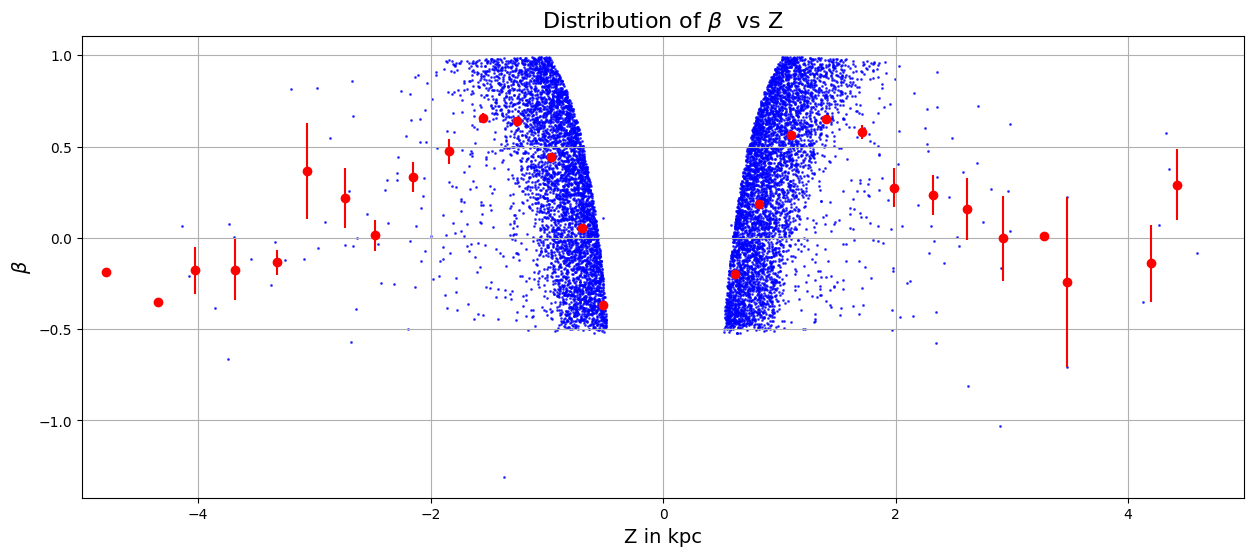

<Figure size 1000x600 with 0 Axes>

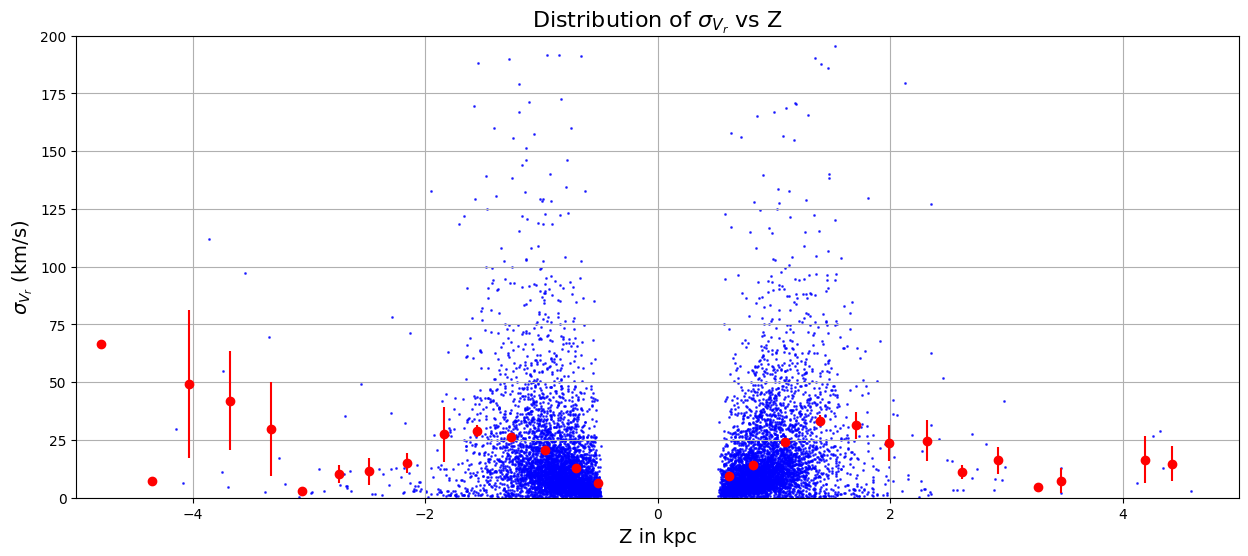

<Figure size 1000x600 with 0 Axes>

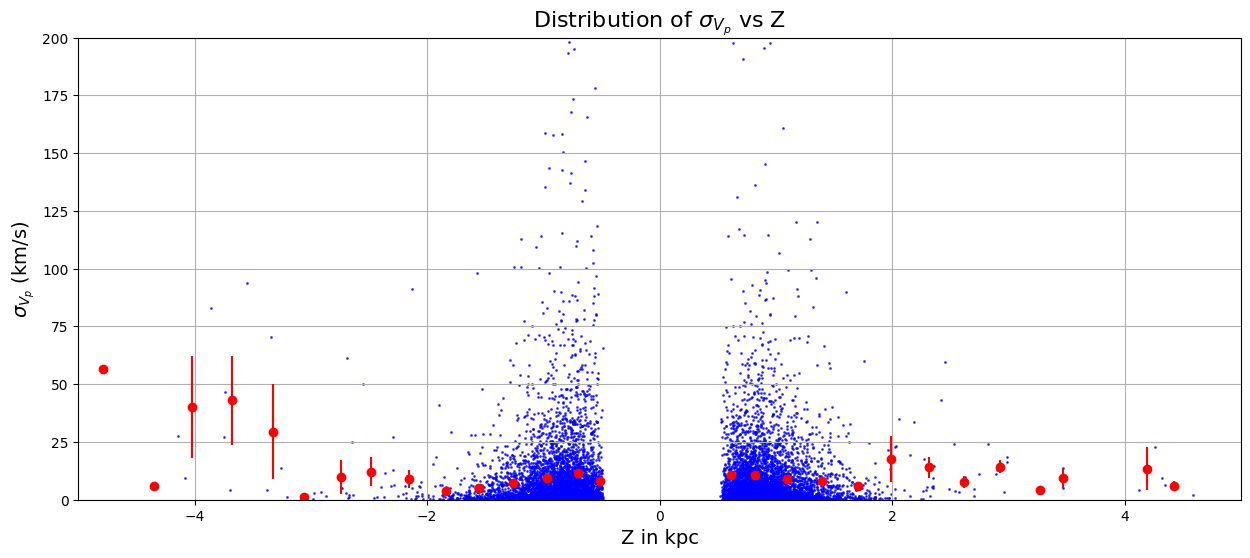

<Figure size 1000x600 with 0 Axes>

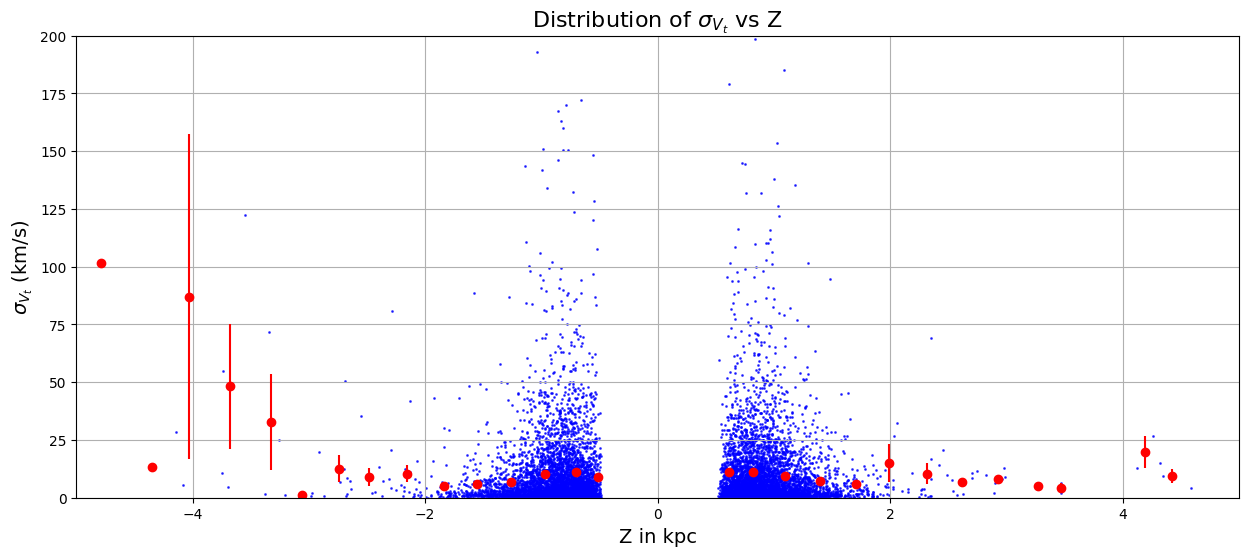

<Figure size 1000x600 with 0 Axes>

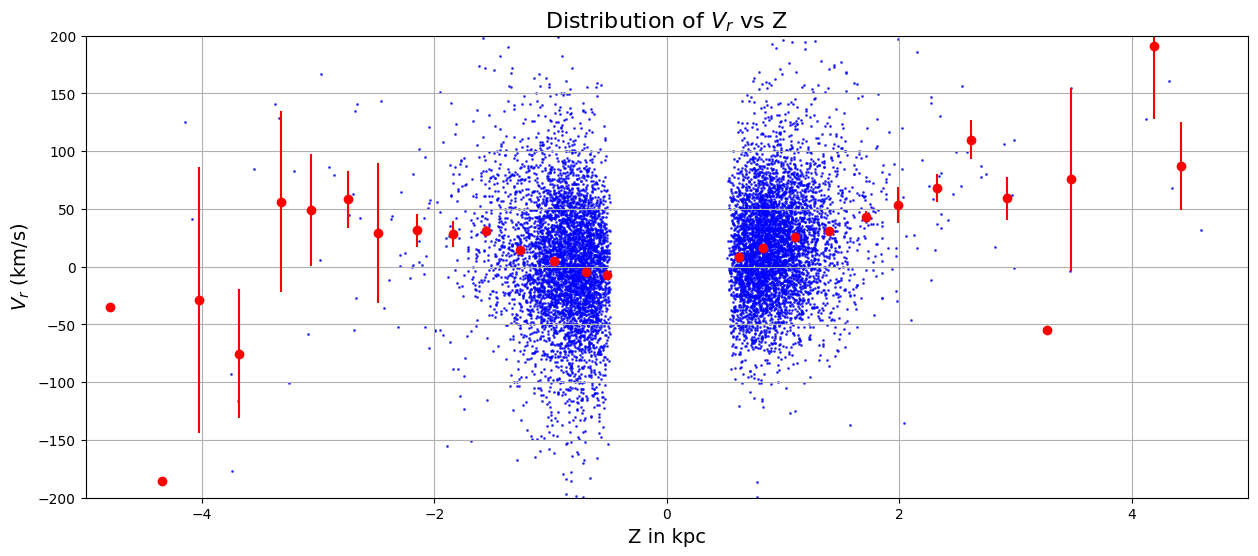

<Figure size 1000x600 with 0 Axes>

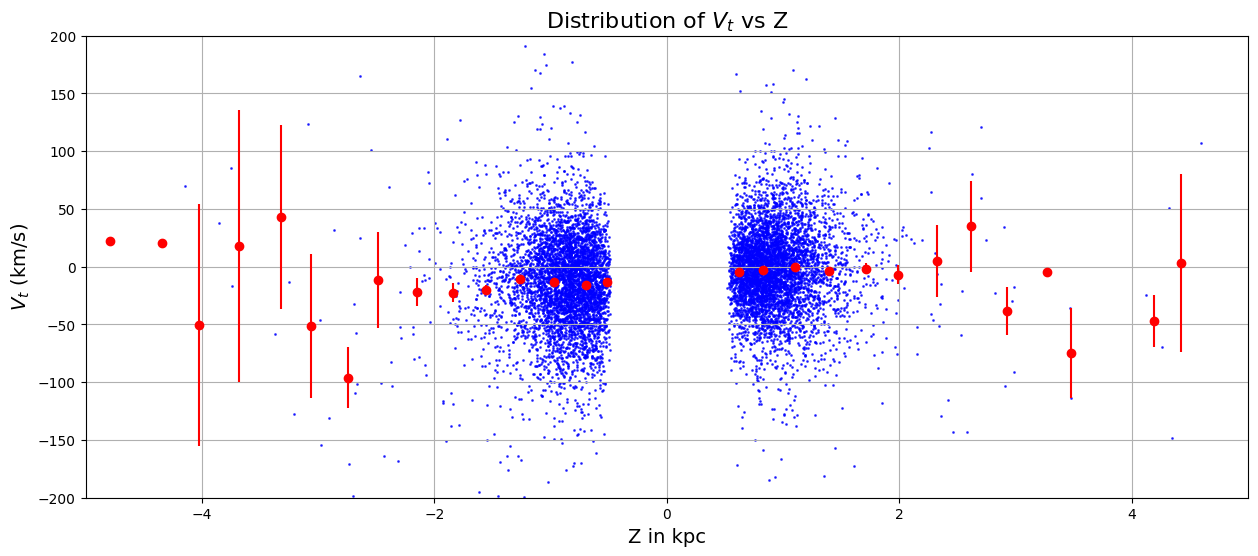

<Figure size 1000x600 with 0 Axes>

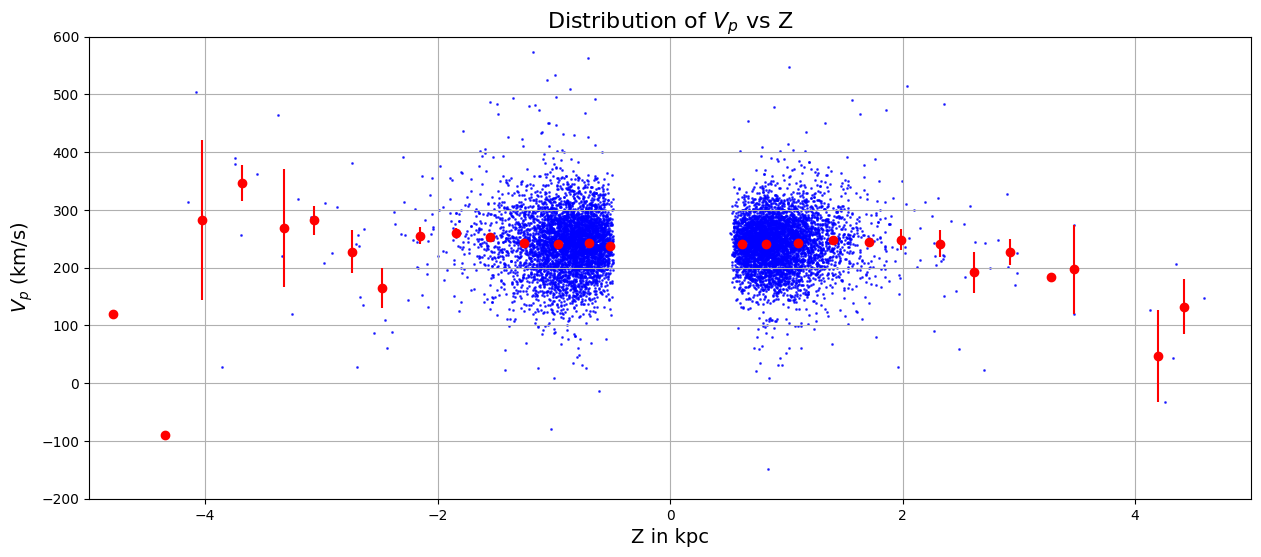

In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
beeta=1-(((sigma_V_phi**2+sigma_V_theta**2)/2)/(sigma_V_r**2))

def binned_scatter_plot(x_list, y_list, n_bins, smooth=True, colors=None, labels=None):
    """
    Create binned scatter plots from multiple unbinned x and y data sets.
    
    Parameters:
    x_list (list of array-like): List of arrays of x data points.
    y_list (list of array-like): List of arrays of y data points.
    n_bins (int): Number of bins to use for binning the data.
    smooth (bool): Whether to plot a smooth line through the binned data points.
    colors (list of str): List of colors for the points and lines in the plot.
    labels (list of str): List of labels for each dataset in the plot legend.
    """
    if colors is None:
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    
    if labels is None:
        labels = [f'Dataset {i+1}' for i in range(len(x_list))]
    
    plt.figure(figsize=(10, 6))
    
    for i, (x, y) in enumerate(zip(x_list, y_list)):
        color = colors[i % len(colors)]
        label = labels[i]
        
        # Create a DataFrame from the x and y data
        data = pd.DataFrame({'x': x, 'y': y})
        
        # Bin the data
        data['bin'] = pd.cut(data['x'], bins=n_bins, labels=False)
        
        # Calculate mean and standard error for each bin
        binned_data = data.groupby('bin').agg({
            'x': 'mean',
            'y': ['mean', 'sem']
        }).reset_index()
        
        # Flatten the MultiIndex columns
        binned_data.columns = ['bin', 'x_mean', 'y_mean', 'y_sem']
        
        # Plot the binned scatter plot with error bars
        
        plt.figure(figsize=(15, 6))
        plt.scatter(x_list,y_list, color='blue', alpha=0.7,s=1, label='Data Points')
        plt.xlim(-5,5)
        #plt.ylim(-0.55,1)
        
        plt.errorbar(binned_data['x_mean'], binned_data['y_mean'], yerr=binned_data['y_sem'], fmt='o', color=color, label=f'{label} - Binned Data with Error Bars')

        plt.grid(True)
        if smooth:
            # Sort the binned data to ensure the smooth line is plotted correctly
            binned_data = binned_data.sort_values(by='x_mean')
            
            
            
            # Plot smooth regression line
           # plt.plot(x_smooth, y_smooth, color=color, linestyle='-', linewidth=2, alpha=0.8, label=f'{label} - Smooth Regression Line')
     
binned_scatter_plot([Z_nominal], [beeta], n_bins=150, smooth=True, colors=['r'])    
plt.ylabel(r'$\beta$', fontsize=14)
plt.xlabel('Z in kpc', fontsize=14)
plt.title(r'Distribution of $\beta$  vs Z ', fontsize=16) 

binned_scatter_plot([Z_nominal],[sigma_V_r**2], n_bins=150, smooth=True, colors=['r'])   
plt.ylabel(r'$\sigma_{V_r}$ (km/s)', fontsize=14)
plt.xlabel('Z in kpc', fontsize=14)
plt.ylim(0,200)
plt.title('Distribution of $\sigma_{V_r}$ vs Z', fontsize=16)   

binned_scatter_plot([Z_nominal],[sigma_V_phi**2], n_bins=150, smooth=True, colors=['r'])   
plt.ylabel(r'$\sigma_{V_p}$ (km/s)', fontsize=14)
plt.xlabel('Z in kpc', fontsize=14)
plt.ylim(0,200)
plt.title('Distribution of $\sigma_{V_p}$ vs Z', fontsize=16)  

binned_scatter_plot([Z_nominal],[sigma_V_theta**2], n_bins=150, smooth=True, colors=['r'])   
plt.ylabel(r'$\sigma_{V_t}$ (km/s)', fontsize=14)
plt.xlabel('Z in kpc', fontsize=14)
plt.ylim(0,200)
plt.title('Distribution of $\sigma_{V_t}$ vs Z', fontsize=16)  


binned_scatter_plot([Z_nominal],[V_r_nominal], n_bins=150, smooth=True, colors=['r'])   
plt.ylabel(r'${V_r}$ (km/s)', fontsize=14)
plt.xlabel('Z in kpc', fontsize=14)
plt.ylim(-200,200)
plt.title('Distribution of ${V_r}$ vs Z', fontsize=16)  


binned_scatter_plot([Z_nominal],[V_theta_nominal], n_bins=150, smooth=True, colors=['r'])   
plt.ylabel(r'${V_t}$ (km/s)', fontsize=14)
plt.xlabel('Z in kpc', fontsize=14)
plt.ylim(-200,200)
plt.title('Distribution of ${V_t}$ vs Z', fontsize=16)  

binned_scatter_plot([Z_nominal],[V_phi_nominal], n_bins=150, smooth=True, colors=['r'])   
plt.ylabel(r'${V_p}$ (km/s)', fontsize=14)
plt.xlabel('Z in kpc', fontsize=14)
plt.ylim(-200,600)
plt.title('Distribution of ${V_p}$ vs Z', fontsize=16)  

In [ ]:
def transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity):
        c = SkyCoord(ra=ra, dec=dec, distance=distance, pm_ra_cosdec=pm_ra_cosdec,
                     pm_dec=pm_dec, radial_velocity=radial_velocity, frame='icrs')
        g = c.transform_to(Galactocentric())
        return np.array([g.v_x.value, g.v_y.value, g.v_z.value]), g

def galactocentric_to_cylindrical(g, vx, vy, vz):

        X = g.x.value
        Y = g.y.value
        Z = g.z.value
        phi = np.arctan2(Y, X)
        theta = (np.pi / 2) - np.arctan2(Z, np.sqrt(X**2 + Y**2))
        R = np.sqrt(X**2 + Y**2 + Z**2)

        
        if R<20:
            V_phi = vx * np.sin(phi) - vy * np.cos(phi)
            V_r = ((vx * np.cos(phi) + vy * np.sin(phi)) * np.sin(theta)) + vz * np.cos(theta)
            V_theta = ((vx * np.cos(phi) + vy * np.sin(phi)) * np.cos(theta)) - vz * np.sin(theta)
        
            return np.array([V_phi, V_r, V_theta,R])
        

In [ ]:
!pip install joblib


[notice] A new release of pip is available: 23.1.2 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:

import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, Galactocentric
from joblib import Parallel, delayed

def monte_carlo_error_propagation(num_samples, ra_array, dec_array, distance_array, 
                                  pm_ra_cosdec_array, pm_dec_array, radial_velocity_array,
                                  ra_error, dec_error, distance_error,
                                  pm_ra_error, pm_dec_error, radial_velocity_error):
    """
    Perform Monte Carlo error propagation for the given input arrays using parallel processing.

    Parameters:
    - num_samples: Number of Monte Carlo samples
    - ra_array, dec_array: Right Ascension and Declination arrays (astropy quantities)
    - distance_array: Distance array (astropy quantities)
    - pm_ra_cosdec_array, pm_dec_array: Proper motion arrays (astropy quantities)
    - radial_velocity_array: Radial velocity array (astropy quantities)
    - ra_error, dec_error: Errors in Right Ascension and Declination (astropy quantities)
    - distance_error: Errors in distance (astropy quantities)
    - pm_ra_error, pm_dec_error: Errors in proper motion (astropy quantities)
    - radial_velocity_error: Errors in radial velocity (astropy quantities)

    Returns:
    - A numpy array containing propagated uncertainties for each sample
    """
    
    def transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity):
        c = SkyCoord(ra=ra, dec=dec, distance=distance, pm_ra_cosdec=pm_ra_cosdec,
                     pm_dec=pm_dec, radial_velocity=radial_velocity, frame='icrs')
        g = c.transform_to(Galactocentric())
        return np.array([g.v_x.value, g.v_y.value, g.v_z.value]), g

    def galactocentric_to_cylindrical(g, vx, vy, vz):

        X = g.x.value
        Y = g.y.value
        Z = g.z.value
        phi = np.arctan2(Y, X)
        theta = (np.pi / 2) - np.arctan2(Z, np.sqrt(X**2 + Y**2))
        R = np.sqrt(X**2 + Y**2 + Z**2)
        
        

        V_phi = vx * np.sin(phi) - vy * np.cos(phi)
        V_r = ((vx * np.cos(phi) + vy * np.sin(phi)) * np.sin(theta)) + vz * np.cos(theta)
        V_theta = ((vx * np.cos(phi) + vy * np.sin(phi)) * np.cos(theta)) - vz * np.sin(theta)
        
        return np.array([V_phi, V_r, V_theta,R])
        

    
    # Generate random samples for each input parameter
    ra_samples = np.random.normal(ra_array, ra_error, (num_samples, len(ra_array))) * u.degree
    dec_samples = np.random.normal(dec_array, dec_error, (num_samples, len(dec_array))) * u.degree
    distance_samples = np.abs(np.random.normal(distance_array, distance_error, (num_samples, len(distance_array)))) * u.kpc
    pm_ra_cosdec_samples = np.random.normal(pm_ra_cosdec_array, pm_ra_error, (num_samples, len(pm_ra_cosdec_array))) * u.mas / u.yr
    pm_dec_samples = np.random.normal(pm_dec_array, pm_dec_error, (num_samples, len(pm_dec_array))) * u.mas / u.yr
    radial_velocity_samples = np.random.normal(radial_velocity_array, radial_velocity_error, (num_samples, len(radial_velocity_array))) * u.km / u.s
    
    # Define a function to process each sample in parallel
    def process_sample(sample_idx):
        sigma_V_r = np.zeros(len(ra_array))
        
        ra_sample = ra_samples[sample_idx]
        dec_sample = dec_samples[sample_idx]
        distance_sample = distance_samples[sample_idx]
        pm_ra_cosdec_sample = pm_ra_cosdec_samples[sample_idx]
        pm_dec_sample = pm_dec_samples[sample_idx]
        radial_velocity_sample = radial_velocity_samples[sample_idx]
        
        for i in range(len(ra_array)):
            ra = ra_sample[i]
            dec = dec_sample[i]
            distance = distance_sample[i]
            pm_ra_cosdec = pm_ra_cosdec_sample[i]
            pm_dec = pm_dec_sample[i]
            radial_velocity = radial_velocity_sample[i]

            sigma_pm_ra_cosdec = pm_ra_error[i]
            sigma_pm_dec = pm_dec_error[i]
            sigma_radial_velocity = radial_velocity_error[i]

            # Evaluate the function at the nominal values
            (v_x_nom, v_y_nom, v_z_nom), g = transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity)
            V_nom = galactocentric_to_cylindrical(g, v_x_nom, v_y_nom, v_z_nom)
            V_phi_nom, V_r_nom, V_theta_nom, R_nom = V_nom

            # Numerically compute the Jacobian matrix
            epsilon = 1e-5
            jacobian = np.zeros((4, 3))

            # Partial derivatives with respect to v_x
            V_eps = galactocentric_to_cylindrical(g, v_x_nom + epsilon, v_y_nom, v_z_nom)
            jacobian[:, 0] = (V_eps - V_nom) / epsilon

            # Partial derivatives with respect to v_y
            V_eps = galactocentric_to_cylindrical(g, v_x_nom, v_y_nom + epsilon, v_z_nom)
            jacobian[:, 1] = (V_eps - V_nom) / epsilon

            # Partial derivatives with respect to v_z
            V_eps = galactocentric_to_cylindrical(g, v_x_nom, v_y_nom, v_z_nom + epsilon)
            jacobian[:, 2] = (V_eps - V_nom) / epsilon

            # Construct the input covariance matrix
            cov_matrix_input = np.diag([sigma_radial_velocity.value**2, sigma_pm_ra_cosdec.value**2, sigma_pm_dec.value**2])

            # Transform the covariance matrix
            cov_matrix_output = jacobian @ cov_matrix_input @ jacobian.T

            # The propagated uncertainties are the square roots of the diagonal elements
            sigma_V_phi_i, sigma_V_r_i, sigma_V_theta_i, _ = np.sqrt(np.diag(cov_matrix_output))

            # Store sigma_V_r for this iteration
            sigma_V_r[i] = sigma_V_r_i

        return sigma_V_r
    
    # Use parallel processing to evaluate samples
    sigma_V_r_samples = Parallel(n_jobs=-1, verbose=10)(delayed(process_sample)(sample_idx) for sample_idx in range(num_samples))
    
    return np.array(sigma_V_r_samples)

# Example usage:
num_samples = 1

sigma_V_r_samples = monte_carlo_error_propagation(
    num_samples=num_samples, 
    ra_array=ra_array, dec_array=dec_array, distance_array=distance_array,
    pm_ra_cosdec_array=pm_ra_cosdec_array, pm_dec_array=pm_dec_array, 
    radial_velocity_array=radial_velocity_array,
    ra_error=ra_error, dec_error=dec_error, distance_error=distance_error,
    pm_ra_error=pm_ra_error, pm_dec_error=pm_dec_error, 
    radial_velocity_error=radial_velocity_error
)

# Print the sigma_V_r_samples
for sample_idx, sigma_V_r_sample in enumerate(sigma_V_r_samples):
    print(f"Sample {sample_idx + 1} - sigma_V_r: {sigma_V_r_sample}")


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Sample 1 - sigma_V_r: [ 3.82211076 12.92664952  2.40253252 ...  6.30801127 19.17042828
 10.54039856]


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   49.9s


# with filtered data 

In [ ]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, Galactocentric
from joblib import Parallel, delayed

def monte_carlo_error_propagation(num_samples, ra_array, dec_array, distance_array, 
                                  pm_ra_cosdec_array, pm_dec_array, radial_velocity_array,
                                  ra_error, dec_error, distance_error,
                                  pm_ra_error, pm_dec_error, radial_velocity_error):
    """
    Perform Monte Carlo error propagation for the given input arrays using parallel processing.

    Parameters:
    - num_samples: Number of Monte Carlo samples
    - ra_array, dec_array: Right Ascension and Declination arrays (astropy quantities)
    - distance_array: Distance array (astropy quantities)
    - pm_ra_cosdec_array, pm_dec_array: Proper motion arrays (astropy quantities)
    - radial_velocity_array: Radial velocity array (astropy quantities)
    - ra_error, dec_error: Errors in Right Ascension and Declination (astropy quantities)
    - distance_error: Errors in distance (astropy quantities)
    - pm_ra_error, pm_dec_error: Errors in proper motion (astropy quantities)
    - radial_velocity_error: Errors in radial velocity (astropy quantities)

    Returns:
    - A numpy array containing propagated uncertainties for each sample
    """
    
    def transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity):
        c = SkyCoord(ra=ra, dec=dec, distance=distance, pm_ra_cosdec=pm_ra_cosdec,
                     pm_dec=pm_dec, radial_velocity=radial_velocity, frame='icrs')
        g = c.transform_to(Galactocentric())
        return np.array([g.v_x.value, g.v_y.value, g.v_z.value]), g

    def galactocentric_to_cylindrical(g, vx, vy, vz):
        X = g.x.value
        Y = g.y.value
        Z = g.z.value
        phi = np.arctan2(Y, X)
        theta = (np.pi / 2) - np.arctan2(Z, np.sqrt(X**2 + Y**2))
        R = np.sqrt(X**2 + Y**2 + Z**2)

        V_phi = vx * np.sin(phi) - vy * np.cos(phi)
        V_r = ((vx * np.cos(phi) + vy * np.sin(phi)) * np.sin(theta)) + vz * np.cos(theta)
        V_theta = ((vx * np.cos(phi) + vy * np.sin(phi)) * np.cos(theta)) - vz * np.sin(theta)

        return np.array([V_phi, V_r, V_theta, R]), g.z
    
    # Initial transformation to Galactocentric to filter based on Z > 1 kpc
    initial_coords = SkyCoord(ra=ra_array, dec=dec_array, distance=distance_array,
                              pm_ra_cosdec=pm_ra_cosdec_array, pm_dec=pm_dec_array, 
                              radial_velocity=radial_velocity_array, frame='icrs')
    galactocentric_coords = initial_coords.transform_to(Galactocentric())
    
    # Filter indices where Z > 1 kpc
    z_filter = (galactocentric_coords.z > -5 * u.kpc) & (galactocentric_coords.z < -1 * u.kpc)
    filtered_indices = np.where(z_filter)[0]
    filtered_z_values = galactocentric_coords.z[filtered_indices]
    print("Filtered Z values (Z > 1 and Z <5 kpc):")
    print(filtered_z_values)
    print("mean of Z value :" , np.nanmean(filtered_z_values))
    print("min of Z and max of Z :", min(filtered_z_values),max(filtered_z_values))
    print("number of values fetched :", len(filtered_z_values))
    
    # Apply the filter to all input arrays
    ra_array = ra_array[filtered_indices]
    dec_array = dec_array[filtered_indices]
    distance_array = distance_array[filtered_indices]
    pm_ra_cosdec_array = pm_ra_cosdec_array[filtered_indices]
    pm_dec_array = pm_dec_array[filtered_indices]
    radial_velocity_array = radial_velocity_array[filtered_indices]
    ra_error = ra_error[filtered_indices]
    dec_error = dec_error[filtered_indices]
    distance_error = distance_error[filtered_indices]
    pm_ra_error = pm_ra_error[filtered_indices]
    pm_dec_error = pm_dec_error[filtered_indices]
    radial_velocity_error = radial_velocity_error[filtered_indices]
    
    # Generate random samples for each input parameter
    ra_samples = np.random.normal(ra_array, ra_error, (num_samples, len(ra_array))) * u.degree
    dec_samples = np.random.normal(dec_array, dec_error, (num_samples, len(dec_array))) * u.degree
    distance_samples = np.abs(np.random.normal(distance_array, distance_error, (num_samples, len(distance_array)))) * u.kpc
    pm_ra_cosdec_samples = np.random.normal(pm_ra_cosdec_array, pm_ra_error, (num_samples, len(pm_ra_cosdec_array))) * u.mas / u.yr
    pm_dec_samples = np.random.normal(pm_dec_array, pm_dec_error, (num_samples, len(pm_dec_array))) * u.mas / u.yr
    radial_velocity_samples = np.random.normal(radial_velocity_array, radial_velocity_error, (num_samples, len(radial_velocity_array))) * u.km / u.s
    
    # Define a function to process each sample in parallel
    def process_sample(sample_idx):
        sigma_V_r = np.zeros(len(ra_array))
        
        ra_sample = ra_samples[sample_idx]
        dec_sample = dec_samples[sample_idx]
        distance_sample = distance_samples[sample_idx]
        pm_ra_cosdec_sample = pm_ra_cosdec_samples[sample_idx]
        pm_dec_sample = pm_dec_samples[sample_idx]
        radial_velocity_sample = radial_velocity_samples[sample_idx]
        
        for i in range(len(ra_array)):
            ra = ra_sample[i]
            dec = dec_sample[i]
            distance = distance_sample[i]
            pm_ra_cosdec = pm_ra_cosdec_sample[i]
            pm_dec = pm_dec_sample[i]
            radial_velocity = radial_velocity_sample[i]

            sigma_pm_ra_cosdec = pm_ra_error[i]
            sigma_pm_dec = pm_dec_error[i]
            sigma_radial_velocity = radial_velocity_error[i]

            # Evaluate the function at the nominal values
            (v_x_nom, v_y_nom, v_z_nom), g = transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity)
            V_nom, Z_nom = galactocentric_to_cylindrical(g, v_x_nom, v_y_nom, v_z_nom)
            V_phi_nom, V_r_nom, V_theta_nom, R_nom = V_nom

            # Check if Z > 1 kpc
            

            # Numerically compute the Jacobian matrix
            epsilon = 1e-5
            jacobian = np.zeros((4, 3))

            # Partial derivatives with respect to v_x
            V_eps, _ = galactocentric_to_cylindrical(g, v_x_nom + epsilon, v_y_nom, v_z_nom)
            jacobian[:, 0] = (V_eps - V_nom) / epsilon

            # Partial derivatives with respect to v_y
            V_eps, _ = galactocentric_to_cylindrical(g, v_x_nom, v_y_nom + epsilon, v_z_nom)
            jacobian[:, 1] = (V_eps - V_nom) / epsilon

            # Partial derivatives with respect to v_z
            V_eps, _ = galactocentric_to_cylindrical(g, v_x_nom, v_y_nom, v_z_nom + epsilon)
            jacobian[:, 2] = (V_eps - V_nom) / epsilon

            # Construct the input covariance matrix
            cov_matrix_input = np.diag([sigma_radial_velocity.value**2, sigma_pm_ra_cosdec.value**2, sigma_pm_dec.value**2])

            # Transform the covariance matrix
            cov_matrix_output = jacobian @ cov_matrix_input @ jacobian.T

            # The propagated uncertainties are the square roots of the diagonal elements
            sigma_V_phi_i, sigma_V_r_i, sigma_V_theta_i, _ = np.sqrt(np.diag(cov_matrix_output))

            # Store sigma_V_r for this iteration
            sigma_V_r[i] = sigma_V_r_i

        return sigma_V_r
    
    # Use parallel processing to evaluate samples
    sigma_V_r_samples = Parallel(n_jobs=-1, verbose=10)(delayed(process_sample)(sample_idx) for sample_idx in range(num_samples))
    
    return np.array(sigma_V_r_samples)



num_samples = 5

sigma_V_r_samples = monte_carlo_error_propagation(
    num_samples=num_samples, 
    ra_array=ra_array, dec_array=dec_array, distance_array=distance_array,
    pm_ra_cosdec_array=pm_ra_cosdec_array, pm_dec_array=pm_dec_array, 
    radial_velocity_array=radial_velocity_array,
    ra_error=ra_error, dec_error=dec_error, distance_error=distance_error,
    pm_ra_error=pm_ra_error, pm_dec_error=pm_dec_error, 
    radial_velocity_error=radial_velocity_error
)

# Print the sigma_V_r_samples
for sample_idx, sigma_V_r_sample in enumerate(sigma_V_r_samples):
    print(f"Sample {sample_idx + 1} - sigma_V_r: {sigma_V_r_sample}")


Filtered Z values (Z > 1 and Z <5 kpc):
[-1.43396405 -1.63051083 -1.5262947  ... -1.20145864 -1.52789218
 -1.10287475] kpc
mean of Z value : -1.2818833999365813 kpc
min of Z and max of Z : -4.791451074573338 kpc -1.00001404497691 kpc
number of values fetched : 1517


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.3s remaining:   14.0s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    9.4s remaining:    6.2s


Sample 1 - sigma_V_r: [3.82642957 3.75694552 2.64759125 ... 7.82641385 5.65502527 6.30453308]
Sample 2 - sigma_V_r: [3.81340718 3.7527973  2.64653352 ... 7.90315892 5.65916339 6.29826735]
Sample 3 - sigma_V_r: [3.81568447 3.75809346 2.64435705 ... 7.83054654 5.67086636 6.3076569 ]
Sample 4 - sigma_V_r: [3.82203708 3.76116132 2.65271    ... 7.86467136 5.66726346 6.30824089]
Sample 5 - sigma_V_r: [3.83978806 3.77579742 2.64840885 ... 7.85988279 5.65886071 6.30264714]


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.0s finished


In [ ]:
(sigma_V_r_samples)

array([[3.82982202, 3.76847342, 2.64747791, ..., 7.83195409, 5.65359748,
        6.30273326],
       [3.83299653, 3.75791369, 2.65383073, ..., 7.88870259, 5.66231346,
        6.30476818],
       [3.83716959, 3.75672691, 2.64386912, ..., 7.8751165 , 5.67113454,
        6.30559517],
       ...,
       [3.82263306, 3.75346443, 2.6474067 , ..., 7.86174216, 5.67018678,
        6.29999608],
       [3.82262078, 3.75125025, 2.64542829, ..., 7.85236924, 5.64093247,
        6.30437469],
       [3.81971924, 3.77930056, 2.65488122, ..., 7.84199808, 5.65339337,
        6.30461719]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


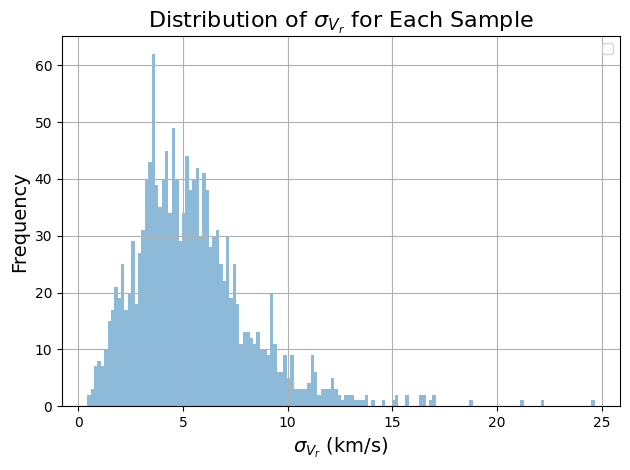

array([3.82346927, 3.760959  , 2.64792013, ..., 7.85693469, 5.66223584,
       6.30426907])

In [ ]:
# Plotting histograms for each sample
sigma_V_r_samples = np.array(sigma_V_r_samples)

# Calculate the mean for each index across all samples
sigma_V_r_mean = np.nanmean(sigma_V_r_samples, axis=0)
sigma_V_r_samples
#plt.figure(figsize=(12, 8))


   
plt.hist(sigma_V_r_mean, bins=150, alpha=0.5  )
plt.xlabel(r'$\sigma_{V_r}$ (km/s)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of $\sigma_{V_r}$ for Each Sample', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
#plt.xlim(0,5)
plt.show()
sigma_V_r_mean

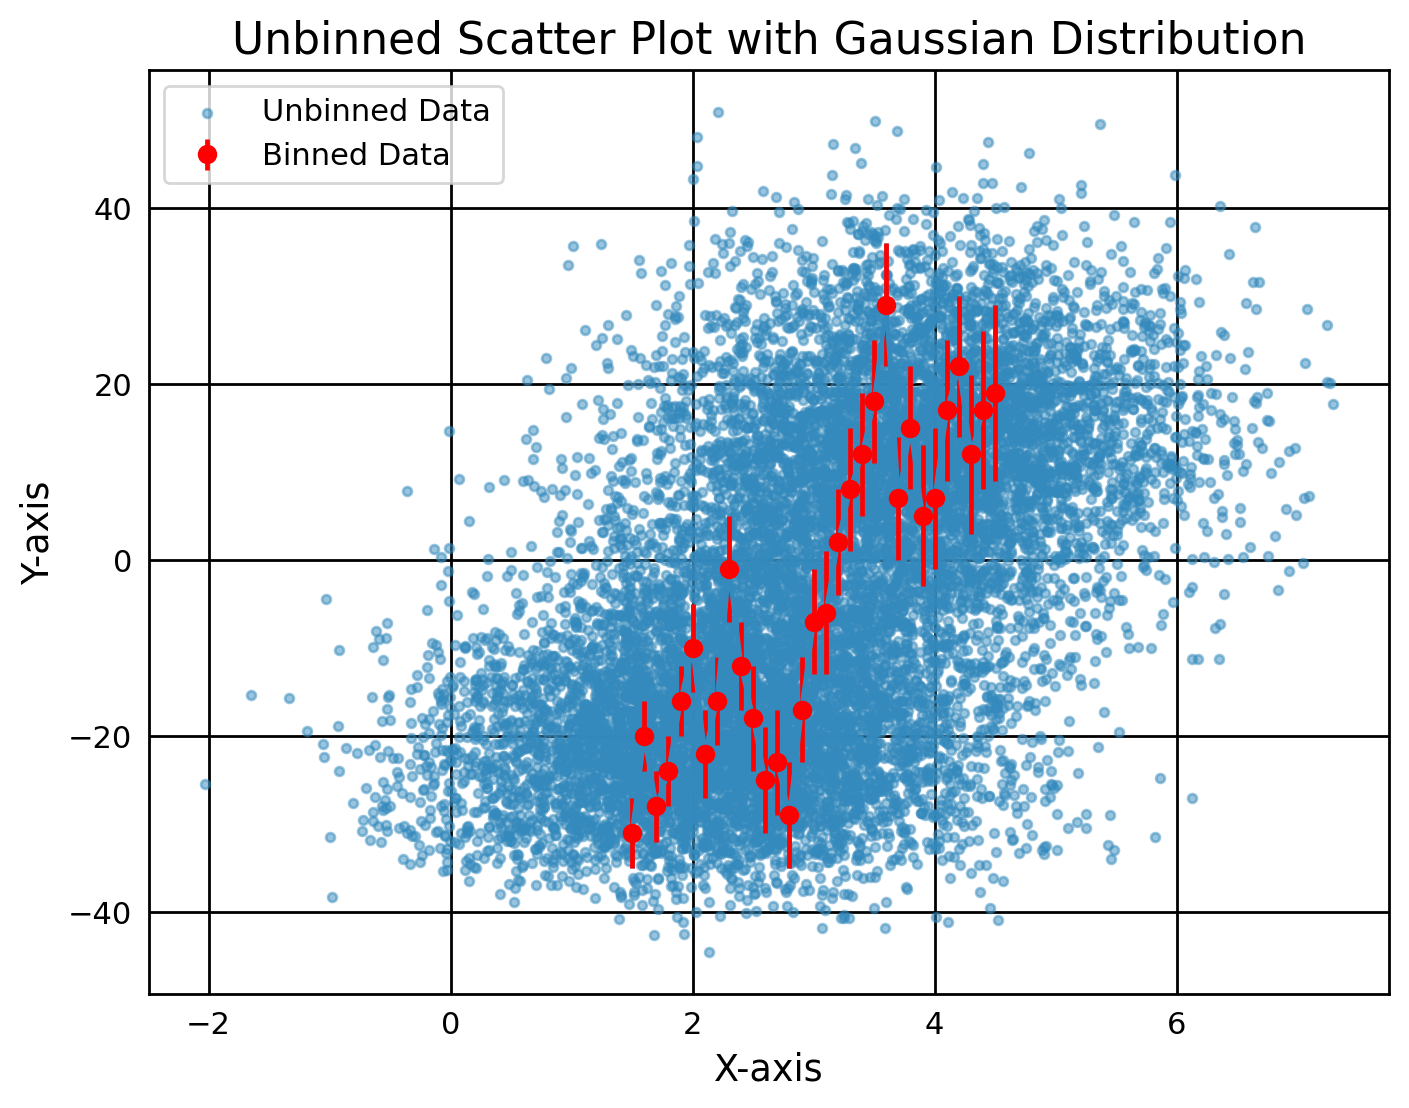

In [632]:
plt.errorbar(a,b,b1)
import matplotlib.pyplot as plt
import numpy as np

# Example binned data
x_binned = a
y_binned =b
y_err =b1

n_points = 412

# Generate unbinned data with Gaussian spread
x_unbinned = []
y_unbinned = []

for x, y, err in zip(x_binned, y_binned, y_err):
    x_unbinned.extend(np.random.normal(x, 1, n_points))  # small spread around x
    y_unbinned.extend(np.random.normal(y, err, n_points))

x_unbinned = np.array(x_unbinned)
y_unbinned = np.array(y_unbinned)

# Plot the unbinned data
plt.scatter(x_unbinned, y_unbinned, alpha=0.5, label='Unbinned Data', s=10)
plt.errorbar(x_binned, y_binned, yerr=y_err, fmt='o', color='red', label='Binned Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Unbinned Scatter Plot with Gaussian Distribution')
plt.legend()
plt.show()

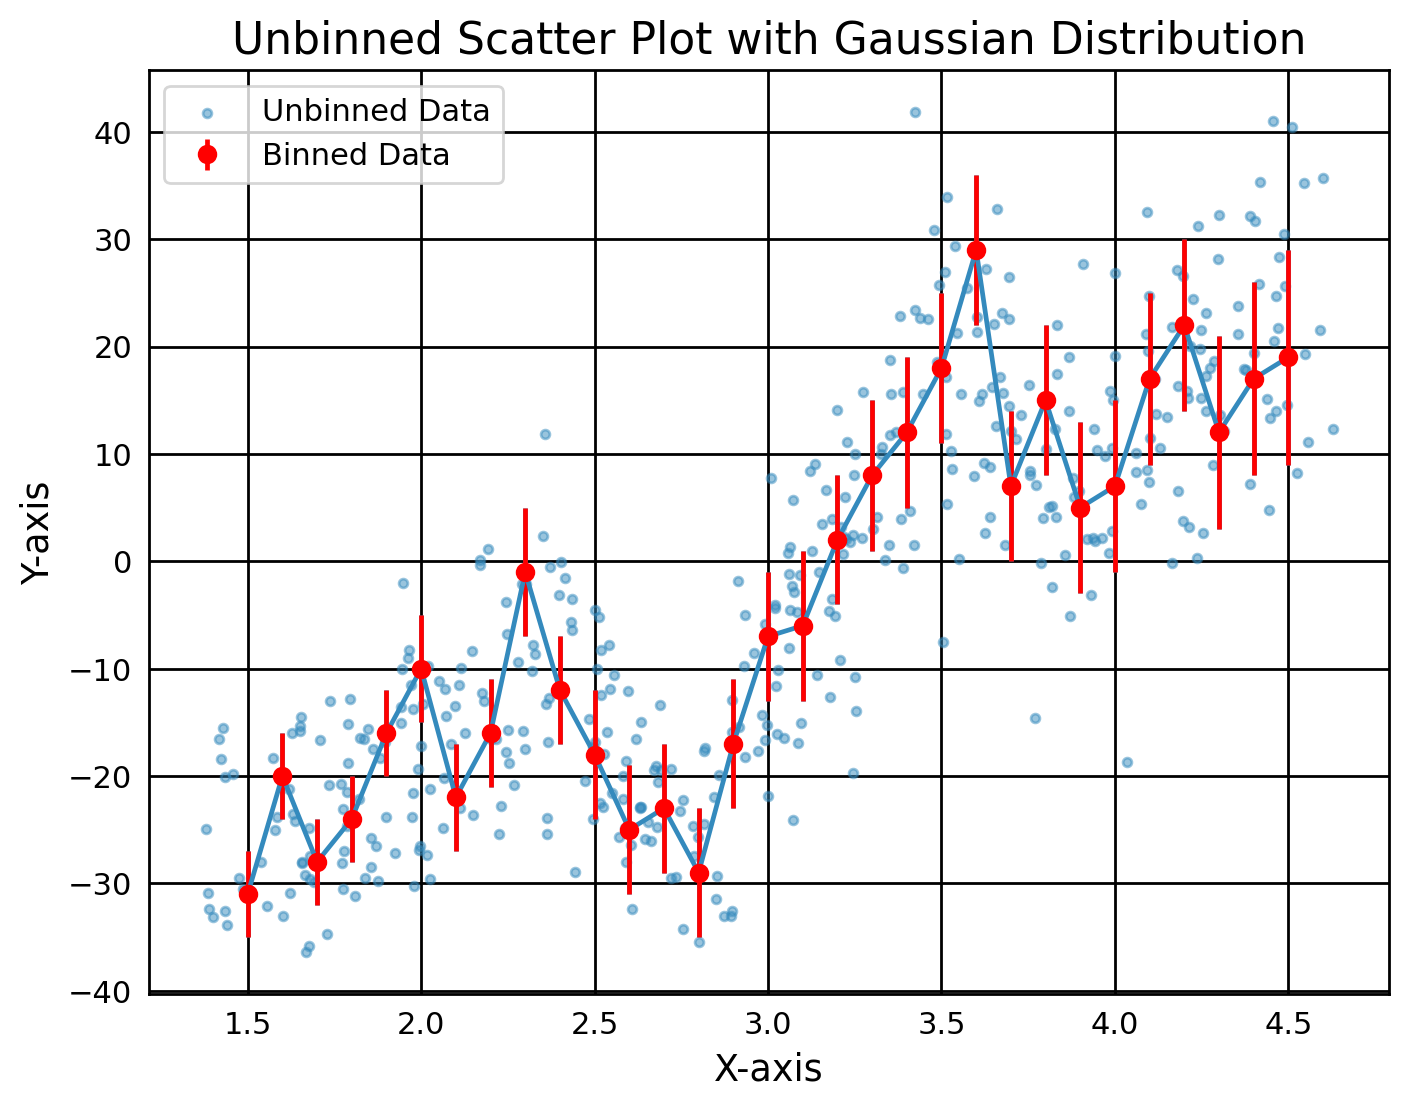

434

In [648]:
plt.errorbar(a,b,b1)
import matplotlib.pyplot as plt
import numpy as np

# Example binned data
x_binned = a
y_binned =b
y_err =b1

n_points = 14

# Generate unbinned data with Gaussian spread
x_unbinned = []
y_unbinned = []

for x, y, err in zip(x_binned, y_binned, y_err):
    x_unbinned.extend(np.random.normal(x, 0.1, n_points))  # small spread around x
    y_unbinned.extend(np.random.normal(y, err, n_points))

x_unbinned = np.array(x_unbinned)
y_unbinned = np.array(y_unbinned)

# Plot the unbinned data
plt.scatter(x_unbinned, y_unbinned, alpha=0.5, label='Unbinned Data', s=10)
plt.errorbar(x_binned, y_binned, yerr=y_err, fmt='o', color='red', label='Binned Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Unbinned Scatter Plot with Gaussian Distribution')
plt.legend()
plt.show()
len(x_unbinned)

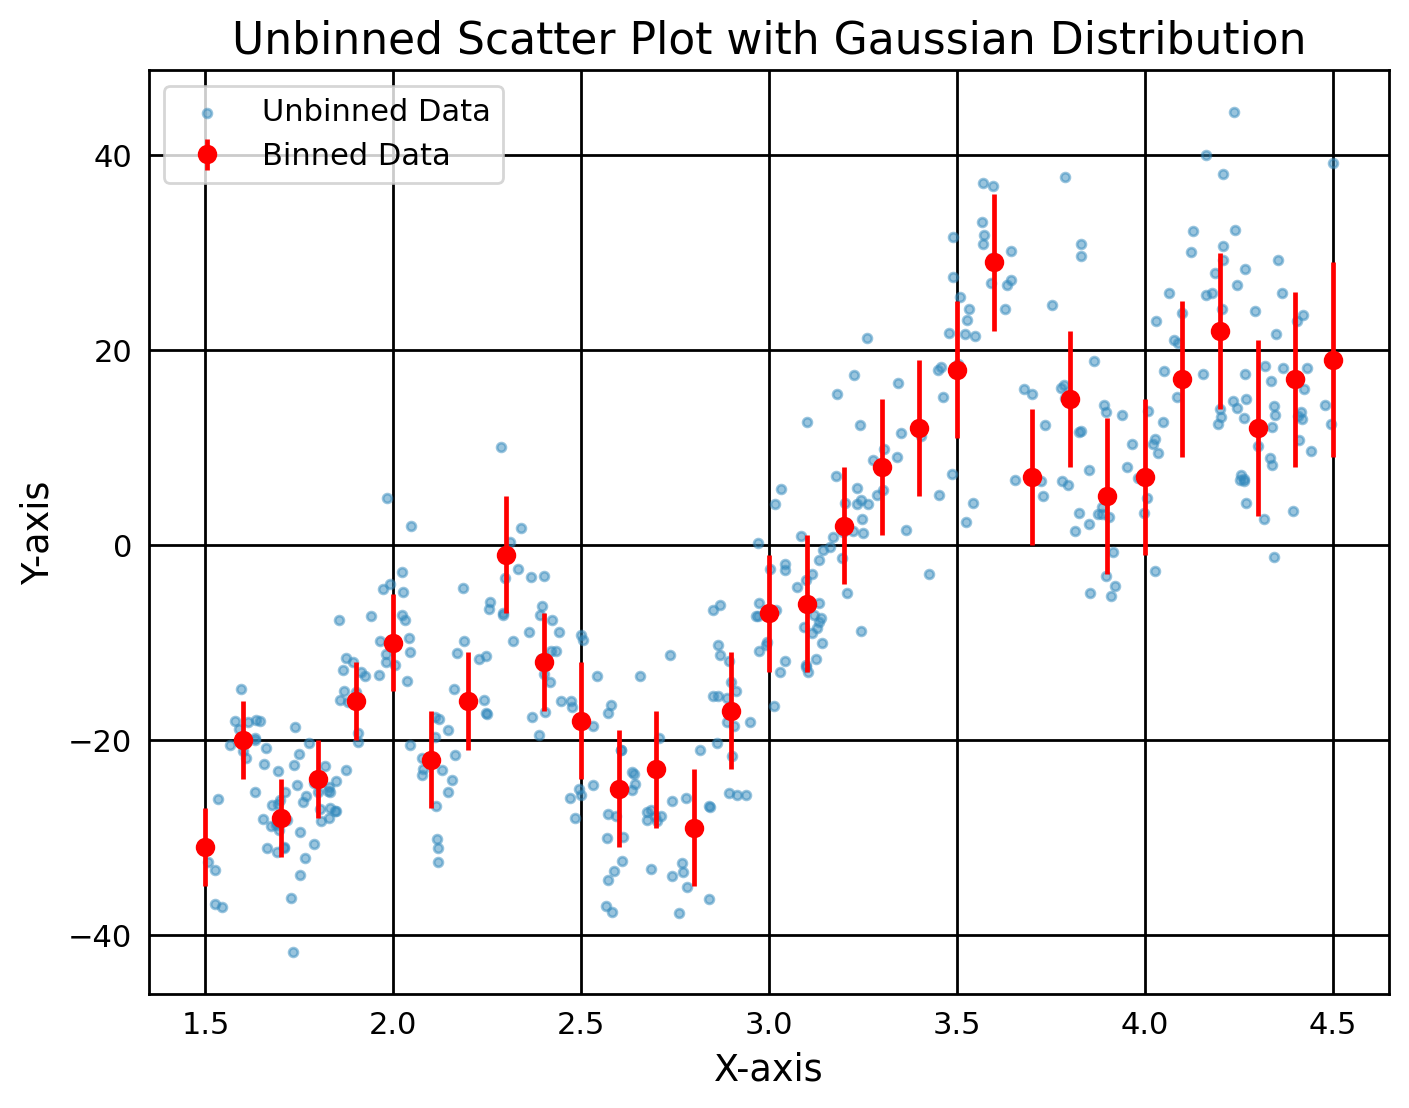

412

In [651]:
import matplotlib.pyplot as plt
import numpy as np

# Example binned data
x_binned =a
y_binned =b
y_err =b1

n_points = 412

# Generate unbinned data with Gaussian spread
x_unbinned = []
y_unbinned = []

# Spread the x values uniformly across the entire range
x_unbinned = np.random.uniform(min(x_binned), max(x_binned), n_points)

# Spread the y values according to Gaussian distribution around the binned points
for x in x_unbinned:
    closest_x_index = np.argmin(np.abs(x_binned - x))
    y_unbinned.append(np.random.normal(y_binned[closest_x_index], y_err[closest_x_index]))

y_unbinned = np.array(y_unbinned)

# Plot the unbinned data
plt.scatter(x_unbinned, y_unbinned, alpha=0.5, label='Unbinned Data', s=10)
plt.errorbar(x_binned, y_binned, yerr=y_err, fmt='o', color='red', label='Binned Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Unbinned Scatter Plot with Gaussian Distribution')
plt.legend()
plt.show()

len(x_unbinned)